# Project Five
# Game of Thrones - Season Comparisons

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
from gensim.models import Word2Vec
from nltk.tag import pos_tag
import re
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

Using Theano backend.


In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

## Importing Seasons

In [3]:
season_one = pd.read_pickle('/Users/zoemarkovits/Metis/project_five_got/PKLs/season_one.pkl')
season_one

0  \
Arya Stark                                                  arya   
Assassin                                                       0   
Benjen Stark                                            dead yet   
Bran Stark                                true saw white walkers   
Catelyn Stark                                     gods grow fast   
Cersei Baratheon                            never worry anything   
Daenerys Targaryen  weve guests year hes never asked us anything   
Doreah                                                         0   
Eddard Stark                                    one marksman ten   
Gared                                             head back wall   
Illyrio                                          greets dothraki   
Irri                                                           0   
Jaime Lannister                           brother feel duty warn   
Jhiqui                                                         0   
Joffrey Baratheon                                              0   
Jon Snow                                    dont think much bran   
Jon/Robb                                       quick bran faster   
Jorah Mormont                            small gift new khaleesi   
Jory Cassel                                                    0   
Khal Drogo                                                         
Maester Luwin                                   pardon lord lady   
Mycah                                                          0   
Myrcella Baratheon                                             0   
Robb Stark                                         relax bow arm   
Robert Baratheon                                             cat   
Rodrick Cassel                                       dont belong   
Ros                                        hear kings winterfell   
Royce                                dont think hell ask us died   
Sandor Clegane                                   rough night imp   
Sansa Stark                                                thank   
Septa Mordane              love detail youve managed get corners   
Soldier                                                        0   
Soldier 1                                                      0   
Soldier 2                                                      0   
Theon Greyjoy                                      mountain lion   
Tyrion Lannister                                             mmh   
Viserys Targaryen                                       daenerys   
Will                                                waymar royce   
Petyr Baelish                                                  0   
Rast                                                           0   
Yoren                                                          0   
Maester Aemon                                                  0   
Pyp                                                            0   
Old Nan                                                        0   
Jeor Mormont                                                   0   
Alliser Thorne                                                 0   
Varys                                                          0   
Rakharo                                                        0   
Barristan Selmy                                                0   
Lancel Lannister                                               0   
Grenn                                                          0   
Guard                                                          0   
Renly Baratheon                                                0   
Syrio Forel                                                    0   
Janos Slynt                                                    0   
Samwell Tarly                                                  0   
Tobho Mott                                                     0   
Gendry                                                         0   
Marillion                                          

In [4]:
season_five = pd.read_pickle('/Users/zoemarkovits/Metis/project_five_got/PKLs/season_five.pkl')
season_five

0  \
Aemon                                                            0   
Alliser                                         men need firm hand   
Announcer                                                        0   
Areo                                                             0   
Arya                                                             0   
Baelish                                        boys develop slowly   
Banker                                                           0   
Barristan                                                yes grace   
Brand                                                            0   
Brienne                                           even know squire   
Bronn                                                            0   
Brother                                                          0   
Brothers                                                         0   
Buyer                                                            0   
Cersei                                                               
Crowd                                                            0   
Daario                                           mother whore told   
Daenerys                                       theyve never killed   
Daughter                                                         0   
Davos                                   ive talking sworn brothers   
Derryk                                                           0   
Doran                                                            0   
Edd                                                              0   
Ellaria                                                          0   
Giant                                                            0   
Gilly                                            shouldnt training   
Girl                                                             0   
Grey Worm                                          white rat grace   
Guard                                                            0   
Head                                                             0   
Head Prostitute                                                  0   
High Septon                                                      0   
High Sparrow                                                     0   
Hizdahr                                            ask concessions   
Hunters                                                          0   
Jaime            theyre waiting night make sure hes really dead...   
Janos                                                            0   
Jaqen                                                            0   
John                                                             0   
Jon                             wasnt heavy wouldnt stop sword get   
Jorah                                                            0   
Karsi                                                            0   
Kevan                                                call sparrows   
Kevan                                    apologize sons appearance   
Kingsguard                                                       0   
Knight                                                           0   
Knight 1                                                         0   
Lancel                                          deepest sympathies   
Loboda                                                           0   
Lollys                                                           0   
Loras                                                         fine   
Mace                                                             0   
Mace Tyrell                                                      0   
Maggy                                                listen friend   
Malko                                                            0   
Man                                                              0   
Man 1                                                            0   
Man 2

In [5]:
season_six = pd.read_pickle('/Users/zoemarkovits/Metis/project_five_got/PKLs/season_six.pkl')
season_six

0  \
Aeron                                                             0   
Aeron                                                             0   
All                                                               0   
Alliser Thorne             know youre jon snow dead nights watchman   
Arthur                                                            0   
Arya                                                              0   
Balon                                                             0   
Belicho                                                           0   
Benjen                                                            0   
Beric                                                             0   
Bianca                                                            0   
Black Walder                                                      0   
Bloodrider #2                   fucking grandma bloodrider daenerys   
Bobono                                                            0   
Bran                                                              0   
Brienne                                                           0   
Bronn                                                             0   
Brynden                                                           0   
Camello                                                           0   
Captain                                                           0   
Cersei                          think locking myrcella crypt cersei   
Clarenzo                                                          0   
Crowd                                                             0   
Daario                                                            0   
Daenerys          lie bear children anyone else sun rises west s...   
Davos                                           help get inside cut   
Dickon                                                            0   
Dim Dalba                                                         0   
Dolorous Edd                                                  trust   
Doran             always envied oberyn lived truly lived sailed ...   
Dothraki #1                                                       0   
Edmure                                                            0   
Ellaria                                                           0   
Euron                                                             0   
Gatins                                                            0   
Gilly                                                             0   
Girl                                                              0   
Glover                                                            0   
Grey Worm                                                         0   
Guard                                                             0   
Guard Captain                                                     0   
Handmaiden                                                        0   
High Sparrow      isnt ser loras brings husband misses dearly lo...   
Hodor                                                             0   
Hooded Figure                                                     0   
Izembaro                                                          0   
Jaime                                                 mother cersei   
Jaqen                                                             0   
Jon Snow                                                          0   
Jorah                                                    ram daario   
Karstark                                                          0   
Kevan                                                             0   
Khal #1                                                           0   
Khal #2                                                           0   
Khal #3                                                           0   
Khal #4                                                           0   
Khal Moro          

In [6]:
season_seven = pd.read_pickle('/Users/zoemarkovits/Metis/project_five_got/PKLs/season_seven.pkl')
season_seven

0  \
All                                                stand together   
Arya                     people ask happened tell north remembers   
Baelish                        ive heard beat hound single combat   
Benjen                                                          0   
Beric                           seems like good place spend night   
Bran                                               fist first men   
Brienne                                                      nope   
Bronn                                                           0   
Captain                                                         0   
Cersei                                   weve waiting whole lives   
Daenerys                                              shall begin   
Davos                                                           0   
Dickon                                                          0   
Edd                                               know thats true   
Ellaria                                                         0   
Ellaria                                                         0   
Euron           nothing compares treason suffered hands family...   
Gendry                                                          0   
Gilly                                            really sleep sam   
Grey Worm                                                       0   
Guard                                                           0   
Guard 1                                                         0   
Guard 2                                                         0   
Hot Pie                                                         0   
Jaime                                                               
Jon             want every northern maester scour records ment...   
Jorah                                                dragon queen   
Lyanna Mormont                  dont plan knitting fire men fight   
Maester 1                                                       0   
Maester 2                                                       0   
Man                                                       new one   
Man #1                                                          0   
Man #2                                                     hungry   
Man #3                                    youre stealing offering   
Man 1                                                           0   
Man 2                                                           0   
Marwyn                                                      weigh   
Meera                         im meera reed daughter howland reed   
Melisandre                                                      0   
Messenger                                                       0   
Missandei                                                       0   
Nymeria                                                         0   
Obara                                                           0   
Olenna                                                          0   
Podrick                                                         0   
Qyburn                                                          0   
Randyll                                                         0   
Robett Glover                       time taught boys summer fight   
Sam                                  archmaester wondering marwyn   
Samwell                                                         0   
Sandor                       youve got real powerful magic figure   
Sansa                                    castles committed crimes   
Theon                                                           0   
Thoros                       youre grouchy old bear arent clegane   
Tormund                                              thats ill go   
Tycho                                                           0   
Tyene                                                           0   
Tyrion                                                        

## Sentiment Analysis Function

In [7]:
def sentiment_analysis(x):
    blob = TextBlob(x).sentiment
    return blob   

In [8]:
season_one.columns = range(len(season_one.columns))

In [9]:
season_one_sentiment = pd.DataFrame()

In [10]:
for i in range(len(season_one.columns)):
    season_one_sentiment['sentiment' + str(i) ] = season_one[i].apply(sentiment_analysis)
    
season_one_sentiment.head()    

sentiment0  sentiment1  sentiment2  sentiment3  sentiment4  \
Arya Stark         (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Assassin           (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Benjen Stark      (-0.2, 0.4)  (0.0, 0.5)  (0.8, 0.9)  (0.0, 0.0)  (0.0, 0.0)   
Bran Stark     (0.175, 0.325)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Catelyn Stark      (0.2, 0.6)  (0.5, 0.5)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

                                     sentiment5  sentiment6  sentiment7  \
Arya Stark                           (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Assassin                             (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Benjen Stark                         (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Bran Stark     (0.285714285714, 0.535714285714)  (0.0, 0.0)  (0.0, 0.0)   
Catelyn Stark                        (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

               sentiment8    sentiment9 sentiment10 sentiment11  \
Arya Stark     (0.0, 0.0)    (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Assassin       (0.0, 0.0)    (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Benjen Stark   (0.0, 0.0)  (-0.2, 0.05)  (0.0, 0.0)  (0.0, 0.0)   
Bran Stark     (0.0, 0.0)    (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Catelyn Stark  (0.0, 0.0)    (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

                           sentiment12 sentiment13 sentiment14  sentiment15  \
Arya Stark                  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   (0.0, 0.0)   
Assassin                    (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   (0.0, 0.0)   
Benjen Stark                (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   (0.0, 0.0)   
Bran Stark                  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   (0.0, 0.0)   
Catelyn Stark  (-0.25, 0.944444444444)  (0.0, 0.0)  (0.0, 0.0)  (-0.5, 1.0)   

              sentiment16 sentiment17 sentiment18  \
Arya Stark     (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Assassin       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Benjen Stark   (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Bran Stark     (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Catelyn Stark  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

                                     sentiment19             sentiment20  \
Arya Stark                            (0.0, 0.0)              (0.0, 0.0)   
Assassin                              (0.0, 0.0)              (0.0, 0.0)   
Benjen Stark                          (0.0, 0.0)              (0.0, 0.0)   
Bran Stark                            (0.0, 0.0)              (0.0, 0.0)   
Catelyn Stark  (-0.107142857143, 0.717857142857)  (0.0, 0.0666666666667)   

                                     sentiment21 sentiment22 sentiment23  \
Arya Stark                            (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Assassin                              (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Benjen Stark                          (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Bran Stark                            (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Catelyn Stark  (-0.133333333333, 0.133333333333)  (0.0, 0.0)  (0.0, 0.0)   

              sentiment24 sentiment25 sentiment26 sentiment27 sentiment28  \
Arya Stark     (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Assassin       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Benjen Stark   (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Bran Stark     (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Catelyn Stark  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

              sentiment29 sentiment30 sentiment31 sentiment32 sentiment33  \
Arya Stark     (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Assassin       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Benjen Stark   (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Bran Stark     (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Catelyn Stark  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

              sentiment34 sentiment35 sentim

In [11]:
season_five.columns = range(len(season_five.columns))

In [12]:
season_five_sentiment = pd.DataFrame()

In [13]:
for i in range(len(season_five.columns)):
    season_five_sentiment['sentiment' + str(i) ] = season_five[i].apply(sentiment_analysis)
    
season_five_sentiment.head()    

sentiment0  sentiment1  sentiment2  sentiment3  sentiment4  \
Aemon       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Alliser    (-0.2, 0.4)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Announcer   (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Areo        (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arya        (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

           sentiment5  sentiment6  sentiment7  sentiment8  sentiment9  \
Aemon      (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Alliser    (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Announcer  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Areo       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arya       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

          sentiment10 sentiment11 sentiment12 sentiment13 sentiment14  \
Aemon      (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Alliser    (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Announcer  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Areo       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arya       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

          sentiment15 sentiment16 sentiment17 sentiment18 sentiment19  \
Aemon      (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Alliser    (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Announcer  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Areo       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arya       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

          sentiment20 sentiment21 sentiment22 sentiment23 sentiment24  \
Aemon      (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Alliser    (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Announcer  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Areo       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arya       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

          sentiment25 sentiment26 sentiment27 sentiment28 sentiment29  \
Aemon      (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Alliser    (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Announcer  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Areo       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arya       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

          sentiment30 sentiment31 sentiment32 sentiment33 sentiment34  \
Aemon      (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Alliser    (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Announcer  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Areo       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arya       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

          sentiment35 sentiment36 sentiment37 sentiment38 sentiment39  \
Aemon      (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Alliser    (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Announcer  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Areo       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arya       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

          sentiment40 sentiment41 sentiment42 sentiment43 sentiment44  \
Aemon      (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Alliser    (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Announcer  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Areo       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arya       (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

          sentiment45 sentiment46 sentiment47 sentiment

In [14]:
season_six.columns = range(len(season_six.columns))

In [15]:
season_six_sentiment = pd.DataFrame()

In [16]:
for i in range(len(season_six.columns)):
    season_six_sentiment['sentiment' + str(i) ] = season_six[i].apply(sentiment_analysis)
    
season_six_sentiment.head()    

sentiment0  sentiment1                        sentiment2  \
Aeron            (0.0, 0.0)  (0.0, 0.0)                        (0.0, 0.0)   
Aeron            (0.0, 0.0)  (0.0, 0.0)                        (0.0, 0.0)   
All              (0.0, 0.0)  (0.0, 0.0)                        (0.0, 0.0)   
Alliser Thorne  (-0.2, 0.4)  (0.0, 0.0)  (0.285714285714, 0.535714285714)   
Arthur           (0.0, 0.0)  (0.0, 0.0)                        (0.0, 0.0)   

                                        sentiment3  sentiment4  sentiment5  \
Aeron                                   (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Aeron                                   (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
All                                     (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Alliser Thorne  (-0.0880952380952, 0.561904761905)  (0.0, 0.0)  (0.0, 0.0)   
Arthur                                  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

                sentiment6  sentiment7  sentiment8  sentiment9 sentiment10  \
Aeron           (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Aeron           (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
All             (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Alliser Thorne  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arthur          (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

               sentiment11 sentiment12 sentiment13 sentiment14 sentiment15  \
Aeron           (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Aeron           (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
All             (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Alliser Thorne  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arthur          (0.7, 0.6)  (0.5, 0.5)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

               sentiment16 sentiment17 sentiment18 sentiment19 sentiment20  \
Aeron           (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Aeron           (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
All             (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Alliser Thorne  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arthur          (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

               sentiment21 sentiment22 sentiment23 sentiment24 sentiment25  \
Aeron           (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Aeron           (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
All             (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Alliser Thorne  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arthur          (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

               sentiment26  sentiment27 sentiment28   sentiment29  \
Aeron           (0.0, 0.0)   (0.0, 0.0)  (0.0, 0.0)    (0.0, 0.0)   
Aeron           (0.0, 0.0)  (-0.1, 0.1)  (0.0, 0.0)  (-0.15, 0.2)   
All             (0.0, 0.0)   (0.0, 0.0)  (0.0, 0.0)    (0.0, 0.0)   
Alliser Thorne  (0.0, 0.0)   (0.0, 0.0)  (0.0, 0.0)    (0.0, 0.0)   
Arthur          (0.0, 0.0)   (0.0, 0.0)  (0.0, 0.0)    (0.0, 0.0)   

                sentiment30 sentiment31 sentiment32 sentiment33  sentiment34  \
Aeron            (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   (0.0, 0.0)   
Aeron           (-0.2, 0.4)  (1.0, 0.3)  (0.0, 0.0)  (0.0, 0.0)   (0.0, 0.0)   
All              (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (-0.2, 0.4)   
Alliser Thorne   (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   (0.0, 0.0)   
Arthur           (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   (0.0, 0.0)   

               sentiment35 sentiment36 sentiment37 sentiment38 sentiment39  \
Aeron           (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Aeron           (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
All             (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
A

In [17]:
season_seven.head()

0                  1  \
All                                stand together                aye   
Arya     people ask happened tell north remembers  thats pretty song   
Baelish        ive heard beat hound single combat         want happy   
Benjen                                          0                  0   
Beric           seems like good place spend night     seems deserted   

                            2                       3              4  \
All                         0                       0              0   
Arya     dont want steal food           kings landing            bad   
Baelish                 happy                    lady           lady   
Benjen                      0                       0              0   
Beric             think ended  girl died fathers arms  doesnt matter   

                  5              6                    7               8  \
All               0              0                    0               0   
Arya     riverlands     oh couldnt  youre long way home        boy girl   
Baelish           0              0                    0               0   
Benjen            0              0                    0               0   
Beric           aye  thank clegane          youre right  think dont ask   

                 9               10                   11               12 13  \
All              0                0                    0                0  0   
Arya                    really good  im going kill queen                0  0   
Baelish          0                0                    0                0  0   
Benjen           0                0                    0                0  0   
Beric    dont know  dont know wants                  aye  believe clegane  0   

        14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29          0_two  \
All      0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0              0   
Arya     0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  hello hot pie   
Baelish  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0     sorry died   
Benjen   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0              0   
Beric    0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0              0   

           1_two       2_two     3_two  4_two    5_two          6_two  \
All            0           0         0      0        0              0   
Arya         mmm       didnt  big lady  found  got ale  kings landing   
Baelish  forgive  even thank         0      0        0              0   
Benjen         0           0         0      0        0              0   
Beric          0           0         0      0        0              0   

                       7_two 8_two         9_two    10_two 11_two  \
All                        0     0             0         0      0   
Arya     heard cerseis queen   hmm  cersei would  would go          
Baelish                    0     0             0         0      0   
Benjen                     0     0             0         0      0   
Beric                      0     0             0         0      0   

              12_two      13_two  14_two             15_two        16_two  \
All                0           0       0                  0             0   
Arya     youre lying  thanks pie  thanks  take care hot pie  nymeria arya   
Baelish            0           0       0                  0             0   
Benjen             0           0       0                  0             0   
Beric              0           0       0                  0             0   

        17_two 18_two 19_two 20_two 21_two 22_two 23_two 24_two 25_two 26_two  \
All          0      0      0      0      0      0      0      0      0      0   
Arya      come  thats      0      0      0      0      0      0      0      0   
Baelish      0      0      0      0      0      0      0      0      0      0   
Benjen       0      0      0      0      0      0      0      0      0      0   
Beric        0      0      0      0      0      0      0      0      0      0   

 

In [18]:
season_seven.columns = range(len(season_seven.columns))

In [19]:
season_seven_sentiment = pd.DataFrame()

In [20]:
for i in range(len(season_seven.columns)):
    season_seven_sentiment['sentiment' + str(i) ] = season_seven[i].apply(sentiment_analysis)
    
season_seven_sentiment.head()    

sentiment0   sentiment1  sentiment2  \
All                              (0.0, 0.0)   (0.0, 0.0)  (0.0, 0.0)   
Arya                             (0.0, 0.0)  (0.25, 1.0)  (0.0, 0.0)   
Baelish  (-0.0714285714286, 0.214285714286)   (0.8, 1.0)  (0.8, 1.0)   
Benjen                           (0.0, 0.0)   (0.0, 0.0)  (0.0, 0.0)   
Beric                            (0.7, 0.6)   (0.0, 0.0)  (0.0, 0.0)   

         sentiment3              sentiment4  sentiment5  sentiment6  \
All      (0.0, 0.0)              (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arya     (0.0, 0.0)  (-0.7, 0.666666666667)  (0.0, 0.0)  (0.0, 0.0)   
Baelish  (0.0, 0.0)              (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Benjen   (0.0, 0.0)              (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Beric    (0.0, 0.0)              (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

                               sentiment7  sentiment8  sentiment9 sentiment10  \
All                            (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arya                         (-0.05, 0.4)  (0.0, 0.0)  (0.0, 0.0)  (0.7, 0.6)   
Baelish                        (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Benjen                         (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Beric    (0.285714285714, 0.535714285714)  (0.0, 0.0)  (0.0, 0.0)  (0.2, 0.1)   

        sentiment11 sentiment12 sentiment13 sentiment14 sentiment15  \
All      (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arya     (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Baelish  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Benjen   (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Beric    (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

        sentiment16 sentiment17 sentiment18 sentiment19 sentiment20  \
All      (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arya     (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Baelish  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Benjen   (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Beric    (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

        sentiment21 sentiment22 sentiment23 sentiment24 sentiment25  \
All      (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arya     (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Baelish  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Benjen   (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Beric    (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

        sentiment26 sentiment27 sentiment28 sentiment29   sentiment30  \
All      (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)    (0.0, 0.0)   
Arya     (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.25, 0.85)   
Baelish  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   (-0.5, 1.0)   
Benjen   (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)    (0.0, 0.0)   
Beric    (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)    (0.0, 0.0)   

        sentiment31 sentiment32 sentiment33 sentiment34 sentiment35  \
All      (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arya     (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.1)  (0.0, 0.0)  (0.0, 0.0)   
Baelish  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Benjen   (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Beric    (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

        sentiment36 sentiment37 sentiment38 sentiment39 sentiment40  \
All      (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Arya     (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Baelish  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Benjen   (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   
Beric    (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)  (0.0, 0.0)   

        sentiment41 sentiment42 sentiment43 sentiment44   sentiment45  \
All      (0.0, 0.0)  (0.0, 0.0)  (0.0, 

In [21]:
# Pulling out Polarity for each Character within Dataframe
def polarity(Sentiment):
    character_polarity = []
    for item in Sentiment:
        character_polarity.append(item[0])
    return character_polarity    

In [22]:
# Plotting Sentiment Analysis by Character
def sentiment_runavg(data, runavg=10, color_pos='yellow', color_neg='red'):
    y = np.array(data)    
    
    y_runavg = np.convolve(y, np.ones((runavg,))/runavg, mode='valid')
    x = np.array(range(0, len(y_runavg)))
    
    figure, ax = plt.subplots(figsize=(25, 7))
    plt.plot(x, y_runavg);
    d = np.zeros(len(y_runavg))
    ax.fill_between(x, y_runavg, where=y_runavg >= d, interpolate=True, color=color_pos)
    ax.fill_between(x, y_runavg, where=y_runavg <= d, interpolate=True, color=color_neg)
    plt.xlim(0, x.max())
    

### Arya

In [23]:
AryaS1 = season_one_sentiment.loc['Arya Stark']

Arya_Sentiment_S1 = AryaS1.values.tolist()

In [24]:
AryaS5 = season_five_sentiment.loc['Arya']

Arya_Sentiment_S5 = AryaS5.values.tolist()

In [25]:
AryaS6 = season_six_sentiment.loc['Arya']

Arya_Sentiment_S6 = AryaS6.values.tolist()

In [26]:
AryaS7 = season_seven_sentiment.loc['Arya']

Arya_Sentiment_S7 = AryaS7.values.tolist()

In [27]:
Arya_Polarity_S1 = polarity(Arya_Sentiment_S1)
Arya_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.35,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.8,
 0.0,
 0.0,
 0.0,
 -0.8,
 0.0,
 0.0,
 -0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.13636363636363635,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [28]:
Arya_Polarity_S5 = polarity(Arya_Sentiment_S5)

In [29]:
Arya_Polarity_S6= polarity(Arya_Sentiment_S6)

In [30]:
Arya_Polarity_S7 = polarity(Arya_Sentiment_S7)

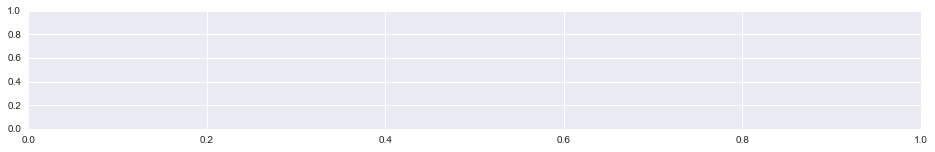

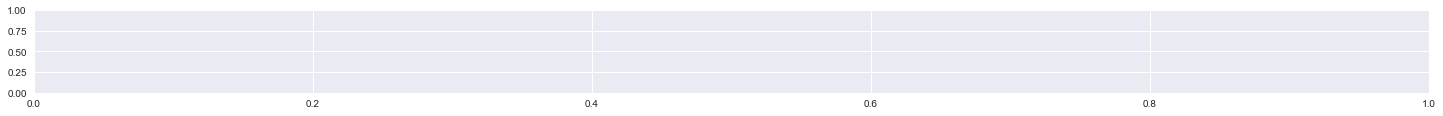

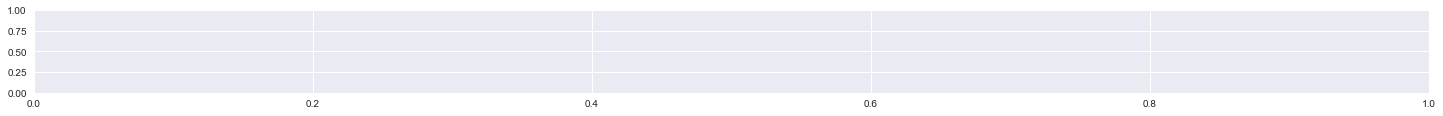

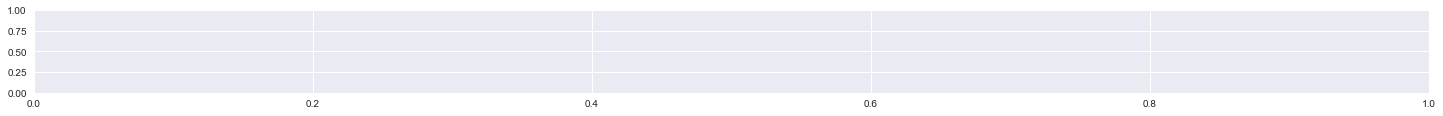

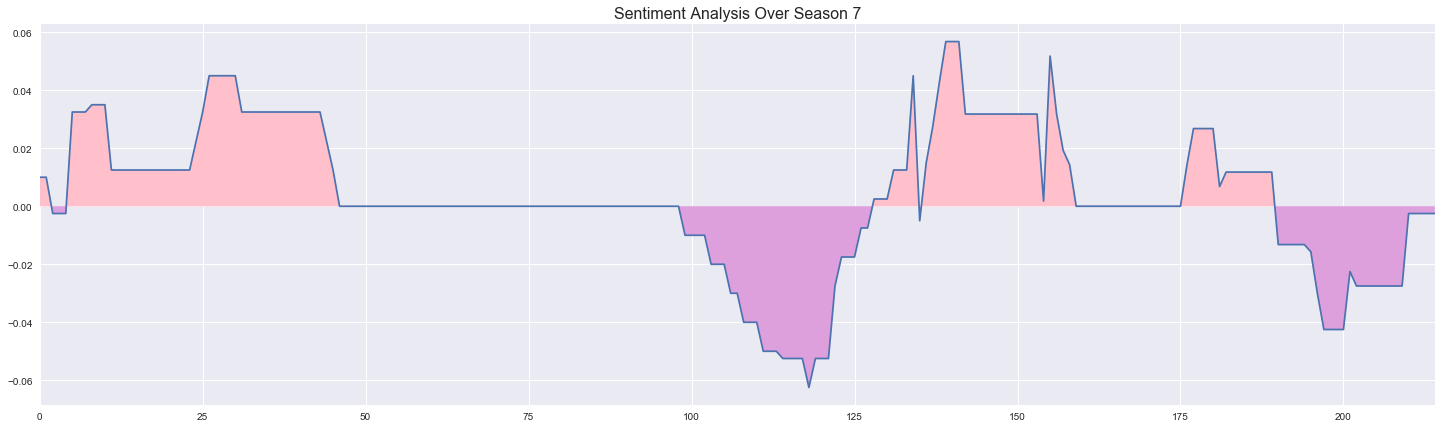

In [31]:
plt.subplots(figsize=(16,10))

plt.subplot (411)
sentiment_runavg(Arya_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')
plt.title('Sentiment Analysis Over Season 1', fontsize=16)

plt.subplot (412)
sentiment_runavg(Arya_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')
plt.title('Sentiment Analysis Over Season 5', fontsize=16)

plt.subplot (413)
sentiment_runavg(Arya_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')
plt.title('Sentiment Analysis Over Season 6', fontsize=16)

plt.subplot (414)
sentiment_runavg(Arya_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')
plt.title('Sentiment Analysis Over Season 7', fontsize=16)

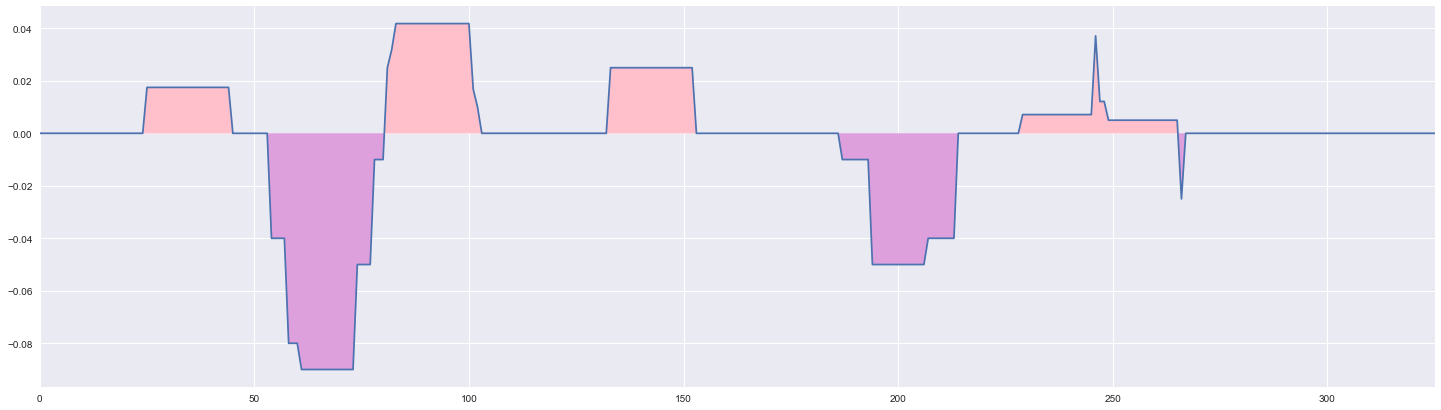

In [32]:
sentiment_runavg(Arya_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')

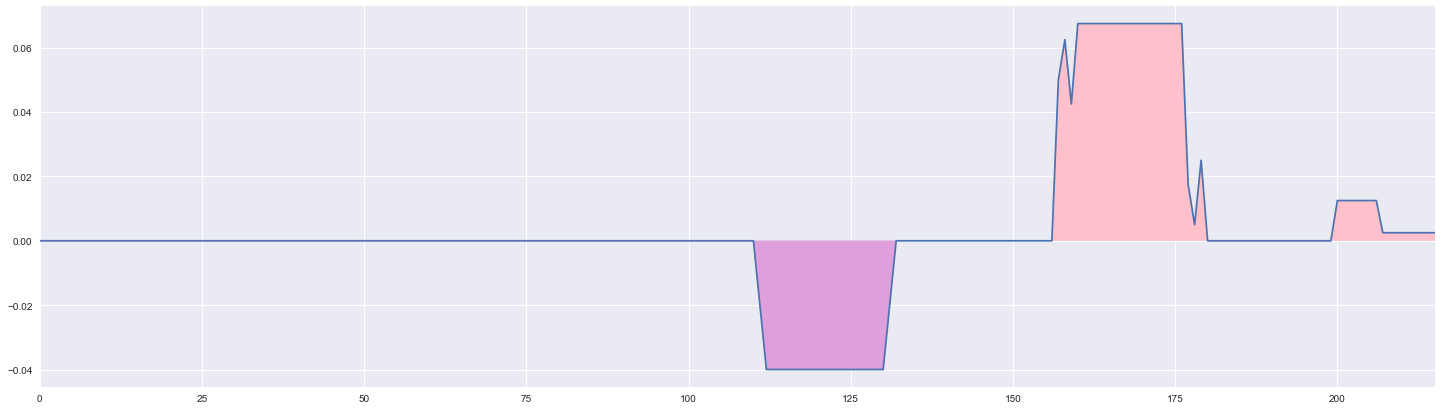

In [33]:
sentiment_runavg(Arya_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')

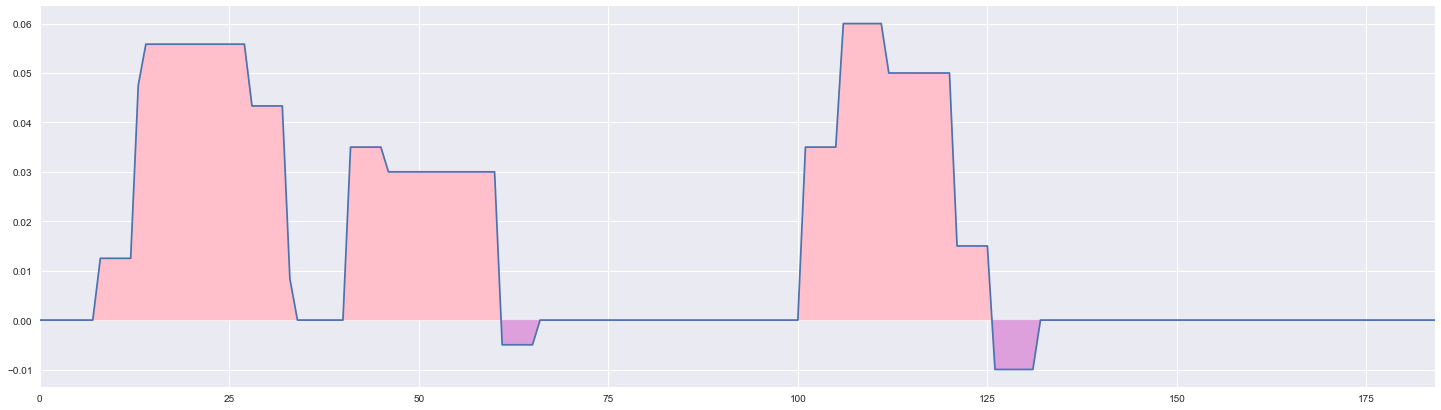

In [34]:
sentiment_runavg(Arya_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')

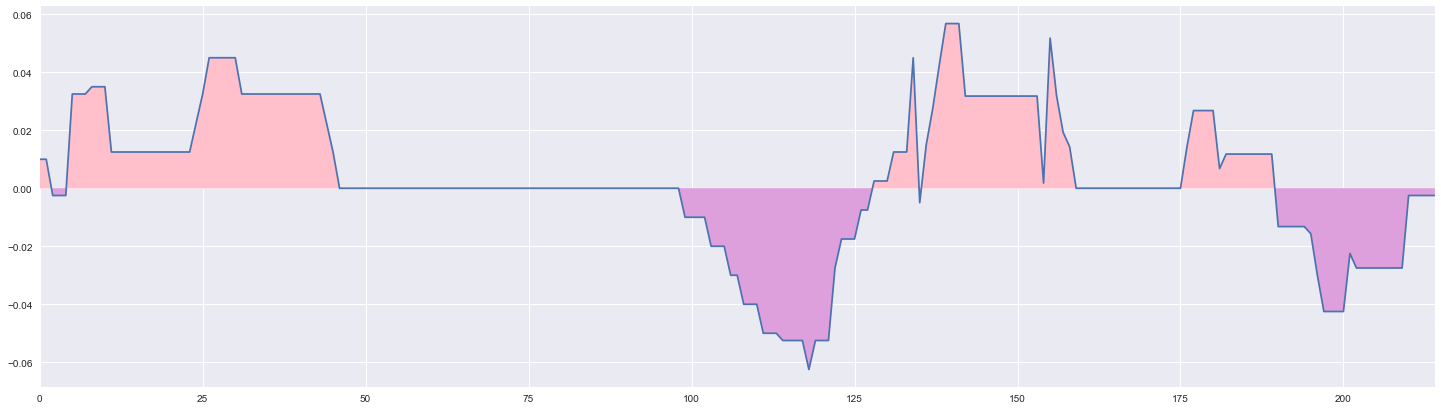

In [35]:
sentiment_runavg(Arya_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')

### Baelish

In [36]:
BaelishS1 = season_one_sentiment.loc['Petyr Baelish']

Baelish_Sentiment_S1 = BaelishS1.values.tolist()

In [37]:
BaelishS5 = season_five_sentiment.loc['Baelish']

Baelish_Sentiment_S5 = BaelishS5.values.tolist()

In [38]:
BaelishS6 = season_six_sentiment.loc['Littlefinger']

Baelish_Sentiment_S6= BaelishS6.values.tolist()

In [39]:
BaelishS7 = season_seven_sentiment.loc['Baelish']

Baelish_Sentiment_S7 = BaelishS7.values.tolist()

In [40]:
Baelish_Polarity_S1 = polarity(Baelish_Sentiment_S1)
Baelish_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.25,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.35,
 0.0,
 0.0,
 -0.6999999999999998,
 0.0,
 0.0,
 0.0,
 0.2857142857142857,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.09999999999999998,
 0.0,
 0.4,
 0.35,
 0.0,
 0.0,
 0.0,
 0.0,

In [41]:
Baelish_Polarity_S5 = polarity(Baelish_Sentiment_S5)

In [42]:
Baelish_Polarity_S6= polarity(Baelish_Sentiment_S6)

In [43]:
Baelish_Polarity_S7 = polarity(Baelish_Sentiment_S7)

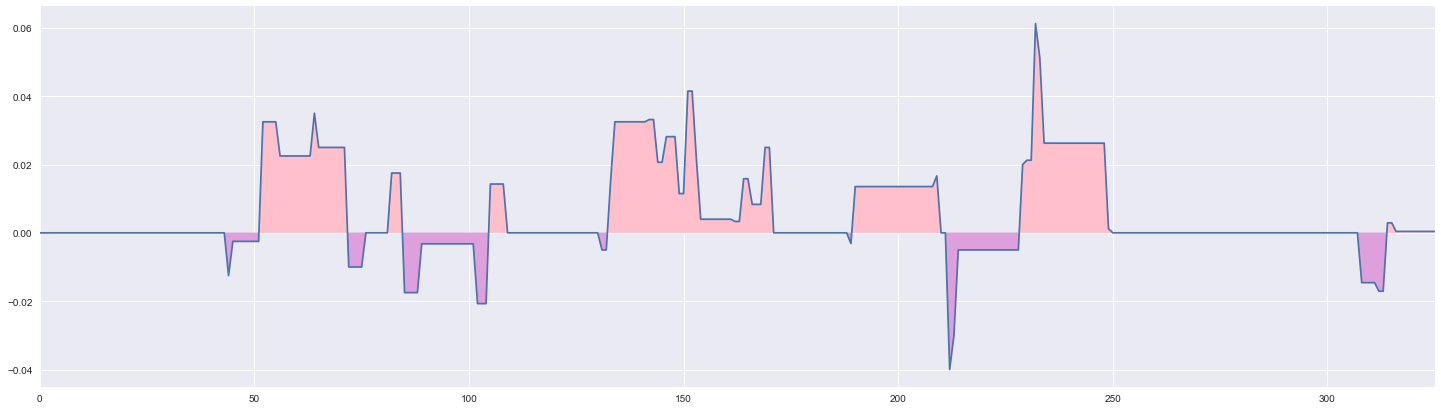

In [44]:
sentiment_runavg(Baelish_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')

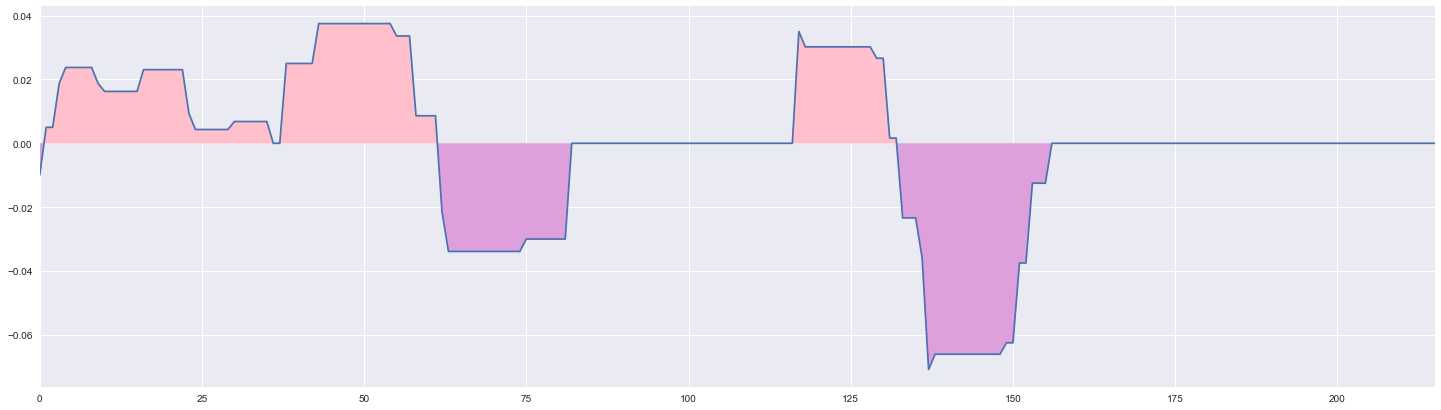

In [45]:
sentiment_runavg(Baelish_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')

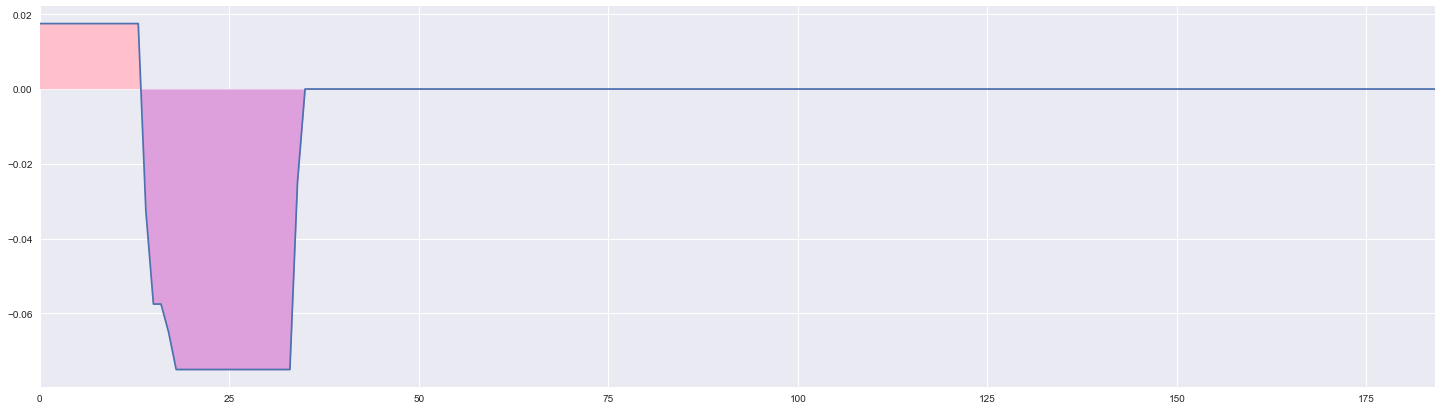

In [46]:
sentiment_runavg(Baelish_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')

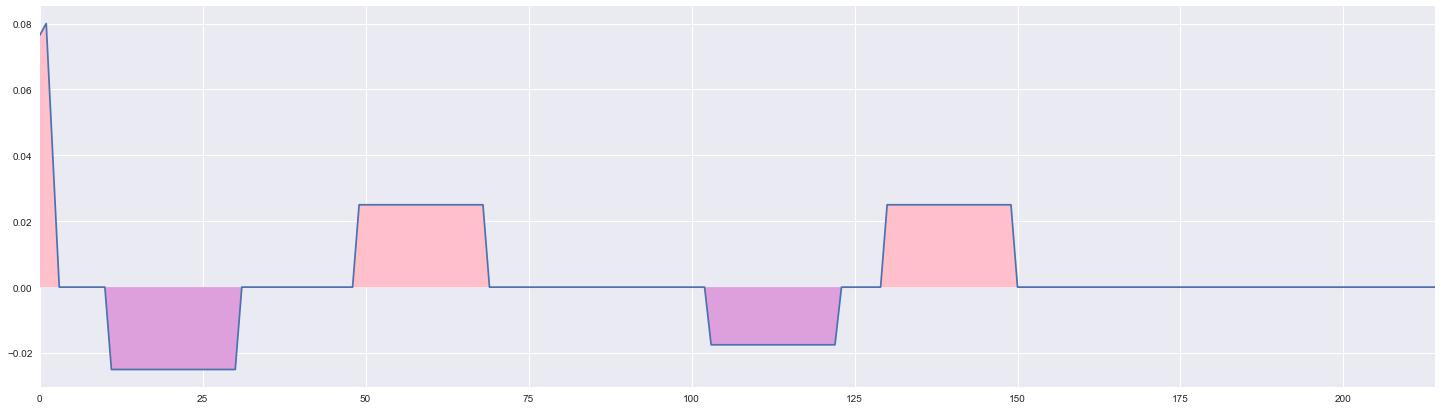

In [47]:
sentiment_runavg(Baelish_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')

### Brienne

In [48]:
BrienneS5 = season_five_sentiment.loc['Brienne']

Brienne_Sentiment_S5 = BrienneS5.values.tolist()

In [49]:
BrienneS6 = season_six_sentiment.loc['Brienne']

Brienne_Sentiment_S6= BrienneS6.values.tolist()

In [50]:
BrienneS7 = season_seven_sentiment.loc['Brienne']

Brienne_Sentiment_S7 = BrienneS7.values.tolist()

In [51]:
Brienne_Polarity_S5 = polarity(Brienne_Sentiment_S5)
Brienne_Polarity_S5

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [52]:
Brienne_Polarity_S6= polarity(Brienne_Sentiment_S6)

In [53]:
Brienne_Polarity_S7 = polarity(Brienne_Sentiment_S7)

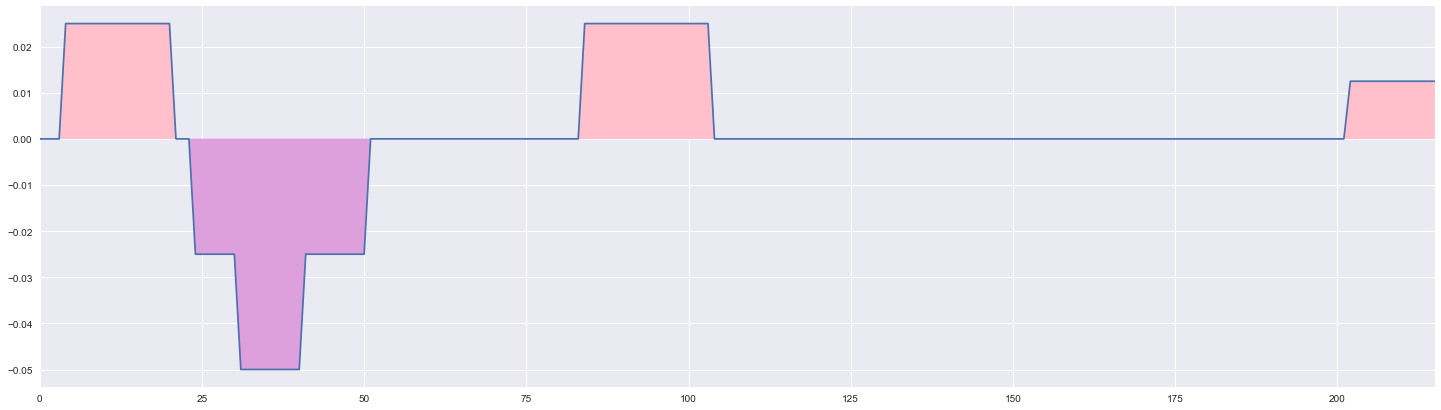

In [54]:
sentiment_runavg(Brienne_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')

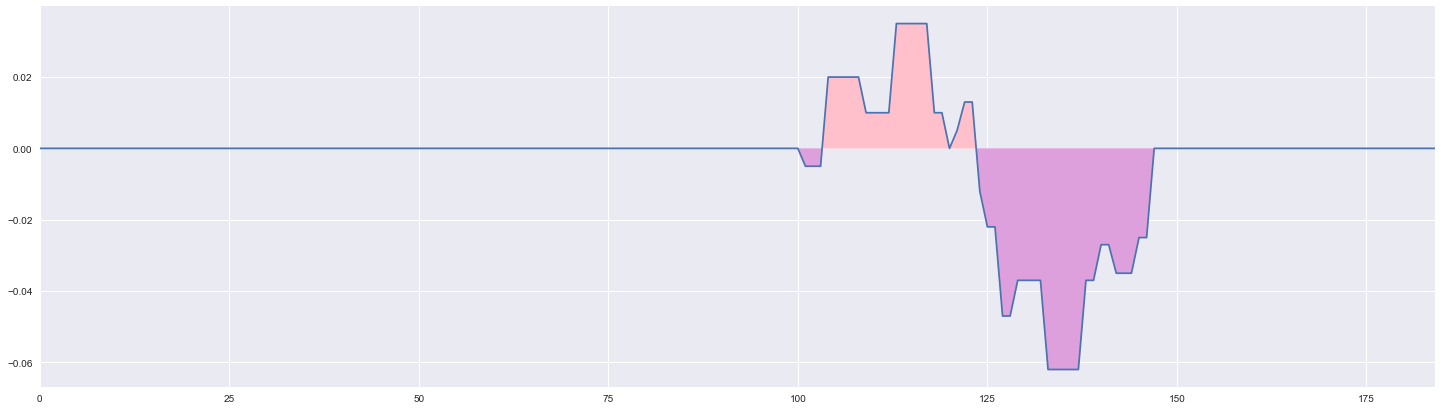

In [55]:
sentiment_runavg(Brienne_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')

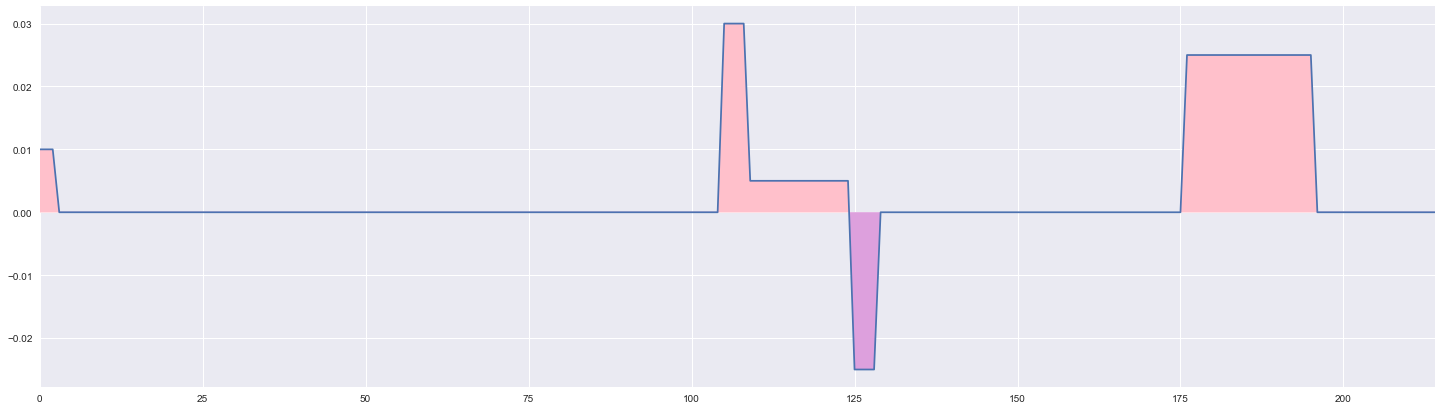

In [56]:
sentiment_runavg(Brienne_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')

### Catelyn

In [57]:
CatelynS1 = season_one_sentiment.loc['Catelyn Stark']

Catelyn_Sentiment_S1 = CatelynS1.values.tolist()

In [58]:
Catelyn_Polarity_S1 = polarity(Catelyn_Sentiment_S1)
Catelyn_Polarity_S1

[0.2,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.25,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 -0.10714285714285715,
 0.0,
 -0.13333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.21428571428571427,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.475,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 -0.3,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

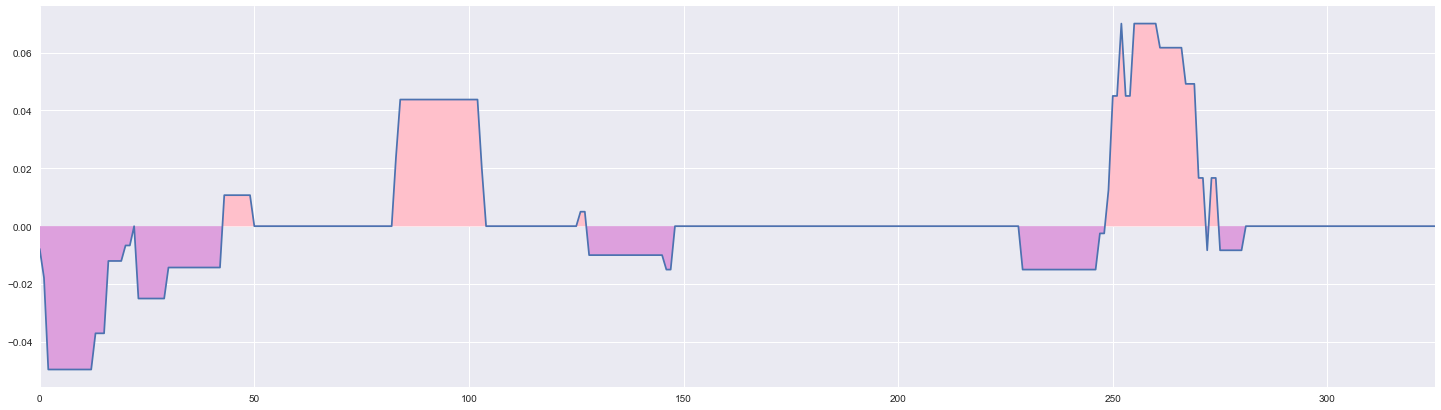

In [59]:
sentiment_runavg(Catelyn_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')

### Cersei

In [60]:
CerseiS1 = season_one_sentiment.loc['Cersei Baratheon']

Cersei_Sentiment_S1 = CerseiS1.values.tolist()

In [61]:
CerseiS5 = season_five_sentiment.loc['Cersei']

Cersei_Sentiment_S5 = CerseiS5.values.tolist()

In [62]:
CerseiS6 = season_six_sentiment.loc['Cersei']

Cersei_Sentiment_S6 = CerseiS6.values.tolist()

In [63]:
CerseiS7 = season_seven_sentiment.loc['Cersei']

Cersei_Sentiment_S7 = CerseiS7.values.tolist()

In [64]:
Cersei_Polarity_S1 = polarity(Cersei_Sentiment_S1)
Cersei_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 -0.1875,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.3125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.35,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 -0.35,
 -0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.05,
 0.0,
 0.08333333333333333,
 0.0,
 0.0,
 0.125,
 0.0,


In [65]:
Cersei_Polarity_S5 = polarity(Cersei_Sentiment_S5)

In [66]:
Cersei_Polarity_S6= polarity(Cersei_Sentiment_S6)

In [67]:
Cersei_Polarity_S7 = polarity(Cersei_Sentiment_S7)

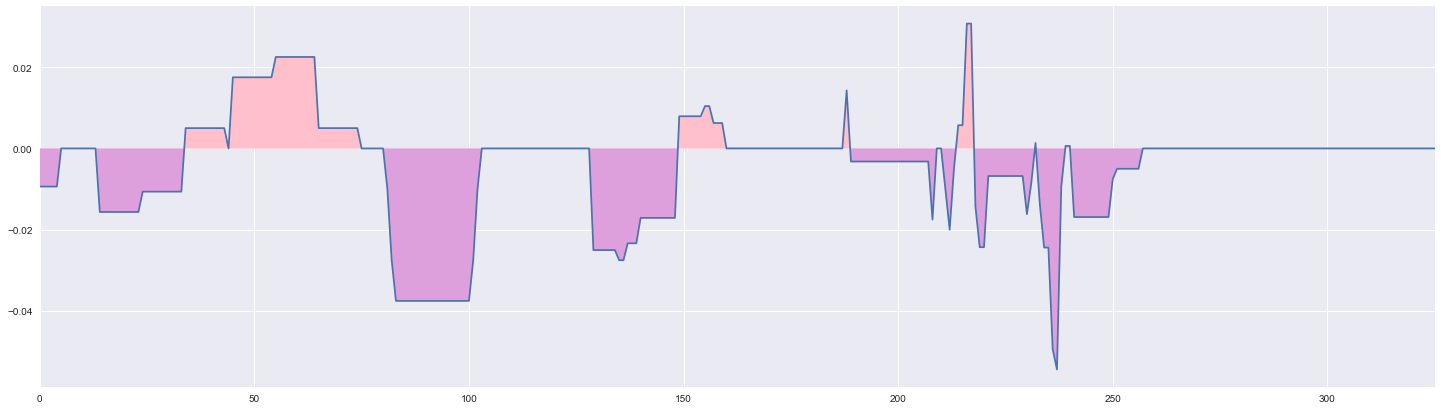

In [68]:
sentiment_runavg(Cersei_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')

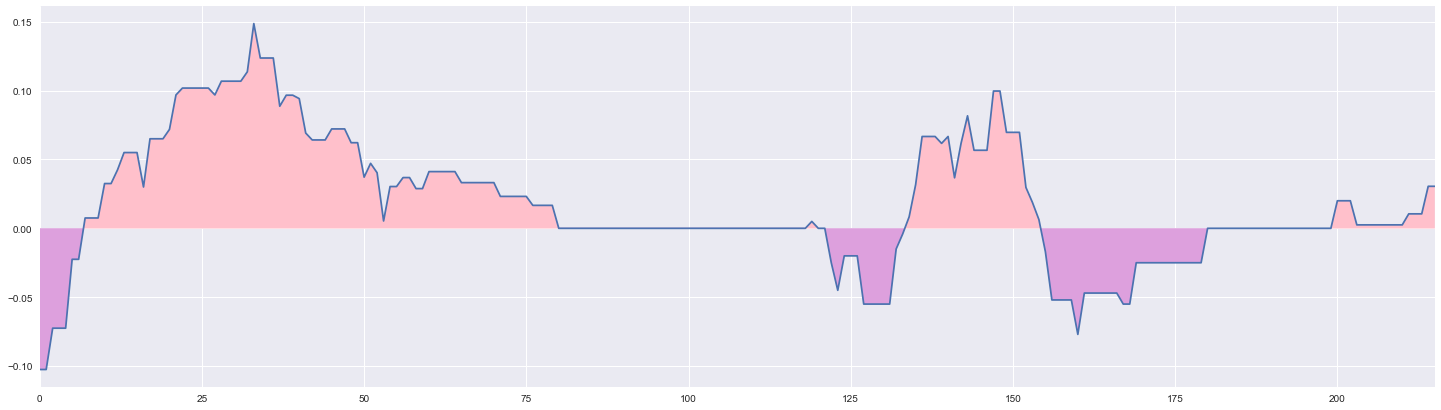

In [69]:
sentiment_runavg(Cersei_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')

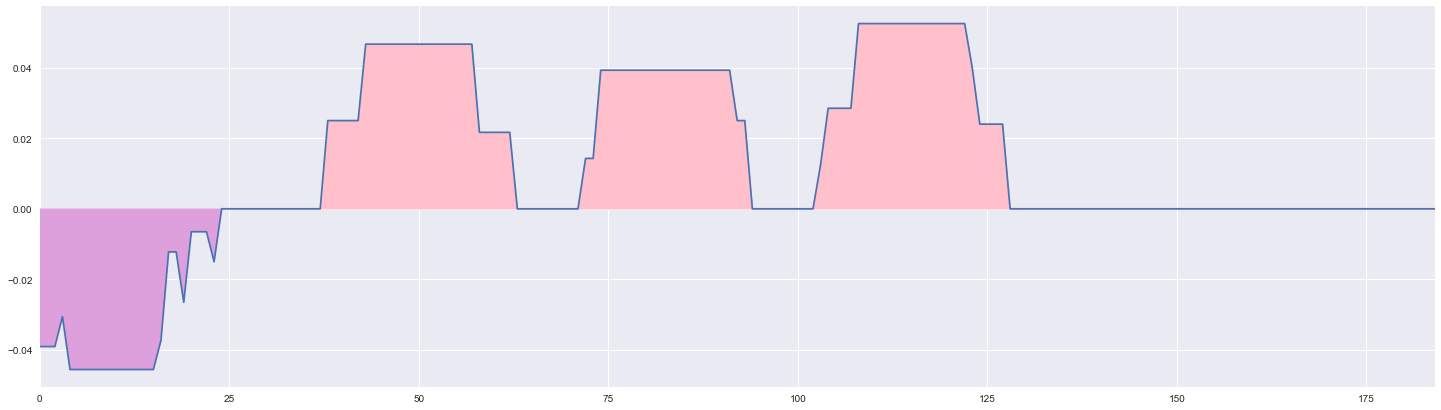

In [70]:
sentiment_runavg(Cersei_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')

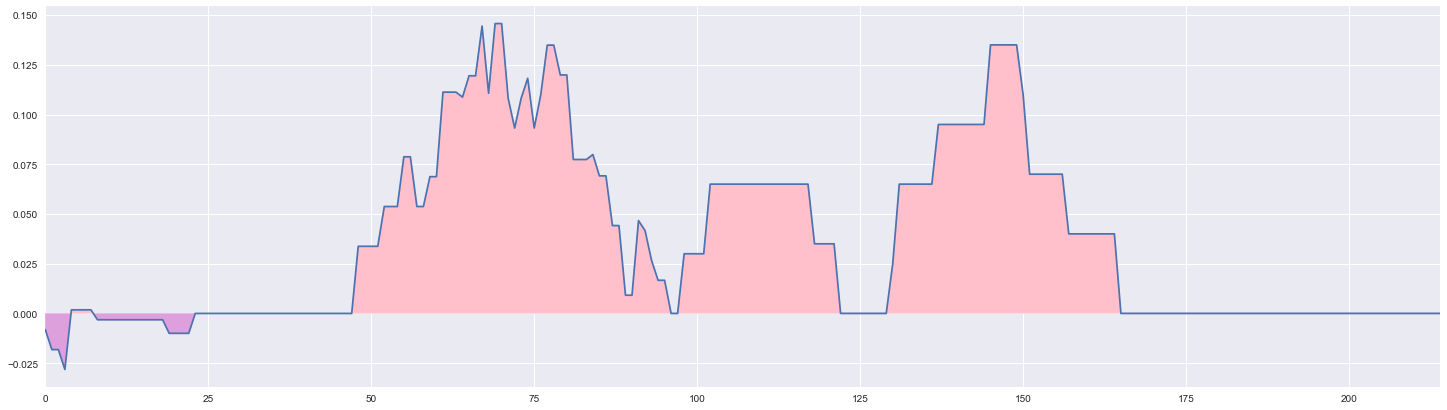

In [71]:
sentiment_runavg(Cersei_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')

### Daenerys

In [72]:
DaenerysS1 = season_one_sentiment.loc['Daenerys Targaryen']

Daenerys_Sentiment_S1 = DaenerysS1.values.tolist()

In [73]:
DaenerysS5 = season_five_sentiment.loc['Daenerys']

Daenerys_Sentiment_S5 = DaenerysS5.values.tolist()

In [74]:
DaenerysS6 = season_six_sentiment.loc['Daenerys']

Daenerys_Sentiment_S6 = DaenerysS6.values.tolist()

In [75]:
DaenerysS7 = season_seven_sentiment.loc['Daenerys']

Daenerys_Sentiment_S7 = DaenerysS7.values.tolist()

In [76]:
Daenerys_Polarity_S1 = polarity(Daenerys_Sentiment_S1)
Daenerys_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.85,
 -0.3,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.8,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2857142857142857,
 0.35,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [77]:
Daenerys_Polarity_S5 = polarity(Daenerys_Sentiment_S5)

In [78]:
Daenerys_Polarity_S6= polarity(Daenerys_Sentiment_S6)

In [79]:
Daenerys_Polarity_S7 = polarity(Daenerys_Sentiment_S7)

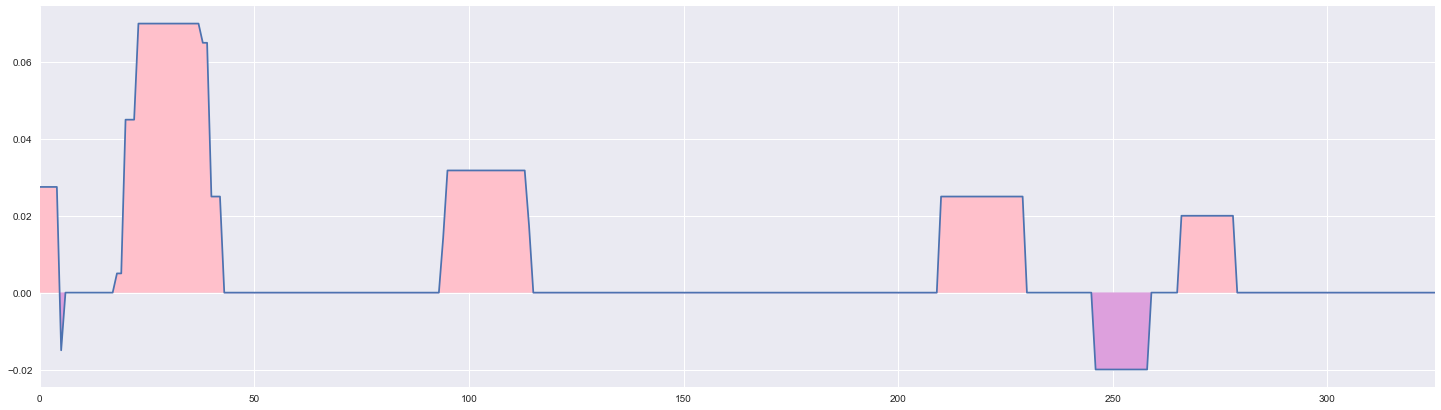

In [80]:
sentiment_runavg(Daenerys_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')

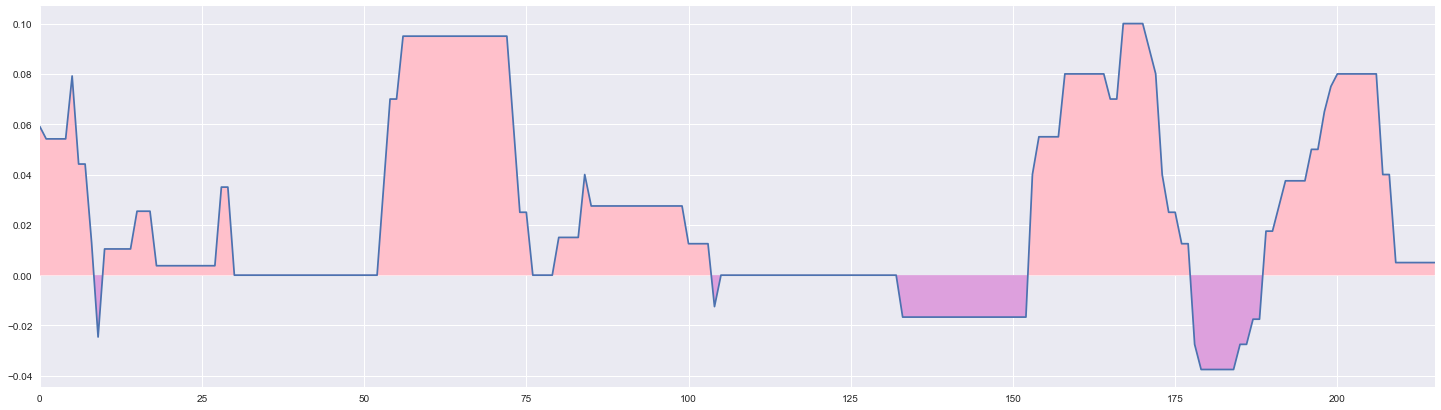

In [81]:
sentiment_runavg(Daenerys_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')

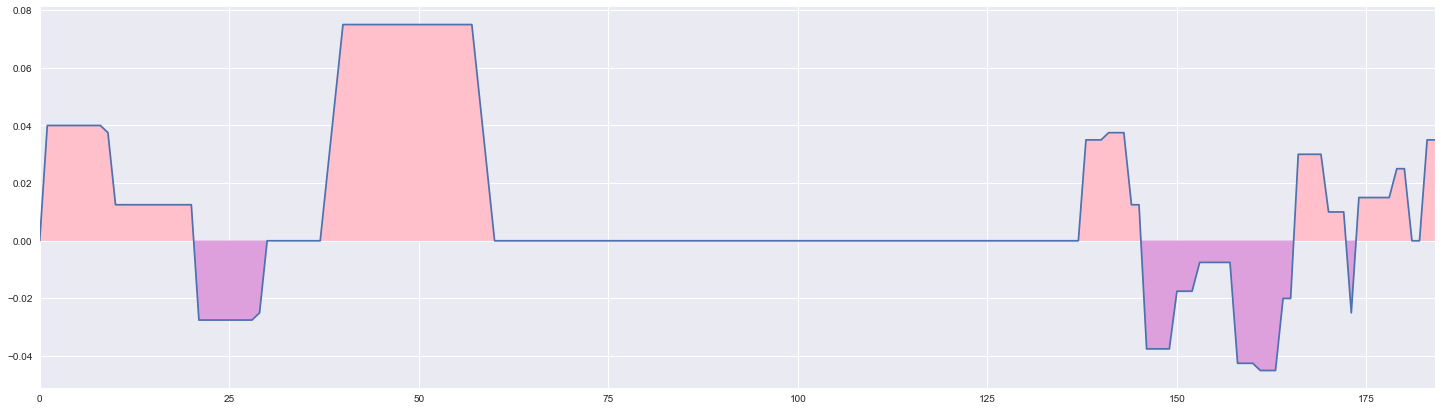

In [82]:
sentiment_runavg(Daenerys_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')

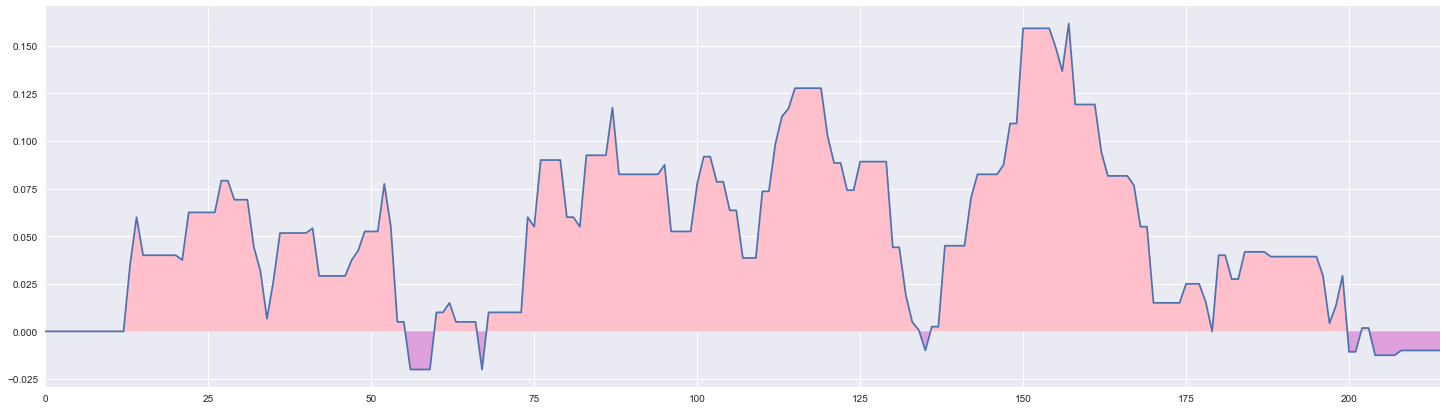

In [83]:
sentiment_runavg(Daenerys_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')

### Davos

In [84]:
DavosS5 = season_five_sentiment.loc['Davos']

Davos_Sentiment_S5 = DavosS5.values.tolist()

In [85]:
DavosS6 = season_six_sentiment.loc['Davos']

Davos_Sentiment_S6 = DavosS6.values.tolist()

In [86]:
DavosS7 = season_seven_sentiment.loc['Davos']

Davos_Sentiment_S7 = DavosS7.values.tolist()

In [87]:
Davos_Polarity_S5 = polarity(Davos_Sentiment_S5)
Davos_Polarity_S5

[0.0,
 0.5,
 0.2,
 0.7,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4681818181818182,
 -0.6499999999999999,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.35,
 0.0,
 -0.05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 -0.3888888888888889,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2916666666666667,
 -0.0833

In [88]:
Davos_Polarity_S6= polarity(Davos_Sentiment_S6)

In [89]:
Davos_Polarity_S7 = polarity(Davos_Sentiment_S7)

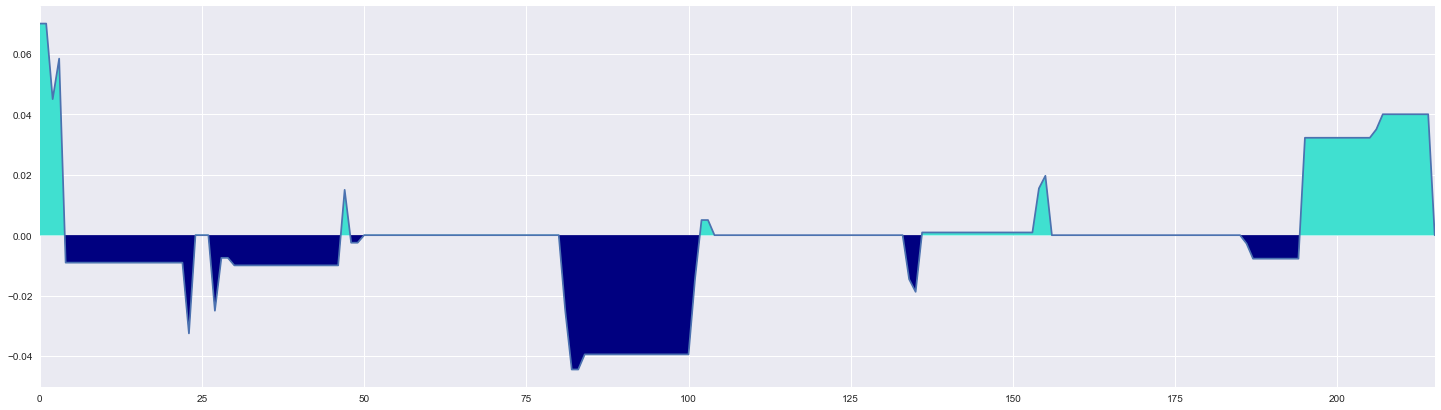

In [90]:
sentiment_runavg(Davos_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

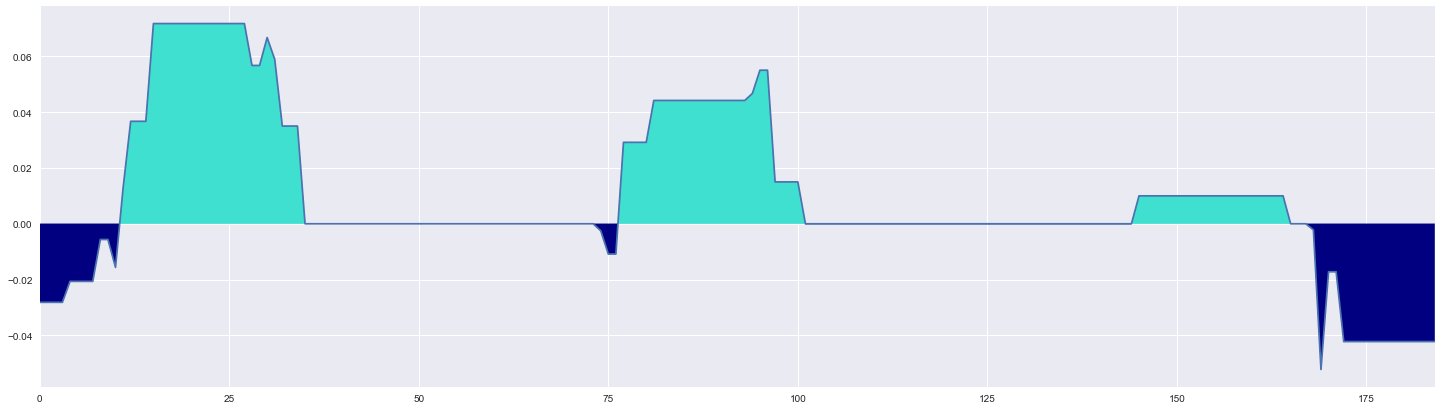

In [91]:
sentiment_runavg(Davos_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

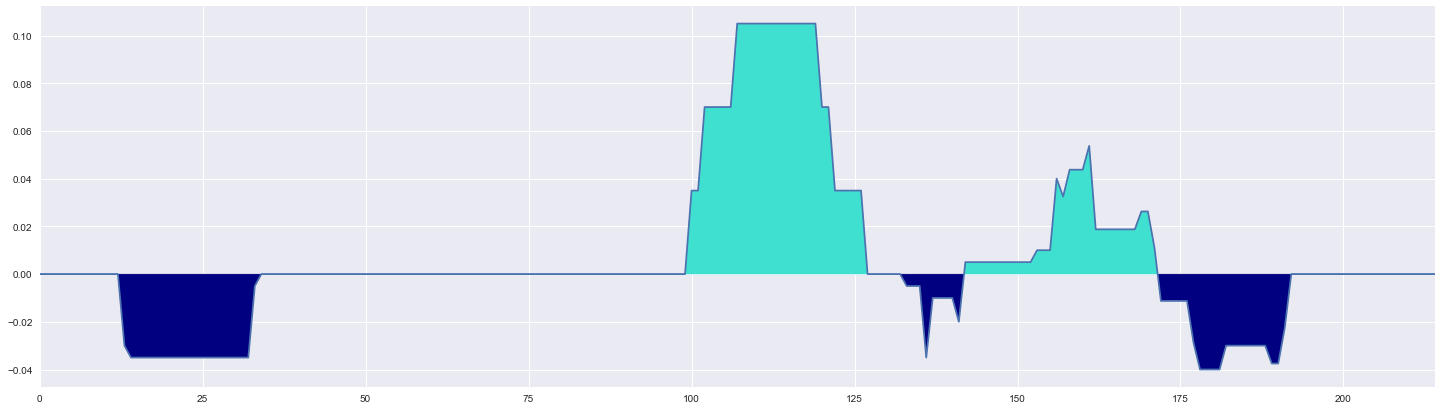

In [92]:
sentiment_runavg(Davos_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='navy')

### Eddard 

In [93]:
EddardS1 = season_one_sentiment.loc['Eddard Stark']

Eddard_Sentiment_S1 = EddardS1.values.tolist()

In [94]:
Eddard_Polarity_S1 = polarity(Eddard_Sentiment_S1)
Eddard_Polarity_S1

[0.0,
 0.25,
 0.25,
 -0.2,
 0.0,
 0.0,
 0.0,
 -0.14444444444444443,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.3,
 0.5,
 -0.5,
 0.0,
 0.0,
 0.0,
 -0.16666666666666666,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -0.1875,
 0.0,
 0.0,
 -0.125,
 0.0,
 0.0,
 0.0,
 0.14285714285714285,
 0.0,
 0.0,
 0.2857142857142857,
 0.0,
 0.0,
 0.0,
 0.5,
 -0.3125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.5,
 0.7,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.2857142857142857,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.35,
 0.0,
 0.0,
 0.0,
 -0.05,
 0.0,
 0.0,
 0.25,
 -0.6,
 -0.2,
 0.2857142857142857,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.125,
 0.0,
 0.5,
 0.0,
 0.4333333333333333,
 0.15714285714285714,
 0.0,
 0.0,
 0.0,
 -0.2916666666666667,
 0.0,
 0.2857142857142857,
 0.125,
 0.0,
 0.16,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,


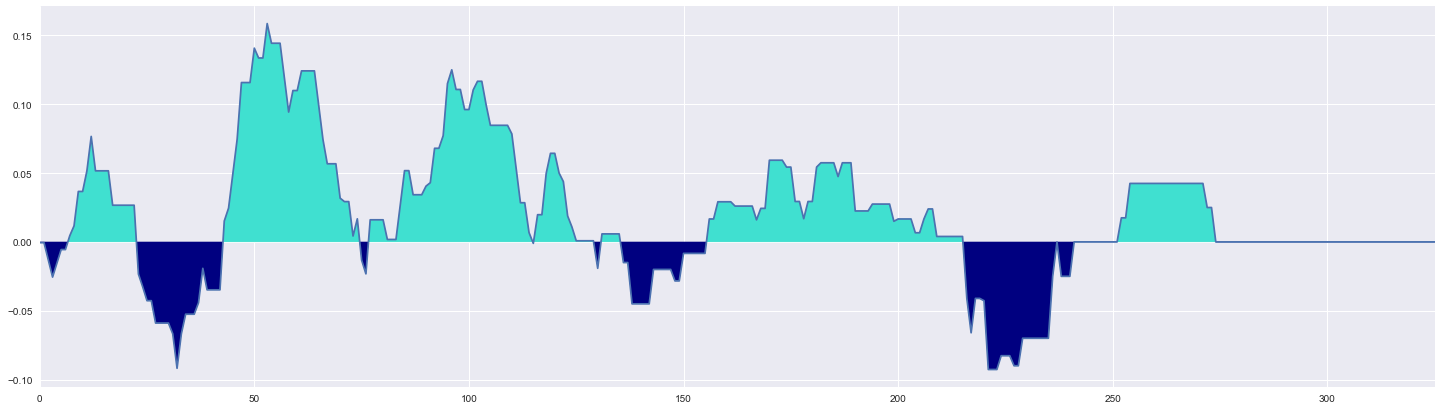

In [95]:
sentiment_runavg(Eddard_Polarity_S1, runavg=20, color_pos='turquoise', color_neg='navy')

### Gilly

In [96]:
GillyS5 = season_five_sentiment.loc['Gilly']

Gilly_Sentiment_S5 = GillyS5.values.tolist()

In [97]:
GillyS6 = season_six_sentiment.loc['Gilly']

Gilly_Sentiment_S6 = GillyS6.values.tolist()

In [98]:
GillyS7 = season_seven_sentiment.loc['Gilly']

Gilly_Sentiment_S7 = GillyS7.values.tolist()

In [99]:
Gilly_Polarity_S5 = polarity(Gilly_Sentiment_S5)
Gilly_Polarity_S5

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.7999999999999999,
 -0.1875,
 0.0,
 0.0,
 

In [100]:
Gilly_Polarity_S6= polarity(Gilly_Sentiment_S6)

In [101]:
Gilly_Polarity_S7 = polarity(Gilly_Sentiment_S7)

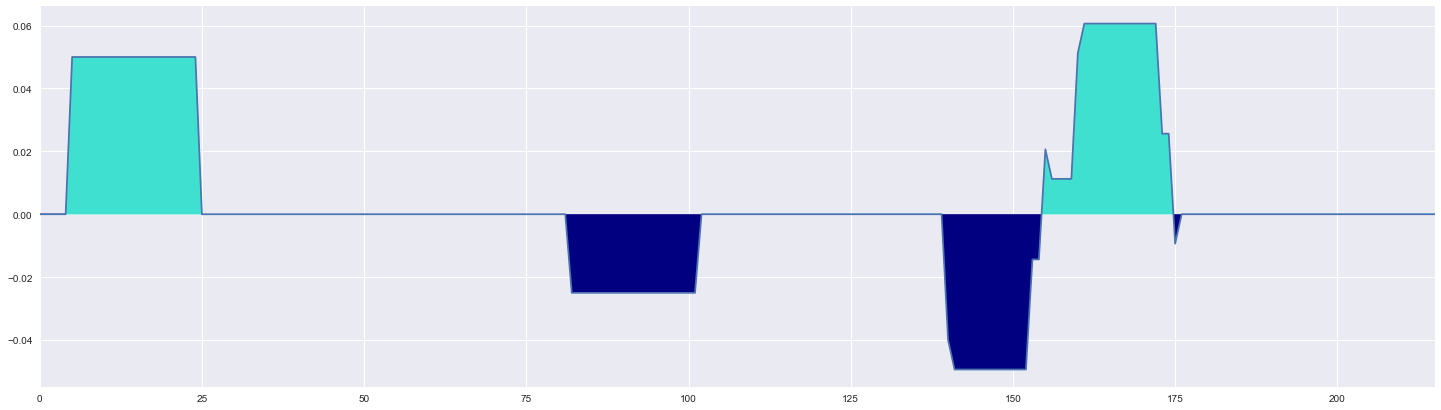

In [102]:
sentiment_runavg(Gilly_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

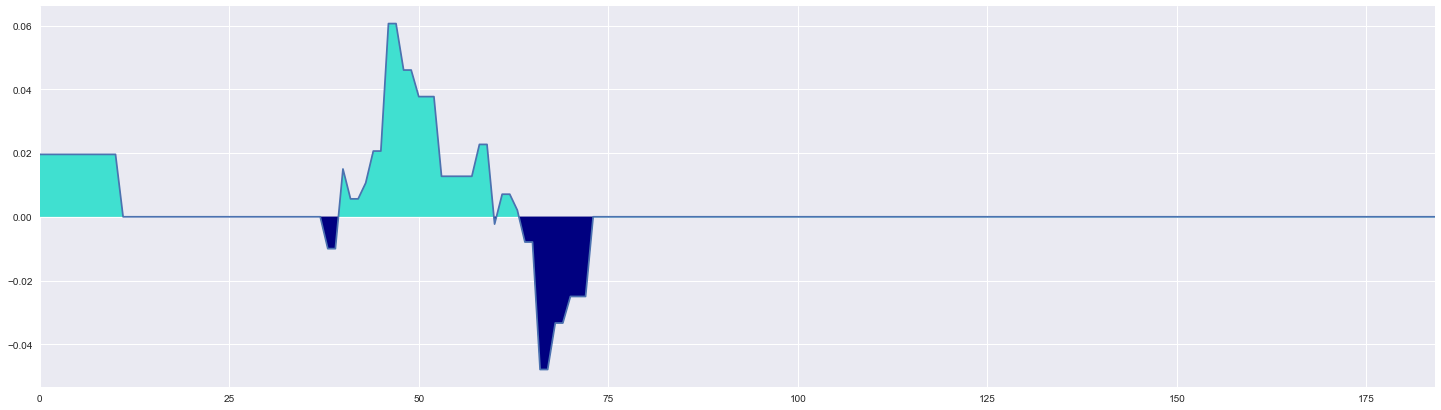

In [103]:
sentiment_runavg(Gilly_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

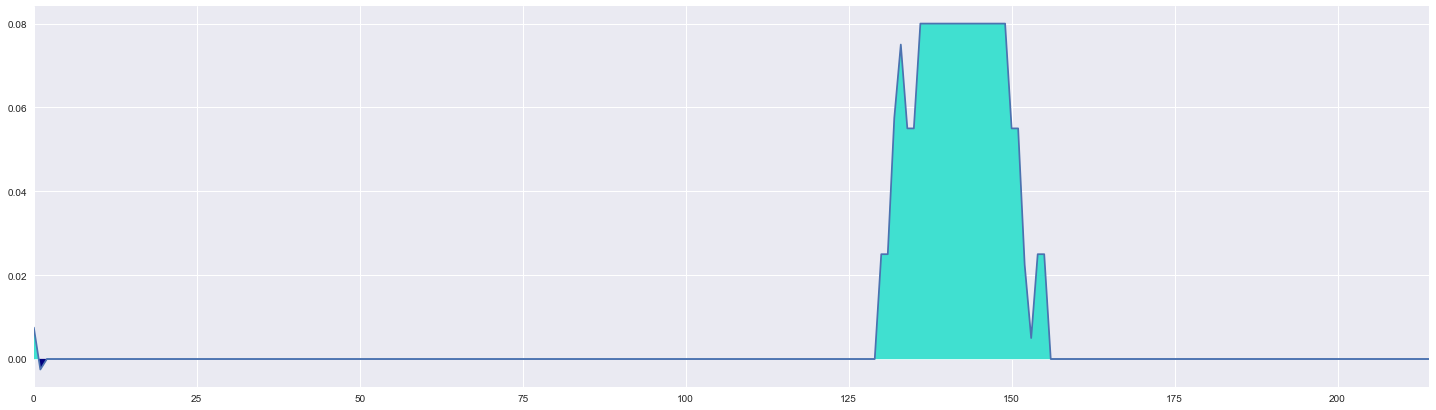

In [104]:
sentiment_runavg(Gilly_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='navy')

### Jaime

In [105]:
JaimeS1 = season_one_sentiment.loc['Jaime Lannister']

Jaime_Sentiment_S1 = JaimeS1.values.tolist()

In [106]:
JaimeS5 = season_five_sentiment.loc['Jaime']

Jaime_Sentiment_S5 = JaimeS5.values.tolist()

In [107]:
JaimeS6 = season_six_sentiment.loc['Jaime']

Jaime_Sentiment_S6 = JaimeS6.values.tolist()

In [108]:
JaimeS7 = season_seven_sentiment.loc['Jaime']

Jaime_Sentiment_S7 = JaimeS7.values.tolist()

In [109]:
Jaime_Polarity_S1 = polarity(Jaime_Sentiment_S1)
Jaime_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3181818181818182,
 0.0,
 0.0,
 -0.625,
 0.2857142857142857,
 0.25,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.1875,
 -0.16666666666666666,
 0.7,
 -0.3125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.30000000000000004,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 -0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.25,
 0.0,
 0.25,
 -0.2,
 -0.2,
 0.28571428571428

In [110]:
Jaime_Polarity_S5 = polarity(Jaime_Sentiment_S5)

In [111]:
Jaime_Polarity_S6 = polarity(Jaime_Sentiment_S6)

In [112]:
Jaime_Polarity_S7 = polarity(Jaime_Sentiment_S7)

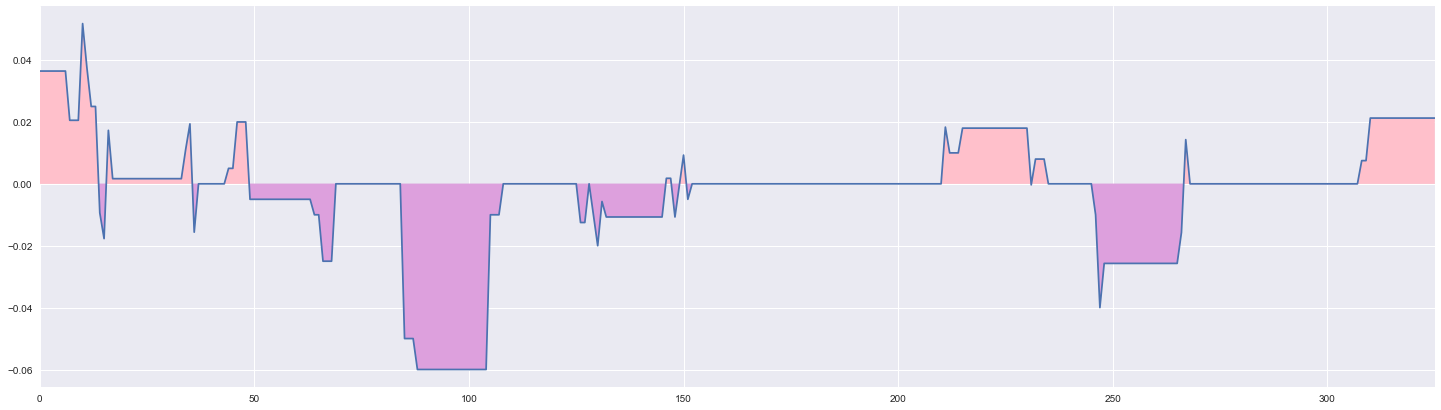

In [113]:
sentiment_runavg(Jaime_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')

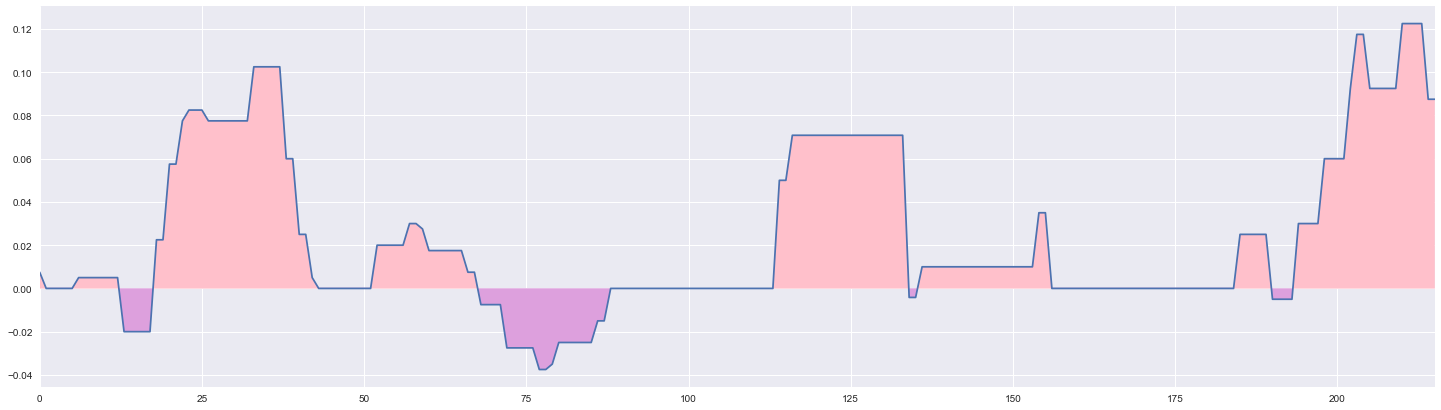

In [114]:
sentiment_runavg(Jaime_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')

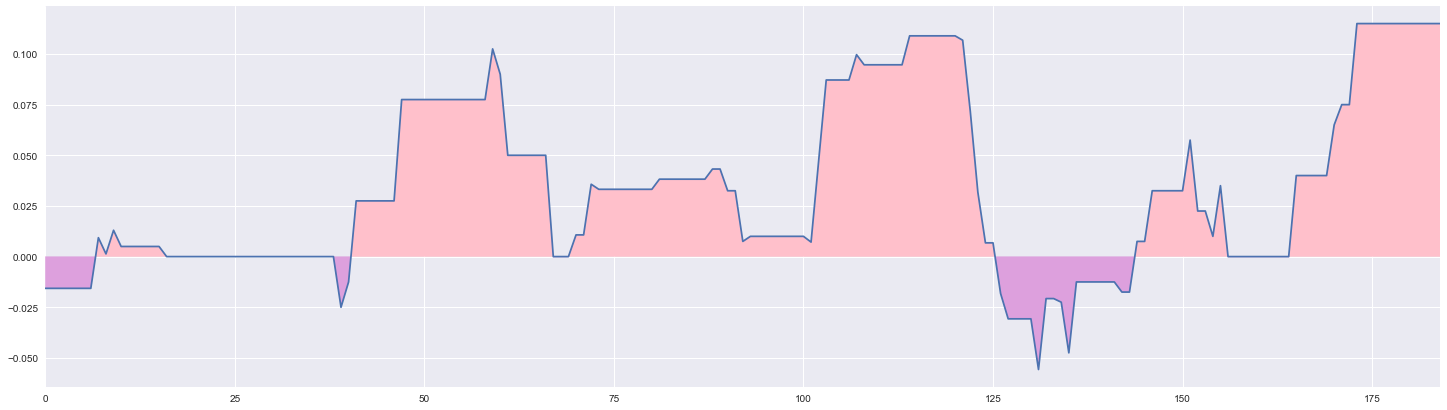

In [115]:
sentiment_runavg(Jaime_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')

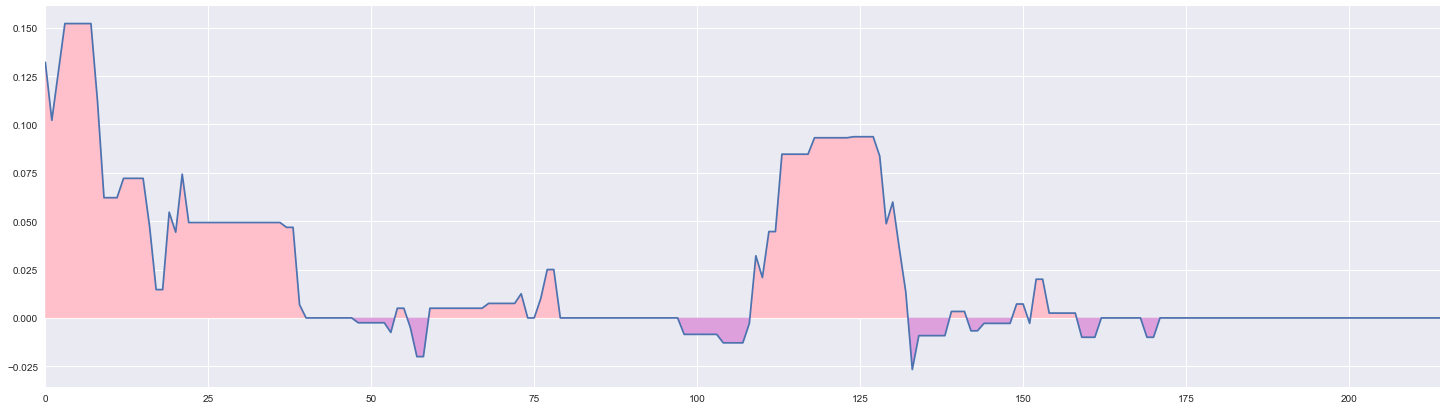

In [116]:
sentiment_runavg(Jaime_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')

### Joffrey

In [117]:
JoffreyS1 = season_one_sentiment.loc['Joffrey Baratheon']

Joffrey_Sentiment_S1 = JoffreyS1.values.tolist()

In [118]:
Joffrey_Polarity_S1 = polarity(Joffrey_Sentiment_S1)
Joffrey_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.2,
 0.0,
 0.0,
 0.2,
 -0.34375,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.7,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

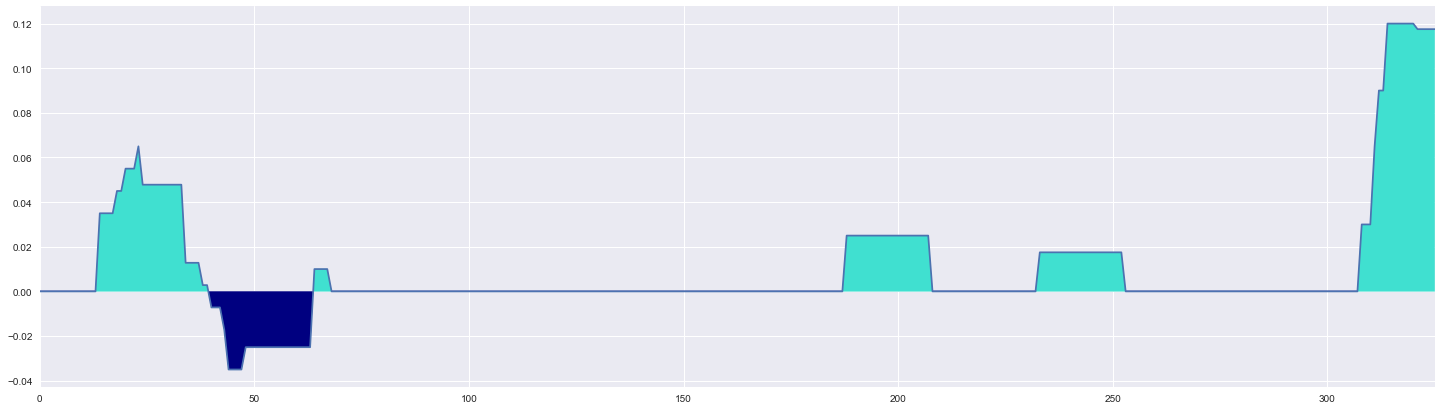

In [119]:
sentiment_runavg(Joffrey_Polarity_S1, runavg=20, color_pos='turquoise', color_neg='navy')

### Jon

In [120]:
JonS1 = season_one_sentiment.loc['Jon Snow']

Jon_Sentiment_S1 = JonS1.values.tolist()

In [121]:
JonS5 = season_five_sentiment.loc['Jon']

Jon_Sentiment_S5 = JonS5.values.tolist()

In [122]:
JonS6 = season_six_sentiment.loc['Jon Snow']

Jon_Sentiment_S6 = JonS6.values.tolist()

In [123]:
JonS7 = season_seven_sentiment.loc['Jon']

Jon_Sentiment_S7 = JonS7.values.tolist()

In [124]:
Jon_Polarity_S1 = polarity(Jon_Sentiment_S1)
Jon_Polarity_S1

[0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.25,
 0.0,
 -0.2,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7,
 1.0,
 0.0,
 0.25,
 0.0,
 0.0,
 0.2,
 0.0,
 -0.2,
 0.04999999999999999,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.2,
 0.15,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 -0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.39999999999999997,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,

In [125]:
Jon_Polarity_S5 = polarity(Jon_Sentiment_S5)

In [126]:
Jon_Polarity_S6 = polarity(Jon_Sentiment_S6)

In [127]:
Jon_Polarity_S7 = polarity(Jon_Sentiment_S7)

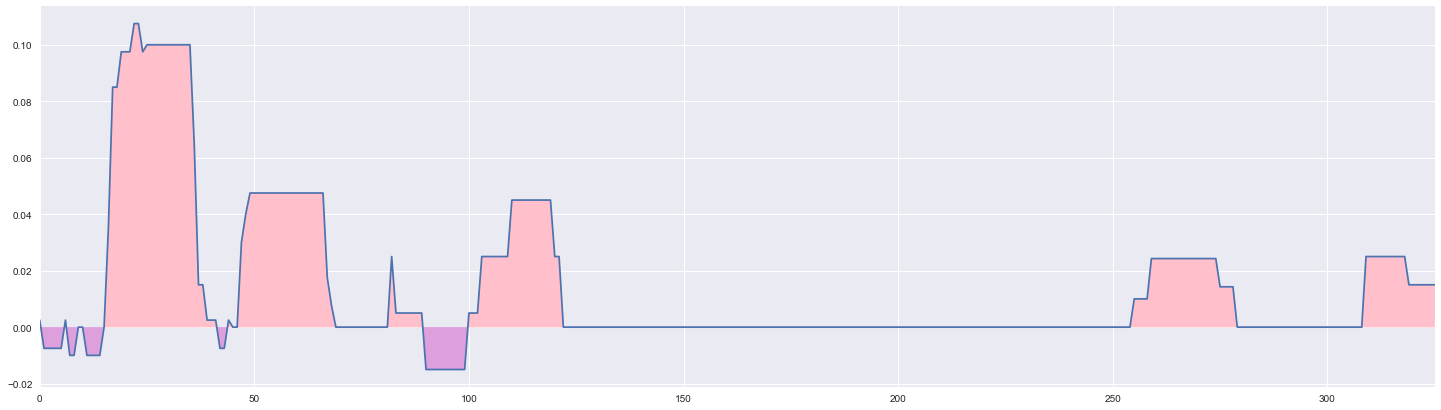

In [128]:
sentiment_runavg(Jon_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')

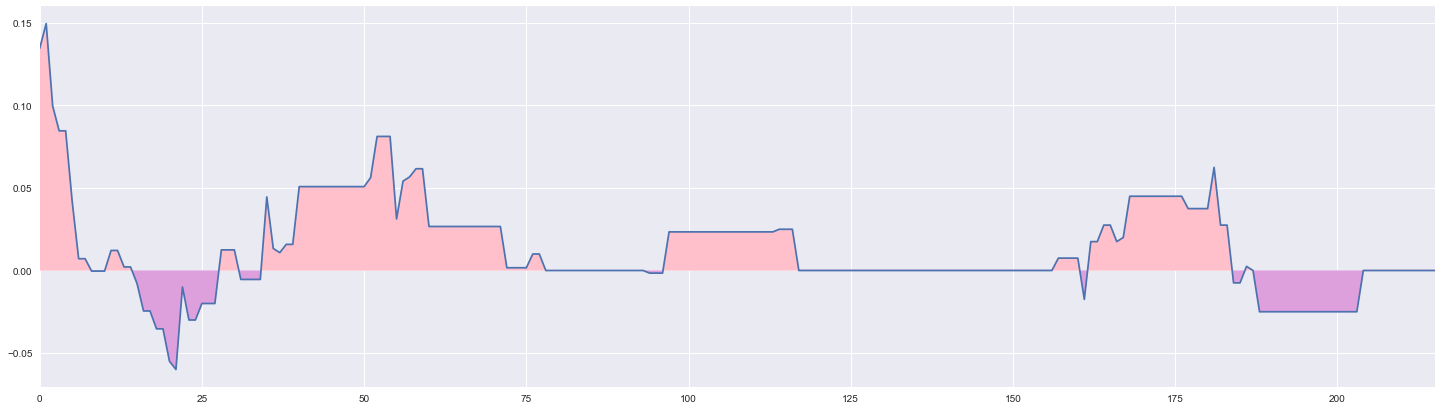

In [129]:
sentiment_runavg(Jon_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')

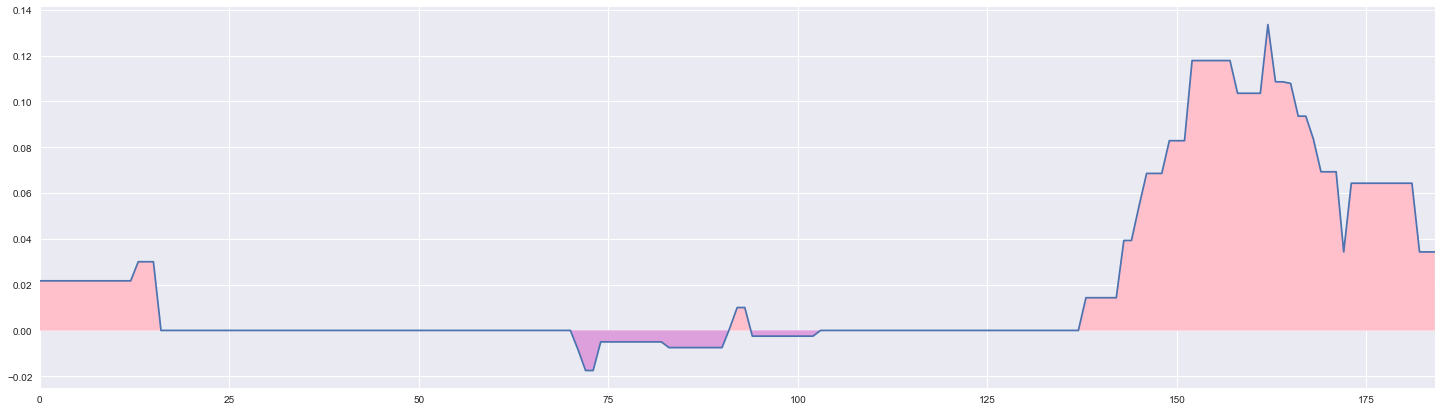

In [130]:
sentiment_runavg(Jon_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')

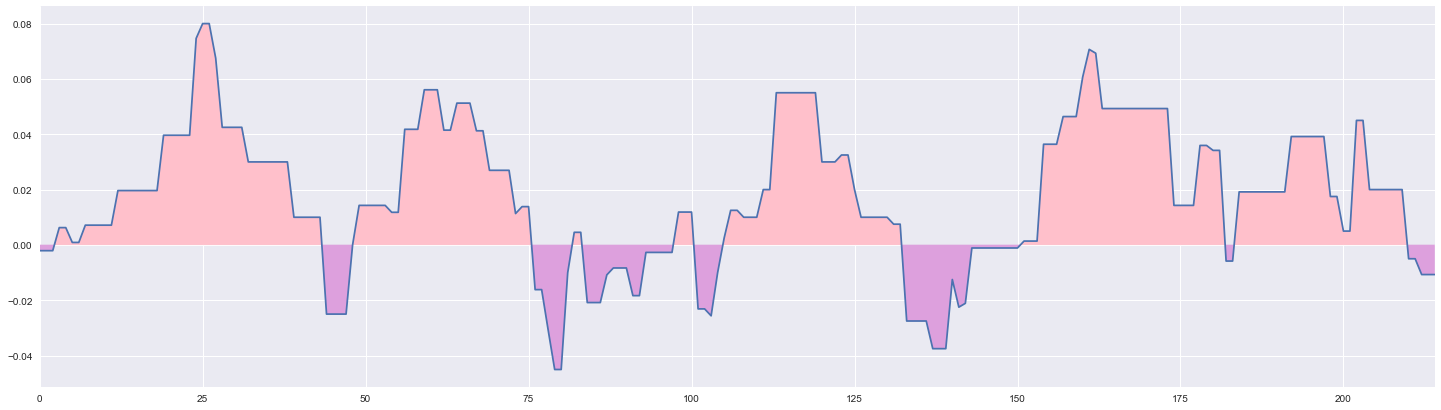

In [131]:
sentiment_runavg(Jon_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')

### Jorah

In [132]:
JorahS1 = season_one_sentiment.loc['Jorah Mormont']

Jorah_Sentiment_S1 = JorahS1.values.tolist()

In [133]:
JorahS5 = season_five_sentiment.loc['Jorah']

Jorah_Sentiment_S5 = JorahS5.values.tolist()

In [134]:
JorahS6 = season_six_sentiment.loc['Jorah']

Jorah_Sentiment_S6 = JorahS6.values.tolist()

In [135]:
JorahS7 = season_seven_sentiment.loc['Jorah']

Jorah_Sentiment_S7 = JorahS7.values.tolist()

In [136]:
Jorah_Polarity_S1 = polarity(Jorah_Sentiment_S1)
Jorah_Polarity_S1

[-0.05681818181818182,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.2,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.0,
 -0.05,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 -0.3,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,

In [137]:
Jorah_Polarity_S5 = polarity(Jorah_Sentiment_S5)

In [138]:
Jorah_Polarity_S6 = polarity(Jorah_Sentiment_S6)

In [139]:
Jorah_Polarity_S7 = polarity(Jorah_Sentiment_S7)

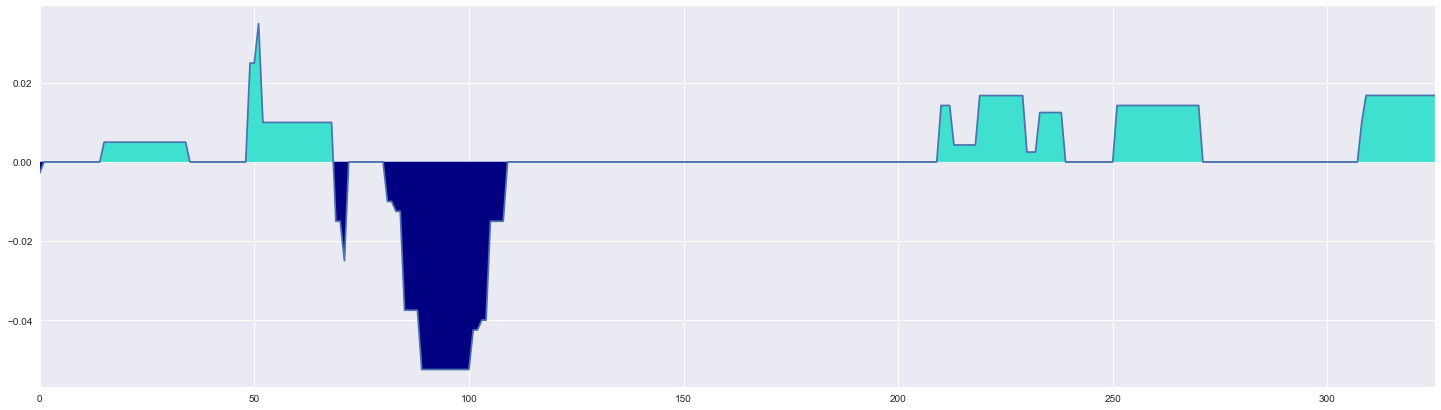

In [140]:
sentiment_runavg(Jorah_Polarity_S1, runavg=20, color_pos='turquoise', color_neg='navy')

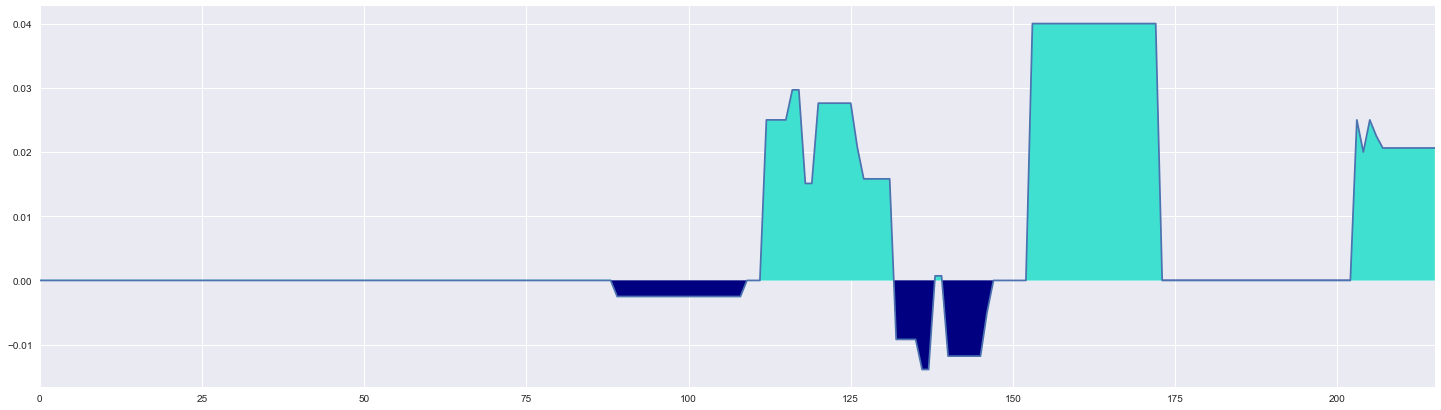

In [141]:
sentiment_runavg(Jorah_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

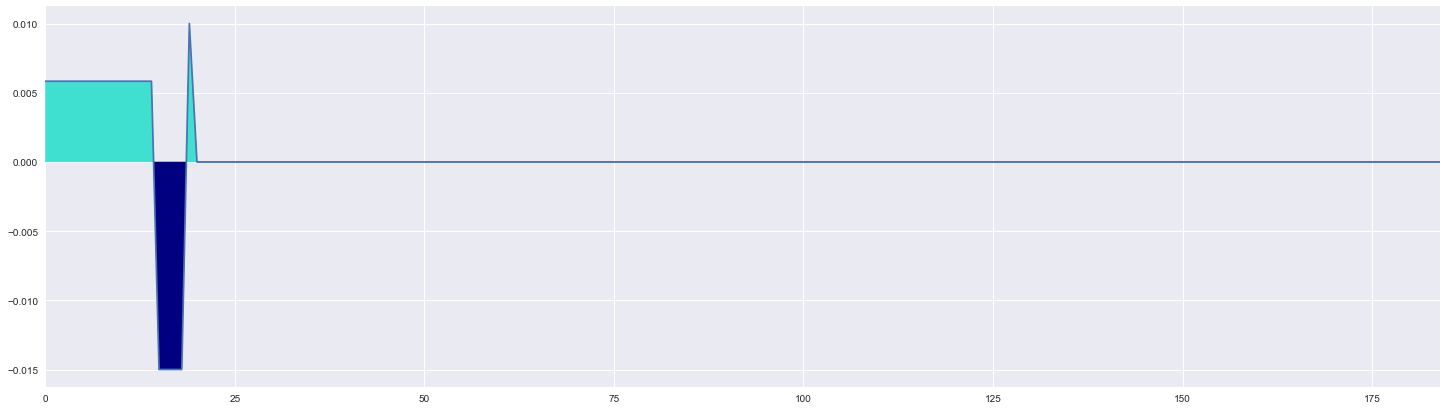

In [142]:
sentiment_runavg(Jorah_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

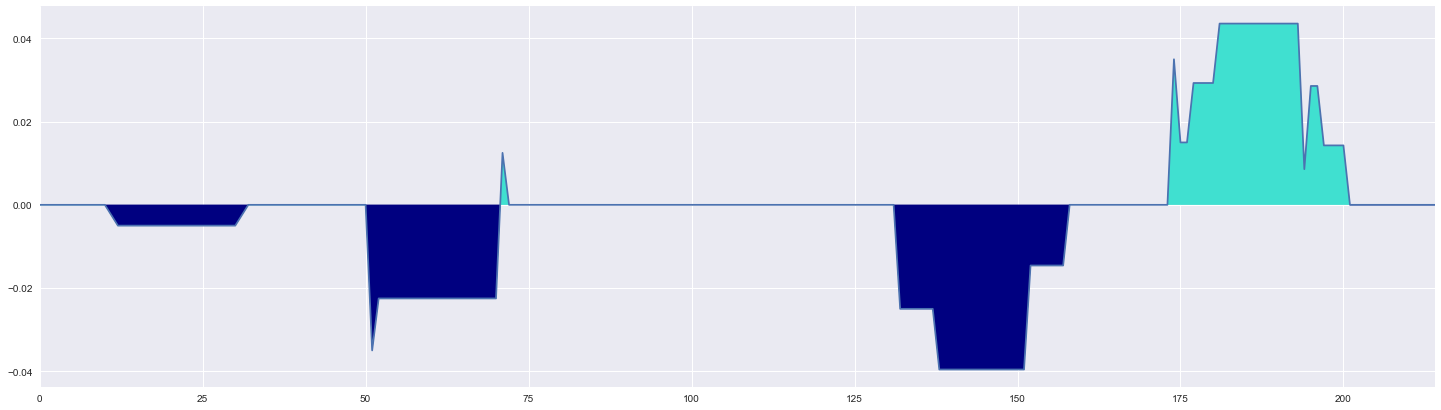

In [143]:
sentiment_runavg(Jorah_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='navy')

### Margaery

In [144]:
MargaeryS5 = season_five_sentiment.loc['Margaery']

Margaery_Sentiment_S5 = MargaeryS5.values.tolist()

In [145]:
MargaeryS6 = season_six_sentiment.loc['Margaery']

Margaery_Sentiment_S6 = MargaeryS6.values.tolist()

In [146]:
Margaery_Polarity_S5 = polarity(Margaery_Sentiment_S5)
Margaery_Polarity_S5

[-0.3,
 0.0,
 0.0,
 -0.6,
 0.0,
 0.0,
 0.3333333333333333,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4166666666666667,
 0.0,
 0.8,
 0.16,
 1.0,
 0.0,
 0.6,
 0.0,
 0.0,
 0.35,
 0.2,
 0.0,
 -0.225,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.43333333333333335,
 0.0,
 0.0,
 0.0,
 0.

In [147]:
Margaery_Polarity_S6 = polarity(Margaery_Sentiment_S6)

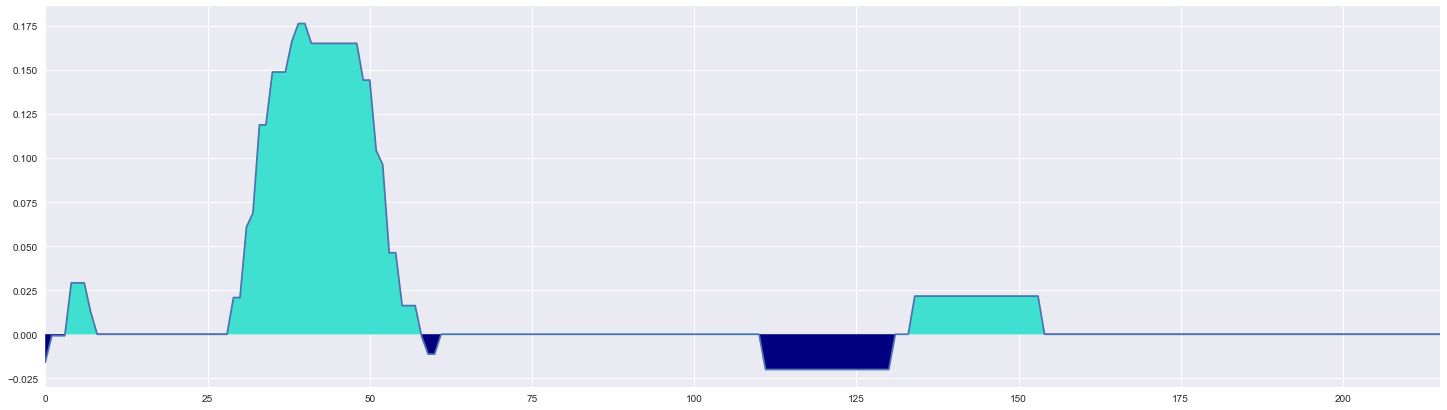

In [148]:
sentiment_runavg(Margaery_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

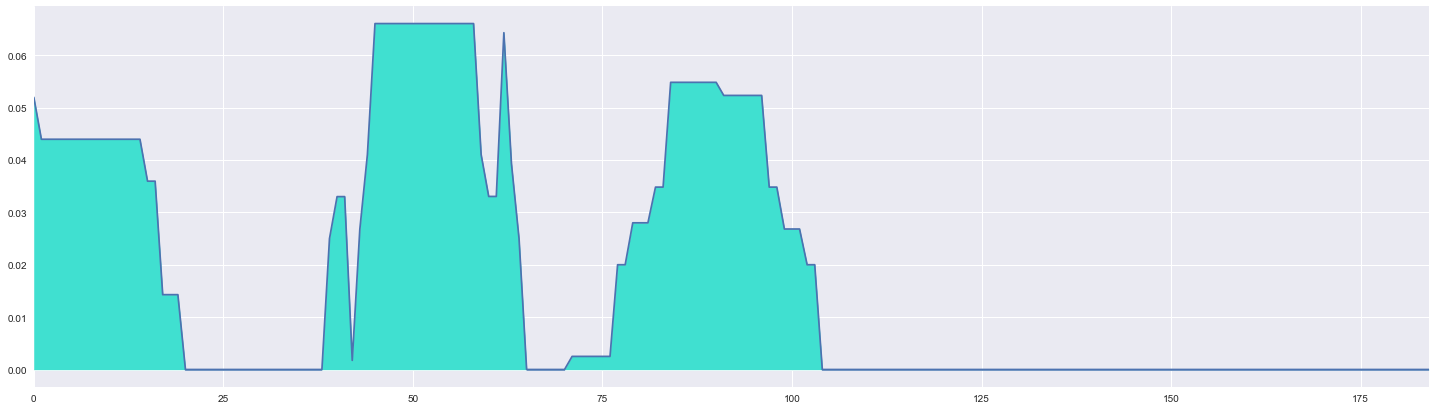

In [149]:
sentiment_runavg(Margaery_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

### Melisandre

In [150]:
MelisandreS5 = season_five_sentiment.loc['Melisandre']

Melisandre_Sentiment_S5 = MelisandreS5.values.tolist()

In [151]:
MelisandreS6 =season_six_sentiment.loc['Melisandre']

Melisandre_Sentiment_S6 = MelisandreS6.values.tolist()

In [152]:
MelisandreS7 = season_seven_sentiment.loc['Melisandre']

Melisandre_Sentiment_S7 = MelisandreS7.values.tolist()

In [153]:
Melisandre_Polarity_S5 = polarity(Melisandre_Sentiment_S5)
Melisandre_Polarity_S5

[0.2,
 0.0,
 0.0,
 0.1,
 0.375,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.13333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [154]:
Melisandre_Polarity_S6 = polarity(Melisandre_Sentiment_S6)

In [155]:
Melisandre_Polarity_S7 = polarity(Melisandre_Sentiment_S7)

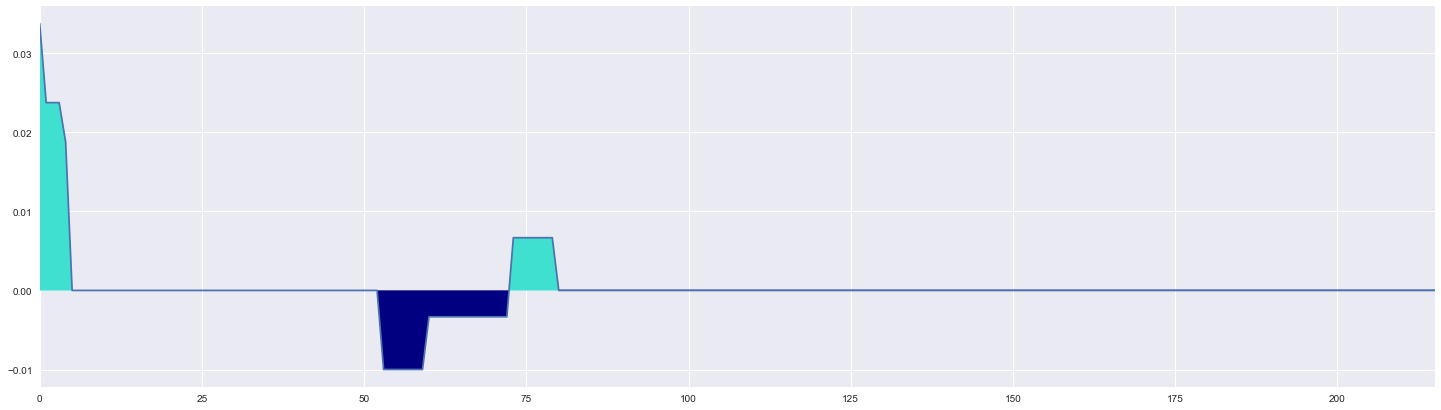

In [156]:
sentiment_runavg(Melisandre_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

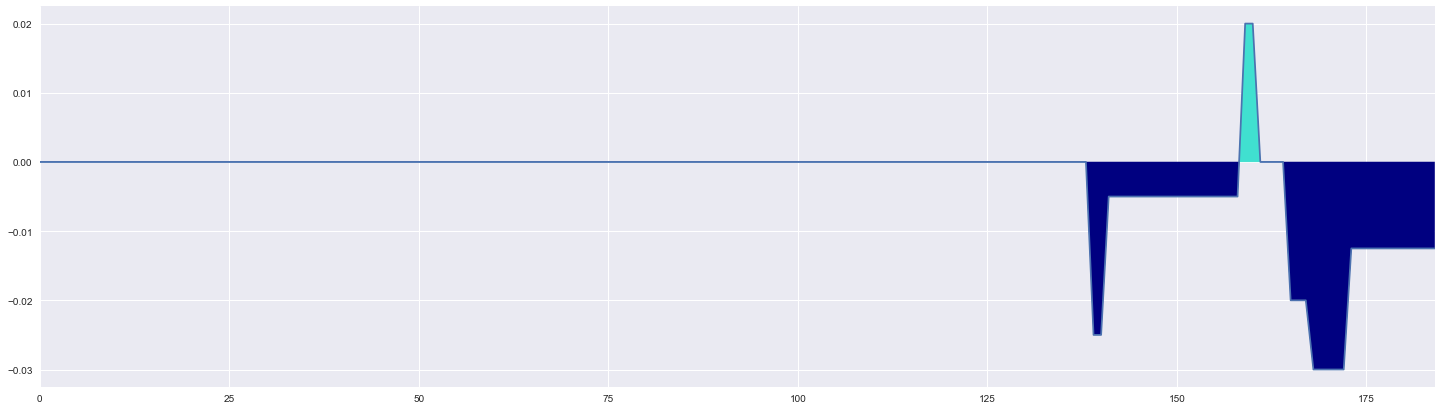

In [157]:
sentiment_runavg(Melisandre_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

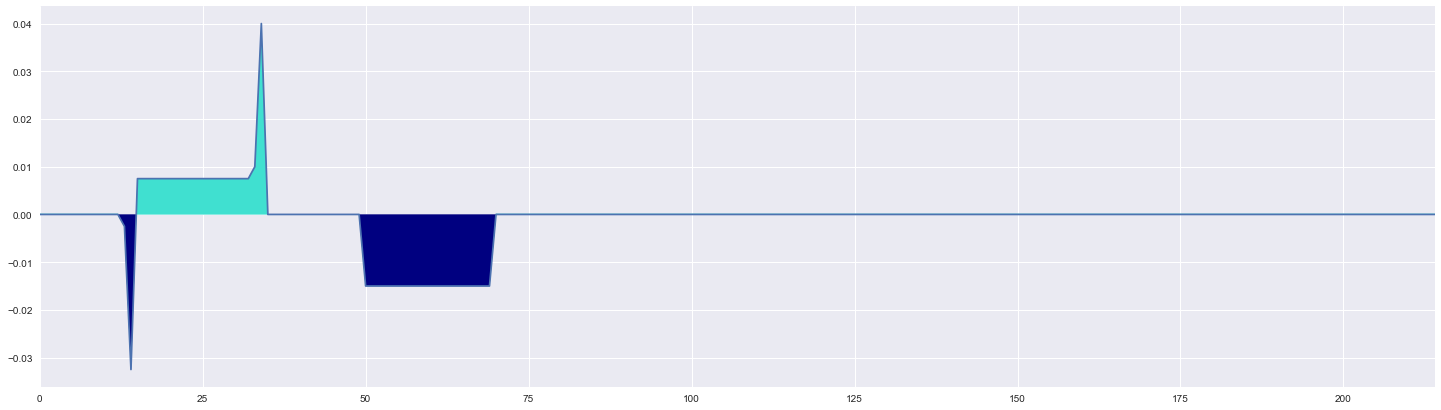

In [158]:
sentiment_runavg(Melisandre_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='navy')

### Missandei

In [159]:
MissandeiS5 = season_five_sentiment.loc['Missandei']

Missandei_Sentiment_S5 = MissandeiS5.values.tolist()

In [160]:
MissandeiS6 =season_six_sentiment.loc['Missandei']

Missandei_Sentiment_S6 = MissandeiS6.values.tolist()

In [161]:
MissandeiS7 = season_seven_sentiment.loc['Missandei']

Missandei_Sentiment_S7 = MissandeiS7.values.tolist()

In [162]:
Missandei_Polarity_S5 = polarity(Missandei_Sentiment_S5)
Missandei_Polarity_S5

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [163]:
Missandei_Polarity_S6 = polarity(Missandei_Sentiment_S6)

In [164]:
Missandei_Polarity_S7 = polarity(Missandei_Sentiment_S7)

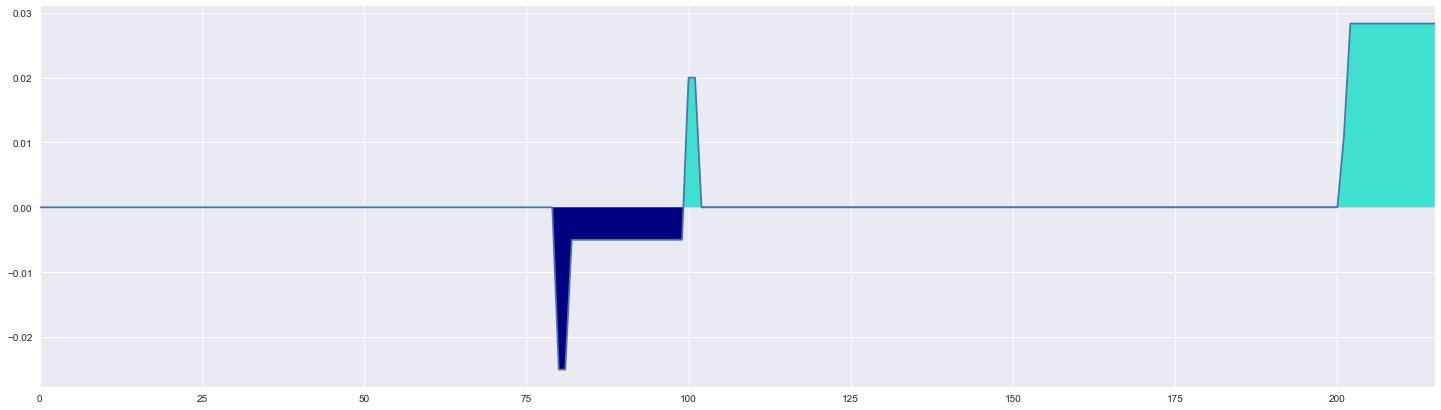

In [165]:
sentiment_runavg(Missandei_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

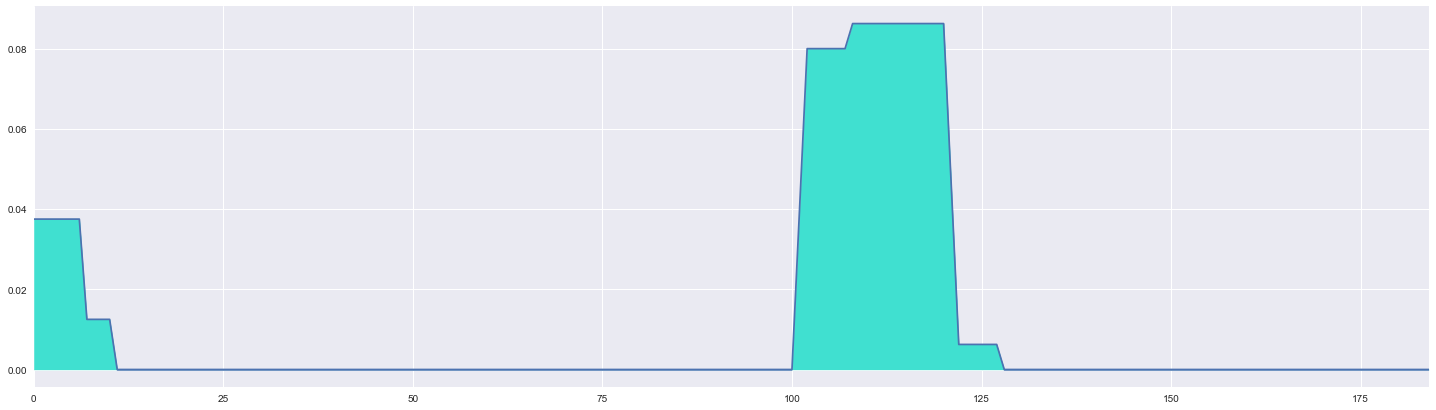

In [166]:
sentiment_runavg(Missandei_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

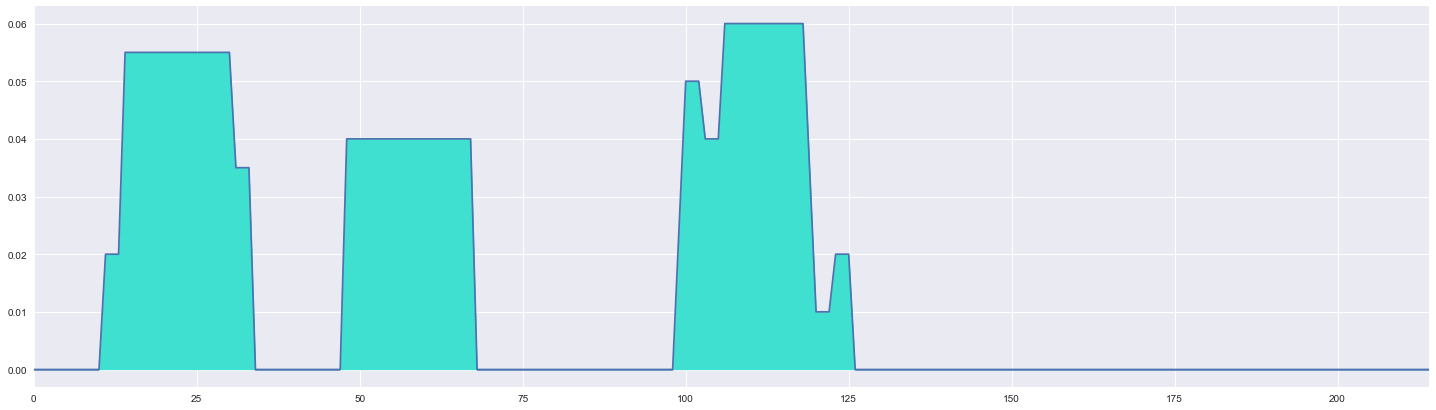

In [167]:
sentiment_runavg(Missandei_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='navy')

### Olenna

In [168]:
OlennaS5 = season_five_sentiment.loc['Olenna']

Olenna_Sentiment_S5 = OlennaS5.values.tolist()

In [169]:
OlennaS6 =season_six_sentiment.loc['Olenna']

Olenna_Sentiment_S6 = OlennaS6.values.tolist()

In [170]:
OlennaS7 = season_seven_sentiment.loc['Olenna']

Olenna_Sentiment_S7 = OlennaS7.values.tolist()

In [171]:
Olenna_Polarity_S5 = polarity(Olenna_Sentiment_S5)
Olenna_Polarity_S5

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.16666666666666666,
 0.0,
 0.0,
 0.0,
 0.5,
 -0.45,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.1666

In [172]:
Olenna_Polarity_S6 = polarity(Olenna_Sentiment_S6)

In [173]:
Olenna_Polarity_S7 = polarity(Olenna_Sentiment_S7)

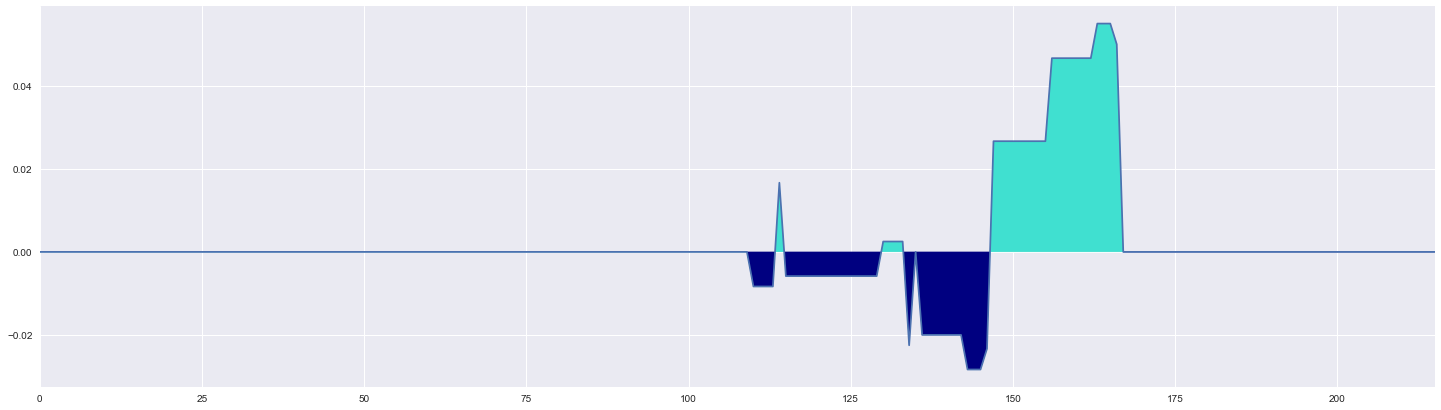

In [174]:
sentiment_runavg(Olenna_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

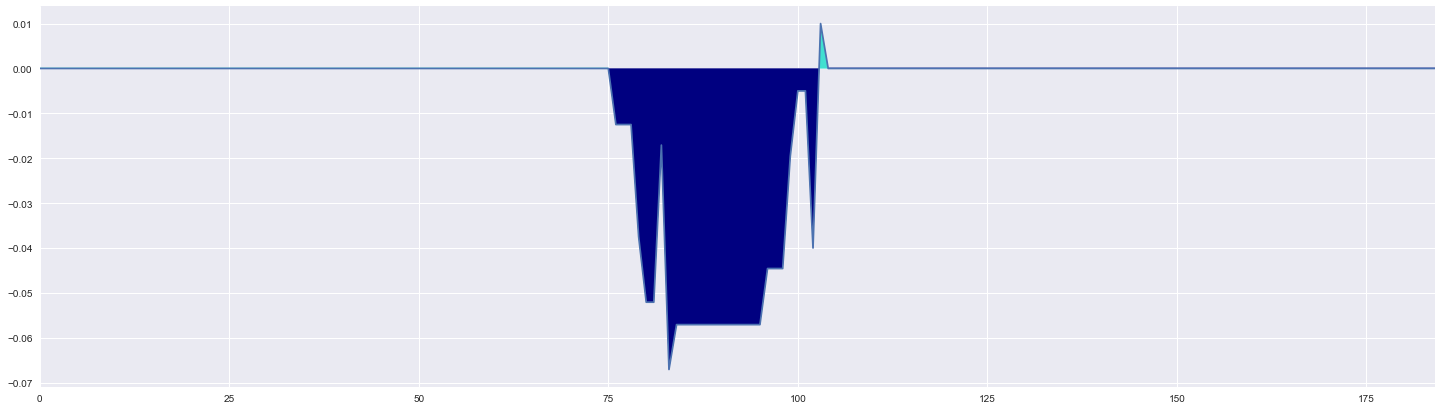

In [175]:
sentiment_runavg(Olenna_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

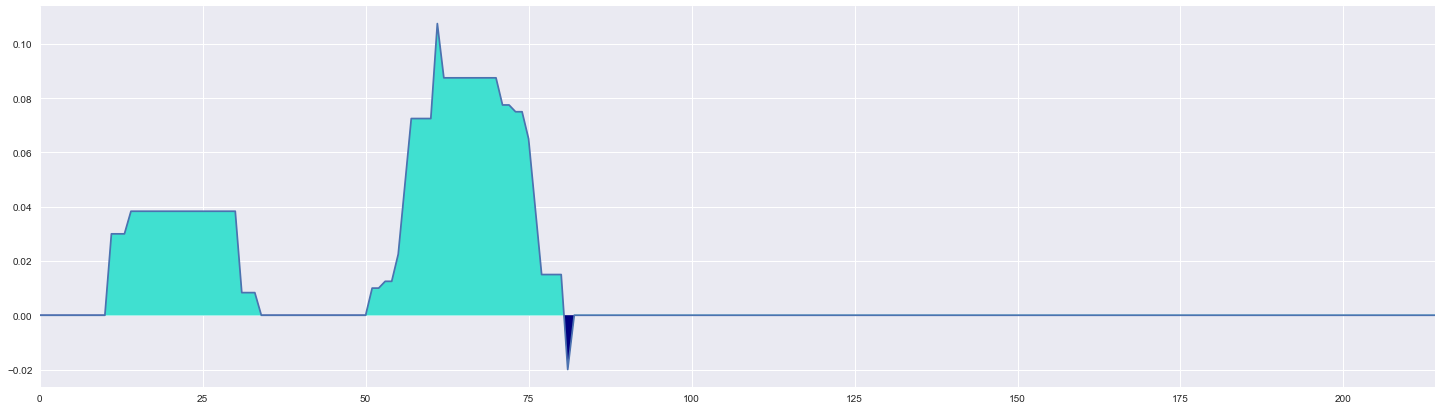

In [176]:
sentiment_runavg(Olenna_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='navy')

### Ramsay

In [177]:
RamsayS5 = season_five_sentiment.loc['Ramsay']

Ramsay_Sentiment_S5 = RamsayS5.values.tolist()

In [178]:
RamsayS6 =season_six_sentiment.loc['Ramsay']

Ramsay_Sentiment_S6 = RamsayS6.values.tolist()

In [179]:
Ramsay_Polarity_S5 = polarity(Ramsay_Sentiment_S5)
Ramsay_Polarity_S5

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.13636363636363635,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2857142857142857,
 0.0,
 0.13636363636363635,
 0.0,
 0.0,
 -0.5,
 0.0,
 1.0,
 0.3333333333333333,
 0.0,
 0.3333333333333333,
 0.0,
 0.0,
 0.10000000000000002,
 0.0,
 0.0,
 0.5,
 0.7,
 0.0,
 0.0,
 -0.6999999999999998,
 0.7,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [180]:
Ramsay_Polarity_S6 = polarity(Ramsay_Sentiment_S6)

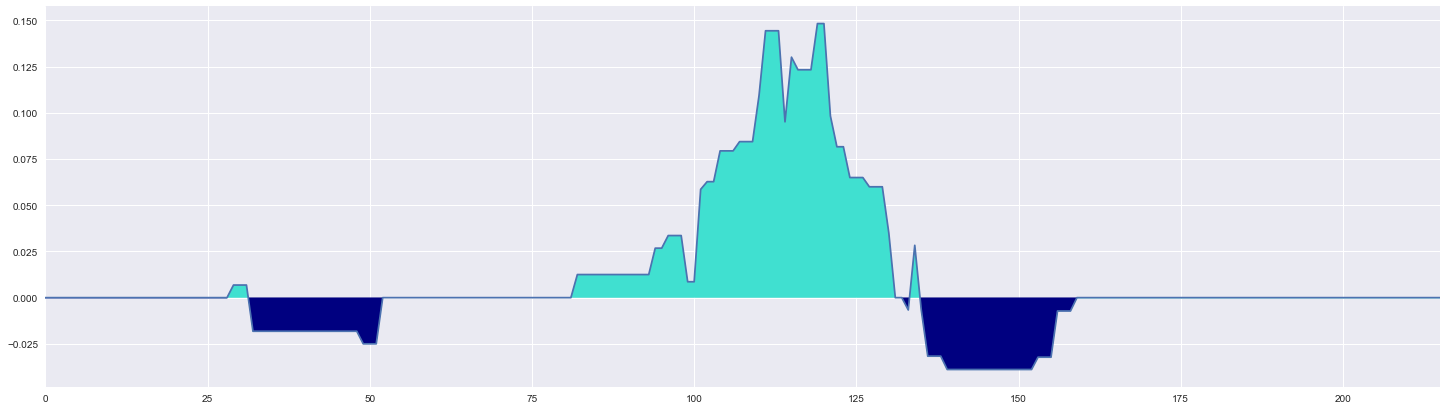

In [181]:
sentiment_runavg(Ramsay_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

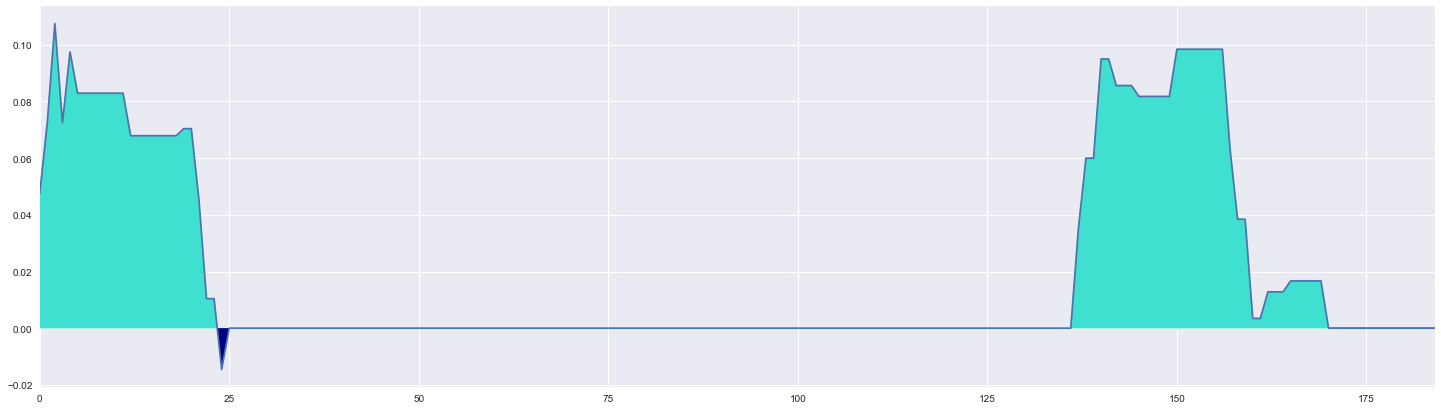

In [182]:
sentiment_runavg(Ramsay_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

### Robb

In [183]:
RobbS1 = season_one_sentiment.loc['Robb Stark']

Robb_Sentiment_S1 = RobbS1.values.tolist()

In [184]:
Robb_Polarity_S1 = polarity(Robb_Sentiment_S1)
Robb_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.2857142857142857,
 0.0,
 0.7,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,

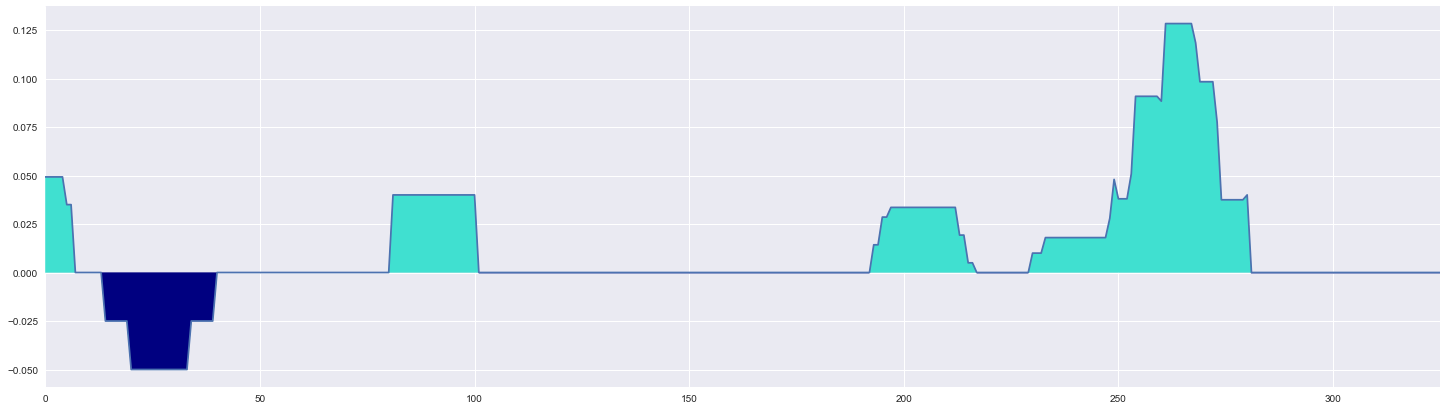

In [185]:
sentiment_runavg(Robb_Polarity_S1, runavg=20, color_pos='turquoise', color_neg='navy')

### Sam

In [186]:
SamS1 = season_one_sentiment.loc['Samwell Tarly']

Sam_Sentiment_S1 = SamS1.values.tolist()

In [187]:
SamS5 = season_five_sentiment.loc['Sam']

Sam_Sentiment_S5 = SamS5.values.tolist()

In [188]:
SamS6 = season_six_sentiment.loc['Sam']

Sam_Sentiment_S6 = SamS6.values.tolist()

In [189]:
SamS7 = season_seven_sentiment.loc['Sam']

Sam_Sentiment_S7 = SamS7.values.tolist()

In [190]:
Sam_Polarity_S1 = polarity(Sam_Sentiment_S1)
Sam_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2857142857142857,
 0.2857142857142857,
 0.16,
 0.0,
 0.5,
 -0.34375,
 -0.5,
 0.0,
 -0.2916666666666667,
 -0.3,
 0.0,
 0.0,
 0.7,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [191]:
Sam_Polarity_S5 = polarity(Sam_Sentiment_S5)

In [192]:
Sam_Polarity_S6 = polarity(Sam_Sentiment_S6)

In [193]:
Sam_Polarity_S7 = polarity(Sam_Sentiment_S7)

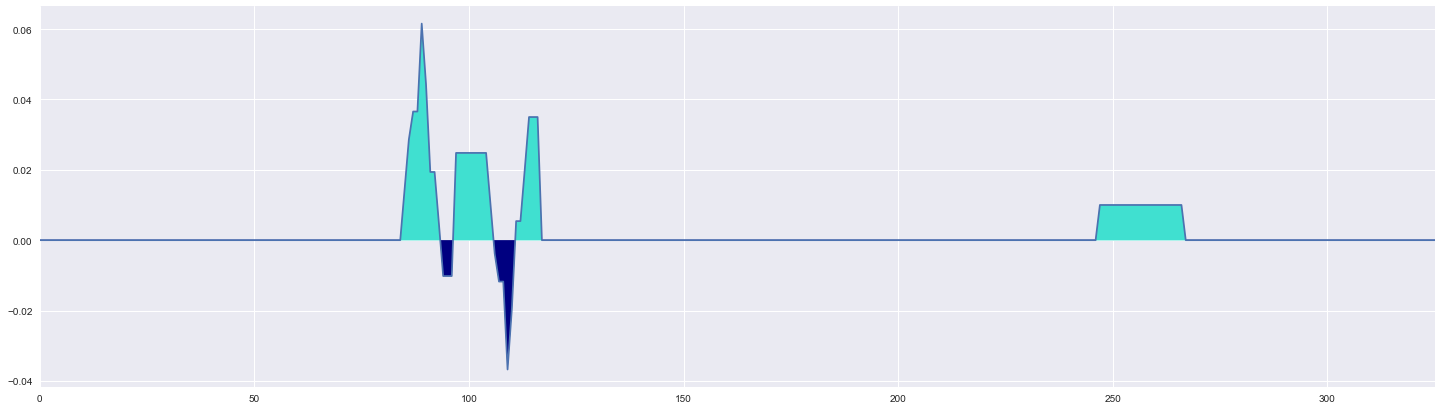

In [194]:
sentiment_runavg(Sam_Polarity_S1, runavg=20, color_pos='turquoise', color_neg='navy')

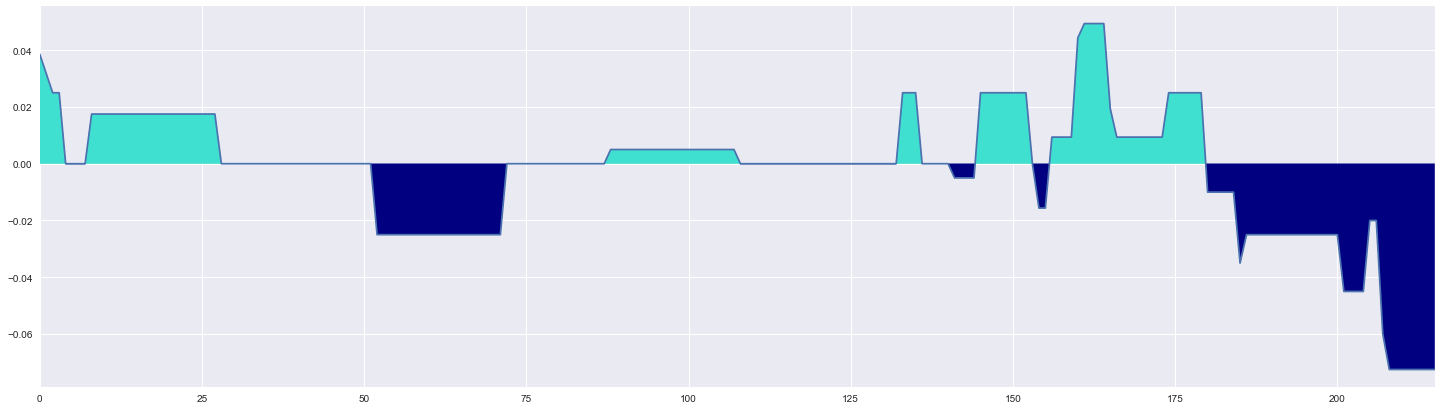

In [195]:
sentiment_runavg(Sam_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

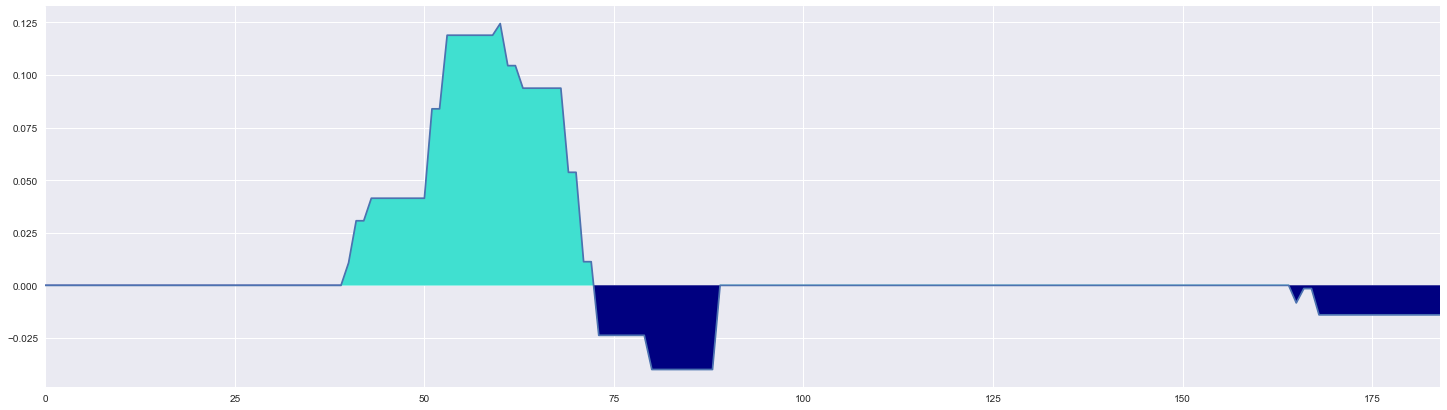

In [196]:
sentiment_runavg(Sam_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

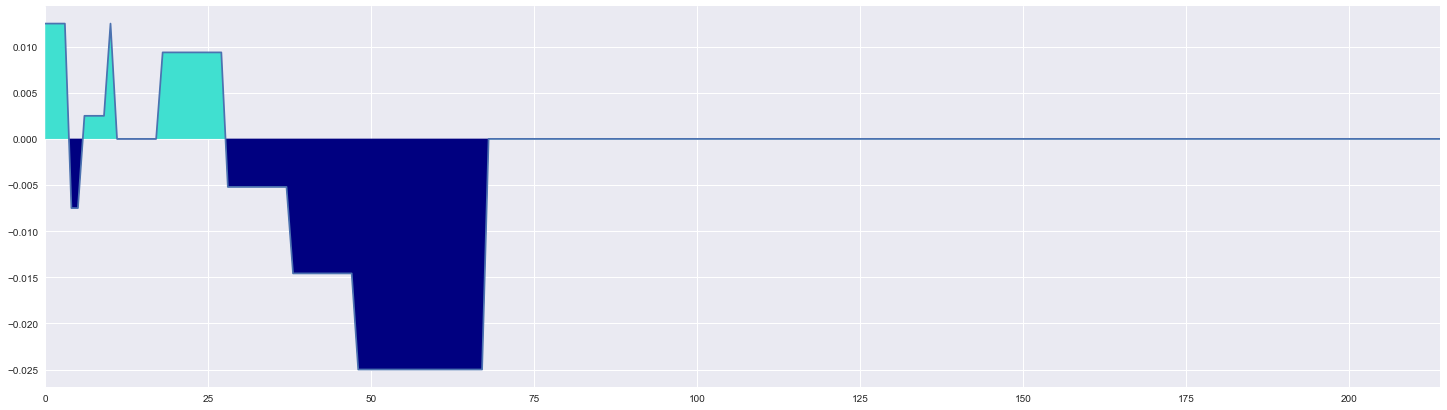

In [197]:
sentiment_runavg(Sam_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='navy')

### Sansa

In [198]:
SansaS1 = season_one_sentiment.loc['Sansa Stark']

Sansa_Sentiment_S1 = SansaS1.values.tolist()

In [199]:
SansaS5 = season_five_sentiment.loc['Sansa']

Sansa_Sentiment_S5 = SansaS5.values.tolist()

In [200]:
SansaS6 = season_six_sentiment.loc['Sansa']

Sansa_Sentiment_S6 = SansaS6.values.tolist()

In [201]:
SansaS7 = season_seven_sentiment.loc['Sansa']

Sansa_Sentiment_S7 = SansaS7.values.tolist()

In [202]:
Sansa_Polarity_S1 = polarity(Sansa_Sentiment_S1)
Sansa_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 -0.8,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.8,
 0.0,
 0.0,
 -1.0,
 -0.625,
 -0.2,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [203]:
Sansa_Polarity_S5 = polarity(Sansa_Sentiment_S5)

In [204]:
Sansa_Polarity_S6 = polarity(Sansa_Sentiment_S6)

In [205]:
Sansa_Polarity_S7 = polarity(Sansa_Sentiment_S7)

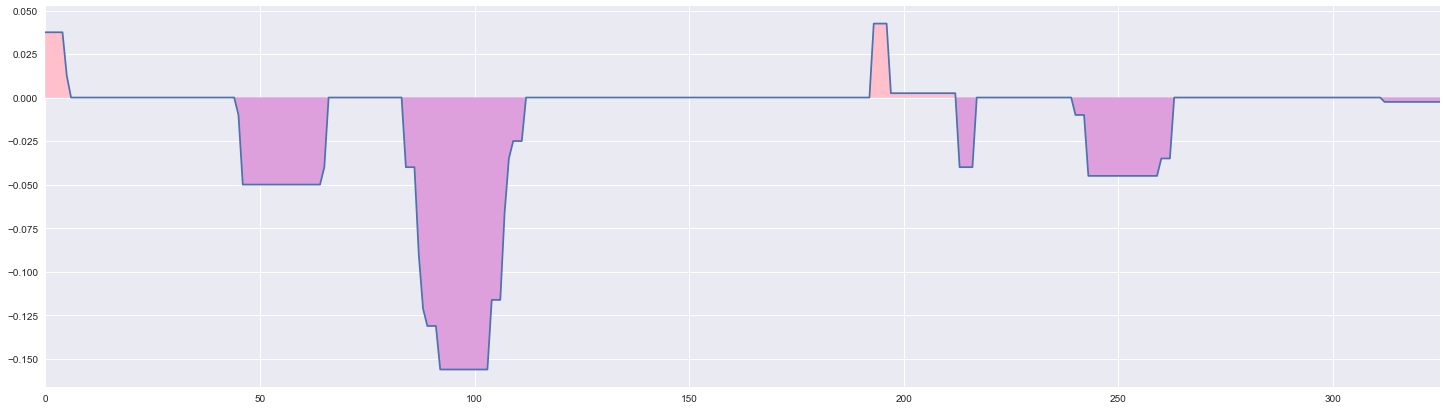

In [206]:
sentiment_runavg(Sansa_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')

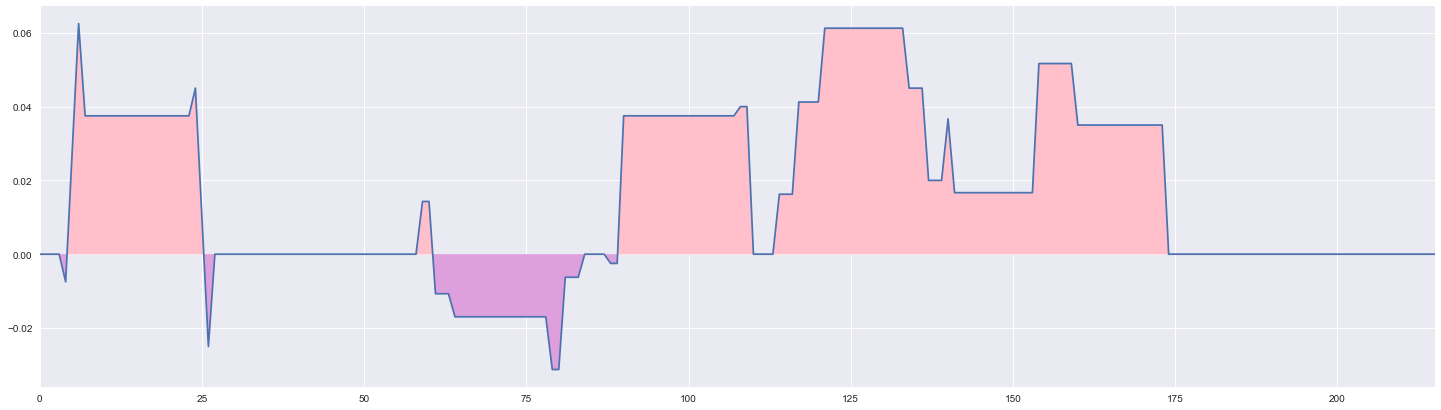

In [207]:
sentiment_runavg(Sansa_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')

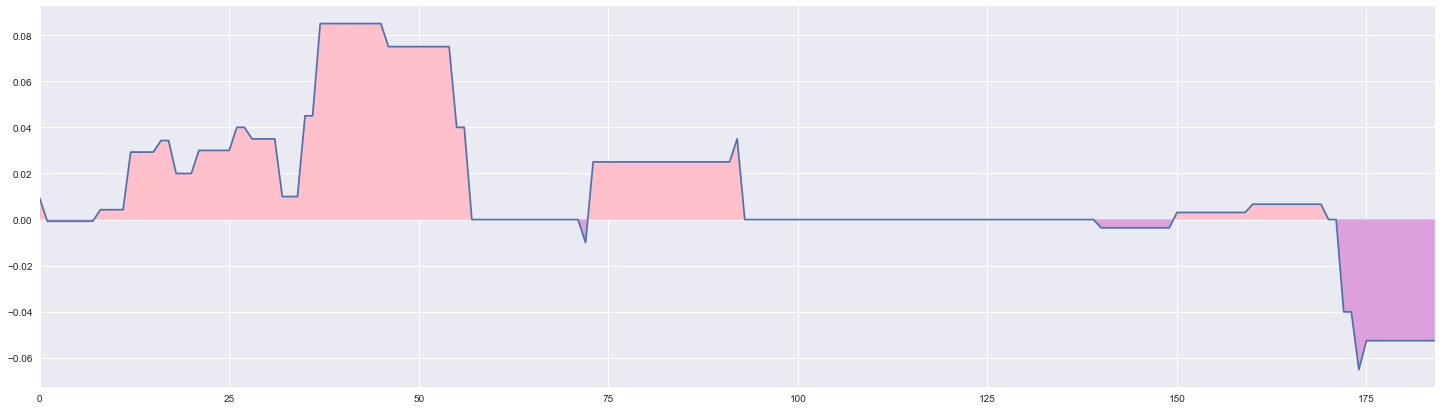

In [208]:
sentiment_runavg(Sansa_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')

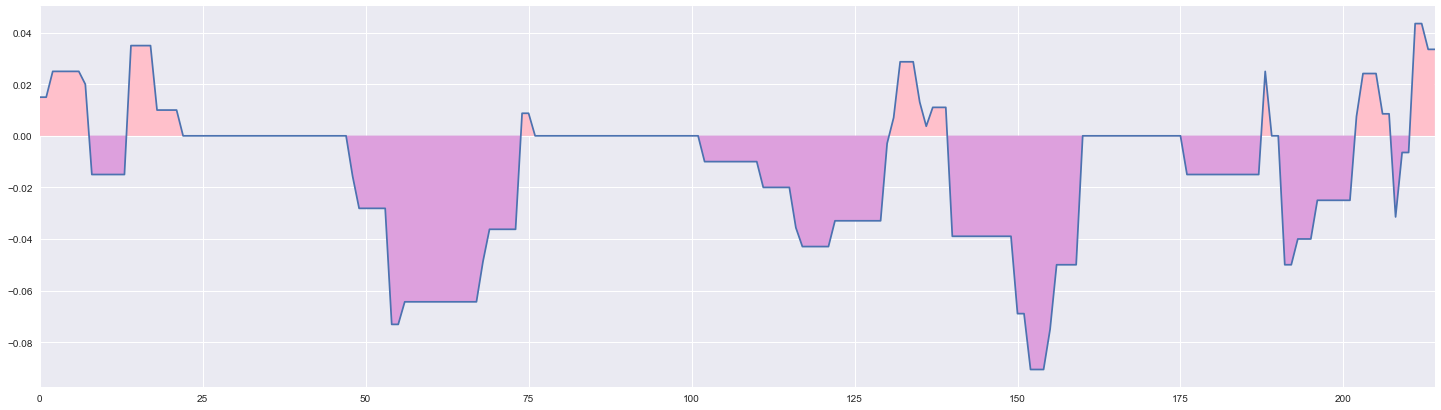

In [209]:
sentiment_runavg(Sansa_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')

### Shireen

In [210]:
ShireenS5 = season_five_sentiment.loc['Shireen']

Shireen_Sentiment_S5 = ShireenS5.values.tolist()

In [211]:
Shireen_Polarity_S5 = polarity(Shireen_Sentiment_S5)
Shireen_Polarity_S5

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4928571428571428,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

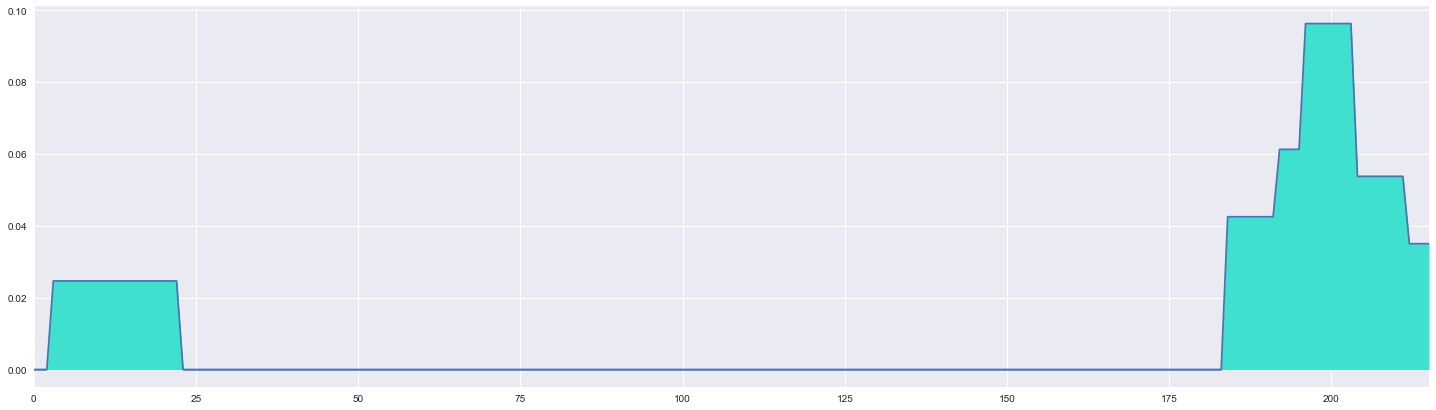

In [212]:
sentiment_runavg(Shireen_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

### Stannis

In [213]:
StannisS5 = season_five_sentiment.loc['Stannis']

Stannis_Sentiment_S5 = StannisS5.values.tolist()

In [214]:
Stannis_Polarity_S5 = polarity(Stannis_Sentiment_S5)
Stannis_Polarity_S5

[0.0,
 0.0,
 0.0,
 -0.5,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.13636363636363635,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.375,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.16666666666666669,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.16666666666666666,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.0,


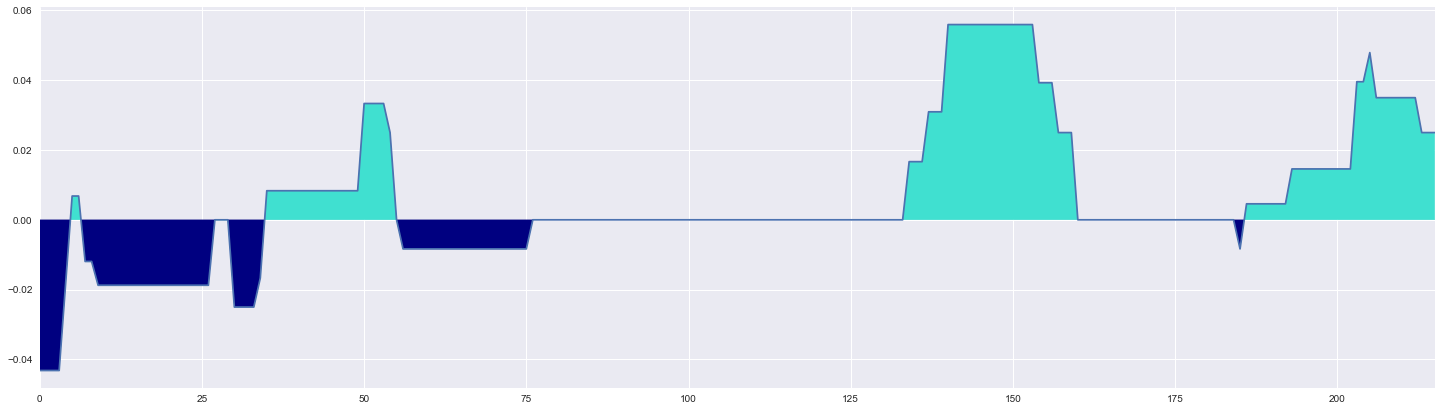

In [215]:
sentiment_runavg(Stannis_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

### Theon

In [216]:
TheonS1 = season_one_sentiment.loc['Theon Greyjoy']

Theon_Sentiment_S1 = TheonS1.values.tolist()

In [217]:
TheonS5 = season_five_sentiment.loc['Theon']

Theon_Sentiment_S5 = TheonS5.values.tolist()

In [218]:
TheonS6 = season_six_sentiment.loc['Theon']

Theon_Sentiment_S6 = TheonS6.values.tolist()

In [219]:
TheonS7 = season_seven_sentiment.loc['Theon']

Theon_Sentiment_S7 = TheonS7.values.tolist()

In [220]:
Theon_Polarity_S1 = polarity(Theon_Sentiment_S1)
Theon_Polarity_S1

[0.0,
 0.0,
 0.14285714285714285,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 -0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [221]:
Theon_Polarity_S5 = polarity(Theon_Sentiment_S5)

In [222]:
Theon_Polarity_S6 = polarity(Theon_Sentiment_S6)

In [223]:
Theon_Polarity_S7 = polarity(Theon_Sentiment_S7)

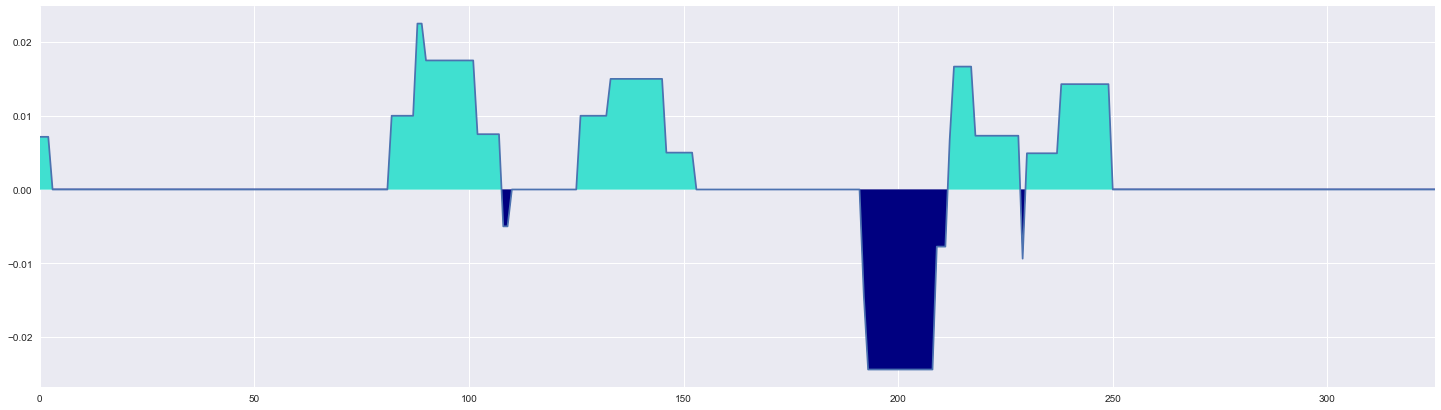

In [224]:
sentiment_runavg(Theon_Polarity_S1, runavg=20, color_pos='turquoise', color_neg='navy')

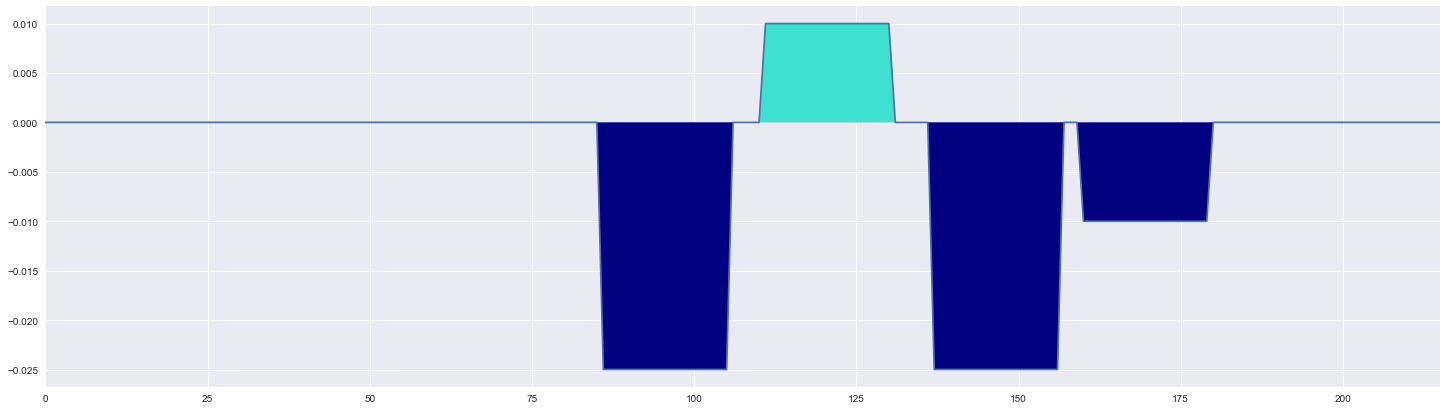

In [225]:
sentiment_runavg(Theon_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

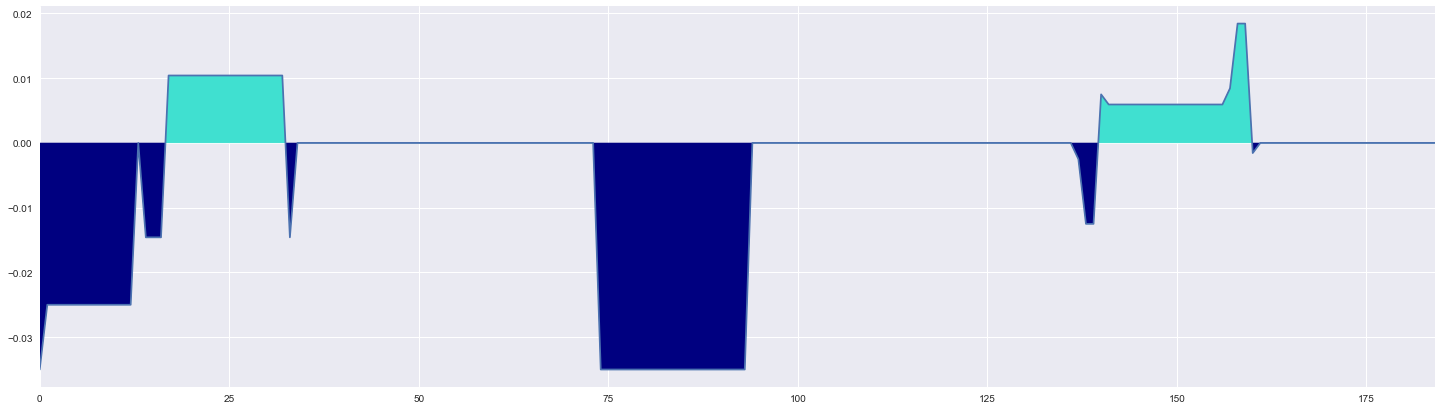

In [226]:
sentiment_runavg(Theon_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

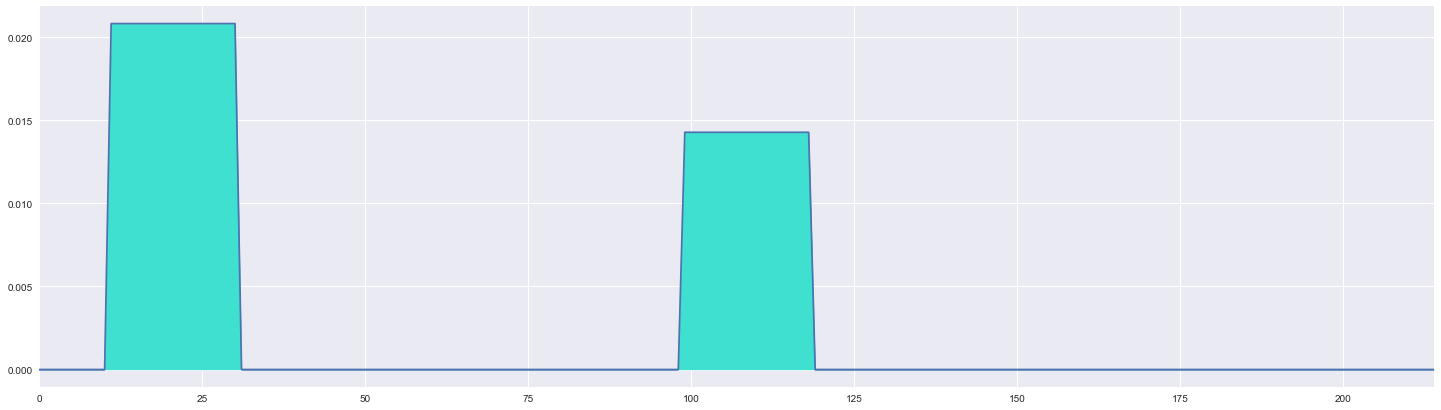

In [227]:
sentiment_runavg(Theon_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='navy')

### Tyrion

In [228]:
TyrionS1 = season_one_sentiment.loc['Tyrion Lannister']

Tyrion_Sentiment_S1 = TyrionS1.values.tolist()

In [229]:
TyrionS5 = season_five_sentiment.loc['Tyrion']

Tyrion_Sentiment_S5 = TyrionS5.values.tolist()

In [230]:
TyrionS6 = season_six_sentiment.loc['Tyrion']

Tyrion_Sentiment_S6 = TyrionS6.values.tolist()

In [231]:
TyrionS7 = season_seven_sentiment.loc['Tyrion']

Tyrion_Sentiment_S7 = TyrionS7.values.tolist()

In [232]:
Tyrion_Polarity_S1 = polarity(Tyrion_Sentiment_S1)
Tyrion_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 0.16666666666666666,
 0.0,
 -0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.7,
 0.05,
 0.13636363636363635,
 0.21428571428571427,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7,
 0.0,
 5.551115123125783e-17,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.125,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.05,
 0.0,
 -0.6,
 0.0,
 0.0,
 0.4375,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.21111111111111114,
 0.0,
 0.0,
 0.35,
 -0.1,
 0.6499999999999999,
 -0.30000000000000004,
 0.0,
 0.0,
 0.0,
 0.8,
 0.0,
 0.0,
 0.0,
 0.16666666666666666,
 0.0,
 0.4166666666666667,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [233]:
Tyrion_Polarity_S5 = polarity(Tyrion_Sentiment_S5)

In [234]:
Tyrion_Polarity_S6 = polarity(Tyrion_Sentiment_S6)

In [235]:
Tyrion_Polarity_S7 = polarity(Tyrion_Sentiment_S7)

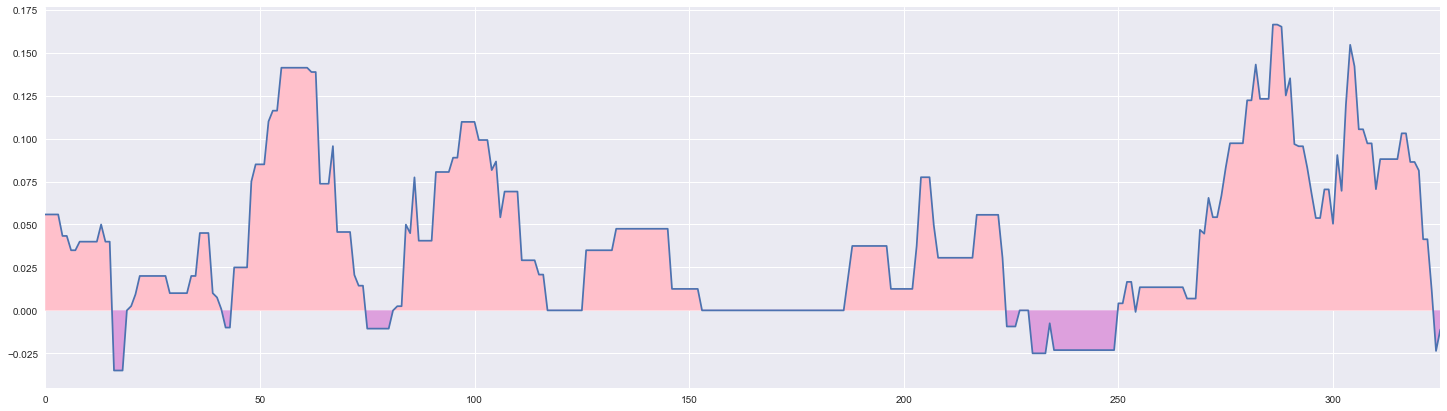

In [236]:
sentiment_runavg(Tyrion_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')

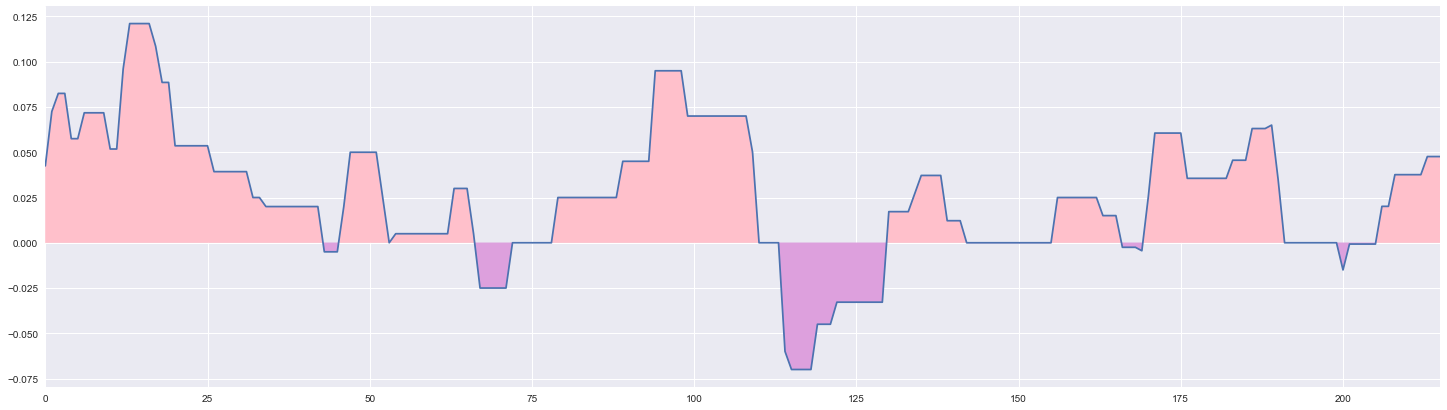

In [237]:
sentiment_runavg(Tyrion_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')

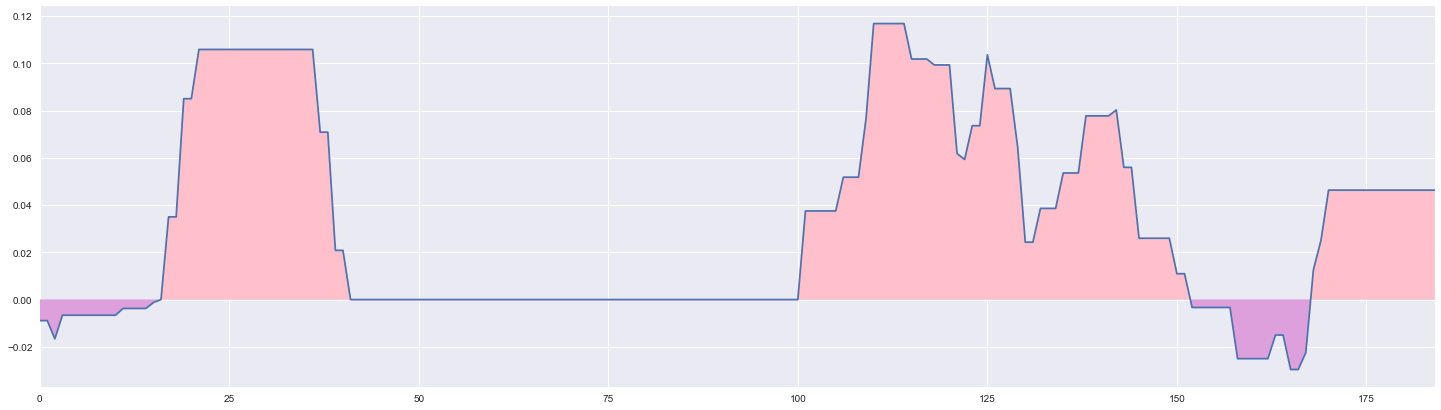

In [238]:
sentiment_runavg(Tyrion_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')

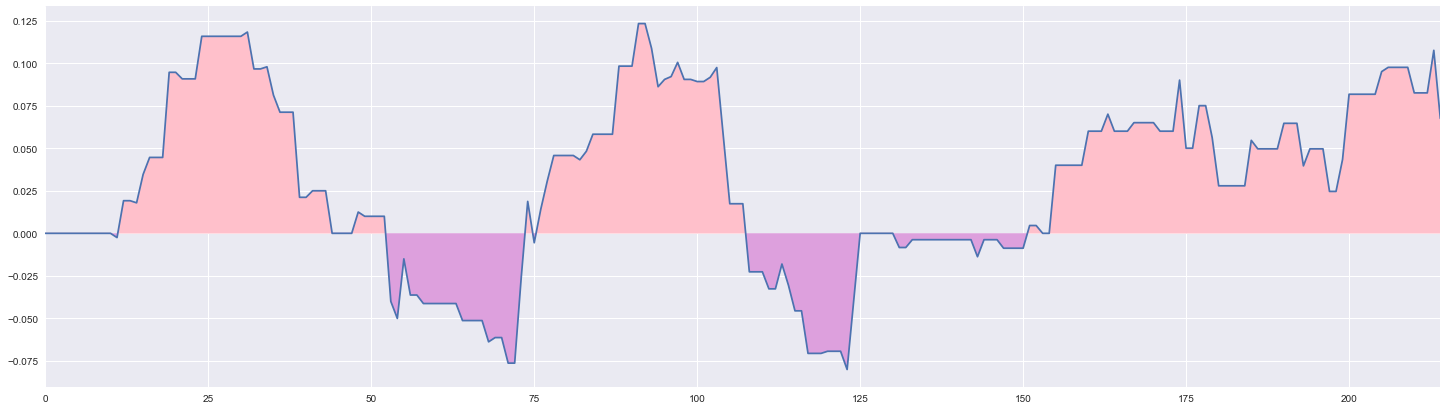

In [239]:
sentiment_runavg(Tyrion_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')

### Tywin

In [240]:
TywinS1 = season_one_sentiment.loc['Tywin Lannister']

Tywin_Sentiment_S1 = TywinS1.values.tolist()

In [241]:
Tywin_Polarity_S1 = polarity(Tywin_Sentiment_S1)
Tywin_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

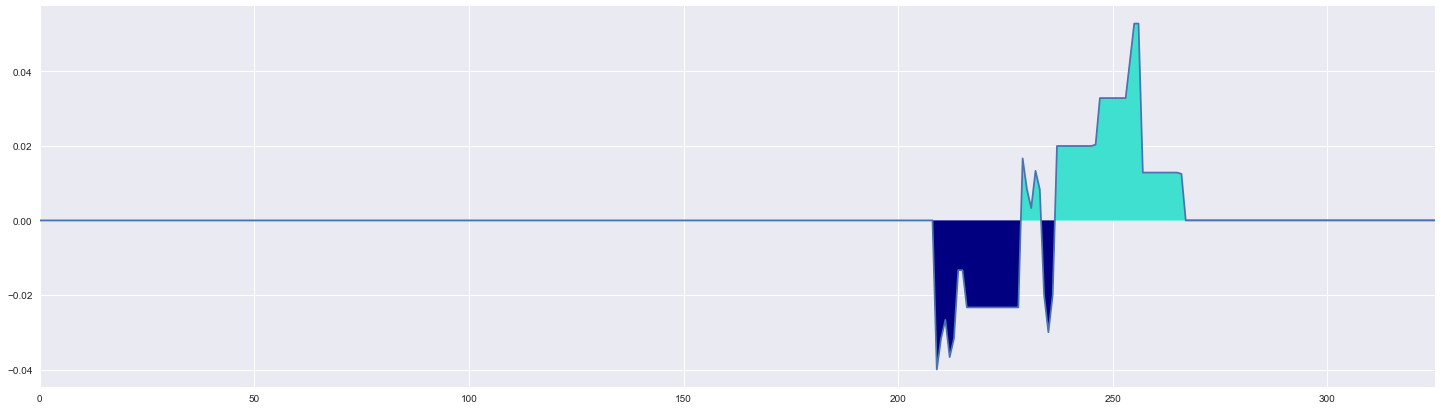

In [242]:
sentiment_runavg(Tywin_Polarity_S1, runavg=20, color_pos='turquoise', color_neg='navy')

### Varys

In [243]:
VarysS1 = season_one_sentiment.loc['Varys']

Varys_Sentiment_S1 = VarysS1.values.tolist()

In [244]:
VarysS5 = season_five_sentiment.loc['Varys']

Varys_Sentiment_S5 = VarysS5.values.tolist()

In [245]:
VarysS6 = season_six_sentiment.loc['Varys']

Varys_Sentiment_S6 = VarysS6.values.tolist()

In [246]:
VarysS7 = season_seven_sentiment.loc['Varys']

Varys_Sentiment_S7 = VarysS7.values.tolist()

In [247]:
Varys_Polarity_S1 = polarity(Varys_Sentiment_S1)
Varys_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.5,
 -0.2,
 -0.2,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4,
 0.0,
 -0.5,
 0.0,
 -0.2,
 0.0,
 0.0,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 -0.1619047619047619,

In [248]:
Varys_Polarity_S5 = polarity(Varys_Sentiment_S5)

In [249]:
Varys_Polarity_S6 = polarity(Varys_Sentiment_S6)

In [250]:
Varys_Polarity_S7 = polarity(Varys_Sentiment_S7)

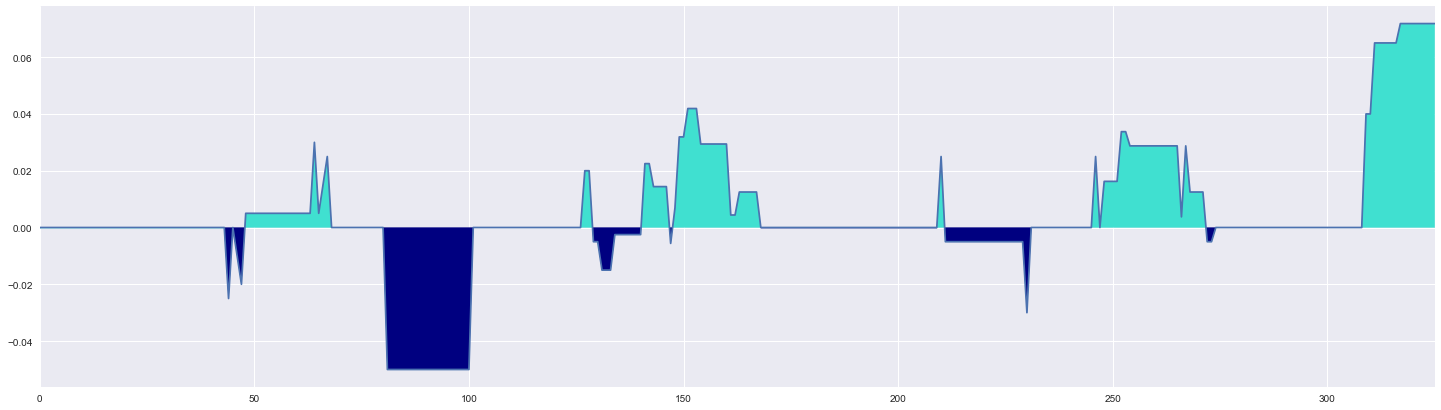

In [251]:
sentiment_runavg(Varys_Polarity_S1, runavg=20, color_pos='turquoise', color_neg='navy')

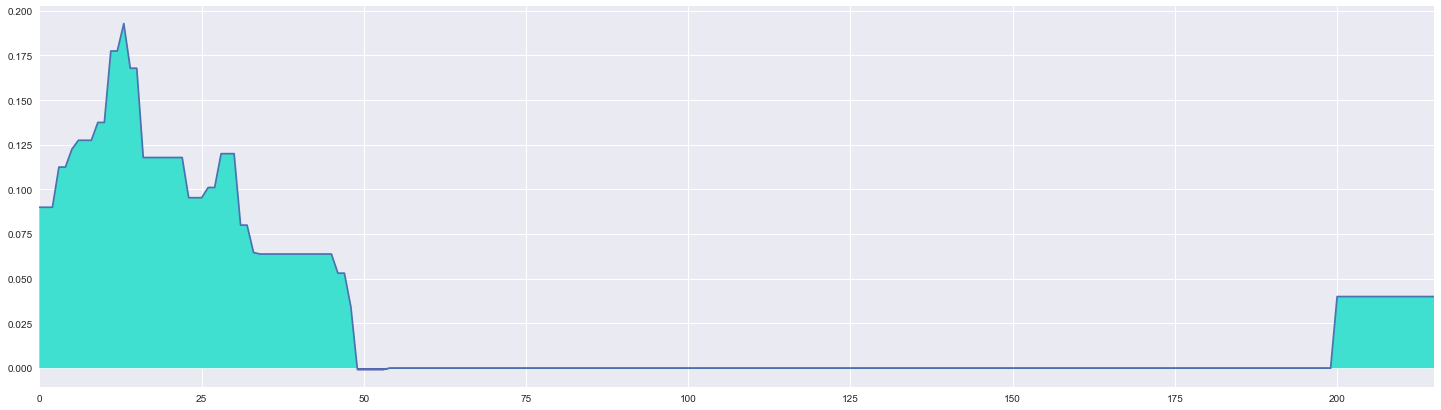

In [252]:
sentiment_runavg(Varys_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

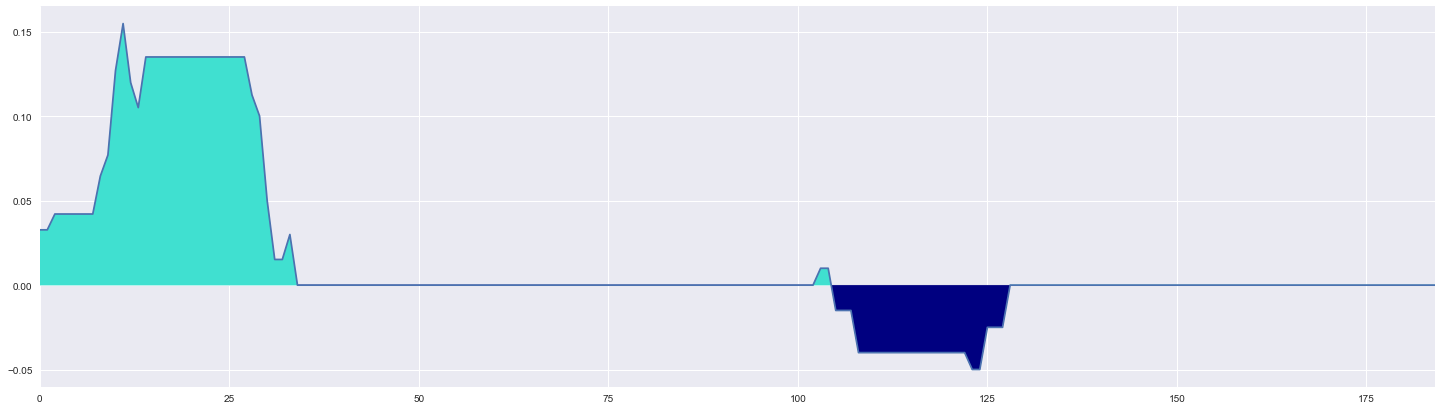

In [253]:
sentiment_runavg(Varys_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

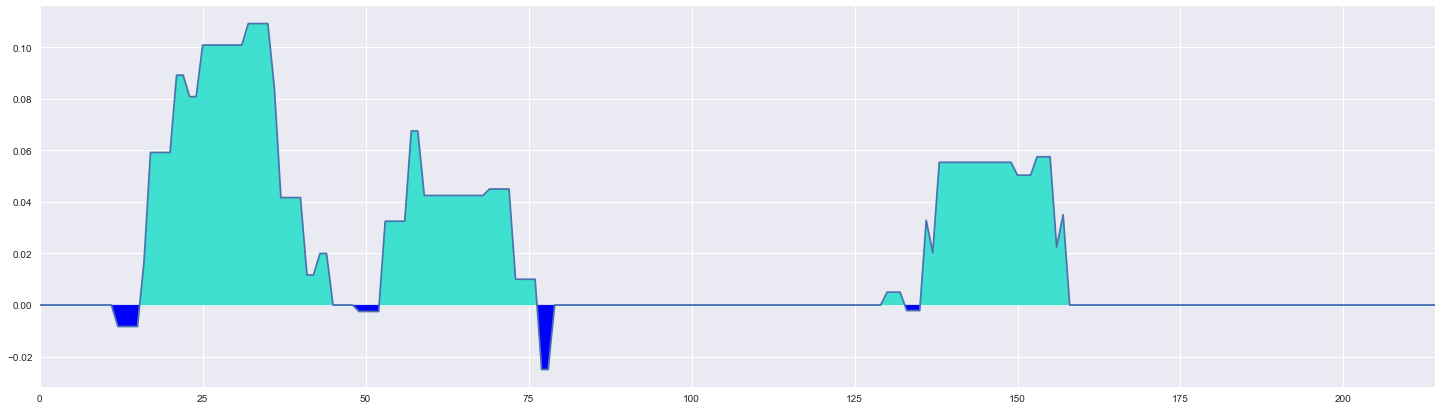

In [254]:
sentiment_runavg(Varys_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='blue')

### Yara

In [255]:
YaraS6 = season_six_sentiment.loc['Yara']

Yara_Sentiment_S6 = YaraS6.values.tolist()

In [256]:
YaraS7 = season_seven_sentiment.loc['Yara']

Yara_Sentiment_S7 = YaraS7.values.tolist()

In [257]:
Yara_Polarity_S6 = polarity(Yara_Sentiment_S6)

In [258]:
Yara_Polarity_S7 = polarity(Yara_Sentiment_S7)

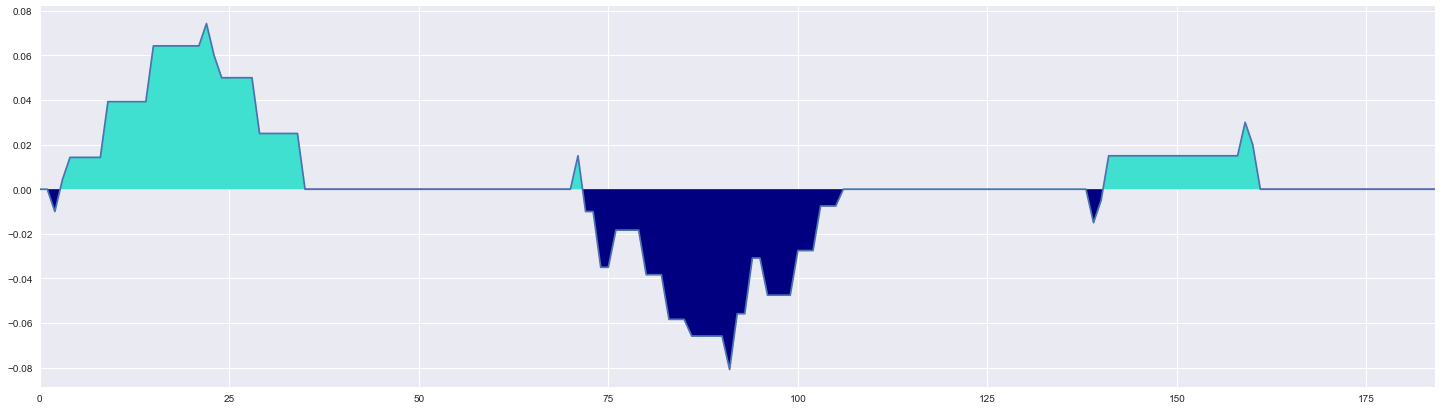

In [259]:
sentiment_runavg(Yara_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

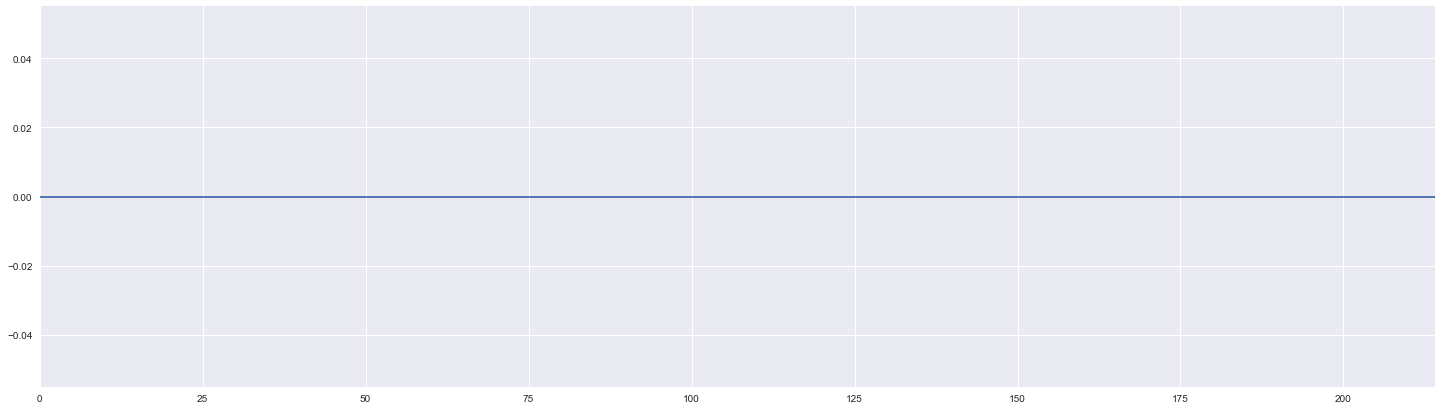

In [260]:
sentiment_runavg(Yara_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='navy')

## Word2Vec by Character and by Season

In [261]:
season_one.head()

0                      1    \
Arya Stark                       arya  thats jaime lannister   
Assassin                            0                      0   
Benjen Stark                 dead yet             got bigger   
Bran Stark     true saw white walkers                  lying   
Catelyn Stark          gods grow fast        many times told   

                                          2              3    \
Arya Stark                                  0              0   
Assassin                                    0              0   
Benjen Stark   well youre always welcome wall        jon jon   
Bran Stark                                 go  please father   
Catelyn Stark                    want promise      dyou know   

                                    4                            5    \
Arya Stark                            0                            0   
Assassin                              0                            0   
Benjen Stark   wall isnt going anywhere  dont understand youd giving   
Bran Stark                     saw king             hes coming right   
Catelyn Stark      always look feet lie                  wheres arya   

                            6                     7    \
Arya Stark                    0                     0   
Assassin                      0                     0   
Benjen Stark   might knew meant  feast like bear trap   
Bran Stark                                       come   
Catelyn Stark             grace                 queen   

                                       8                  9               10   \
Arya Stark                               0                  0               0   
Assassin                                 0                  0               0   
Benjen Stark                        course  two still missing           maybe   
Bran Stark                             ten                  0               0   
Catelyn Stark  stupidest prince ever lived               hush  hed leave home   

                       11                          12    13             14   \
Arya Stark               0                           0     0              0   
Assassin                 0                           0     0              0   
Benjen Stark      robb boy                           0     0              0   
Bran Stark               0                           0     0              0   
Catelyn Stark  sansa sansa  im sure grim kings landing  hear  wont let take   

                                                          15   \
Arya Stark                                                  0   
Assassin                                                    0   
Benjen Stark                                                0   
Bran Stark                                                  0   
Catelyn Stark  ill say listen fat man taking husband anywhere   

                                   16          17                 18   \
Arya Stark                           0           0                  0   
Assassin                             0           0                  0   
Benjen Stark                         0           0                  0   
Bran Stark                           0           0                  0   
Catelyn Stark  stops eating time drink  sent eyrie  shes fled capital   

                                                             19   \
Arya Stark                                                     0   
Assassin                                                       0   
Benjen Stark                                                   0   
Bran Stark                                                     0   
Catelyn Stark  lysas head would spike right wrong people foun...   

                              20                                     21  22   \
Arya Stark                      0                                      0   0   
Assassin                        0                                      0   0   
Benjen Stark                    0              

In [262]:
season_five.head()

0         1   2   3   4   5   6   7   8   9   10   \
Aemon                       0         0   0   0   0   0   0   0   0   0   0   
Alliser    men need firm hand  soldiers   0   0   0   0   0   0   0   0   0   
Announcer                   0         0   0   0   0   0   0   0   0   0   0   
Areo                        0         0   0   0   0   0   0   0   0   0   0   
Arya                        0         0   0   0   0   0   0   0   0   0   0   

          11  12  13  14  15  16  17  18  19  20  21   \
Aemon       0   0   0   0   0   0   0   0   0   0   0   
Alliser     0   0   0   0   0   0   0   0   0   0   0   
Announcer   0   0   0   0   0   0   0   0   0   0   0   
Areo        0   0   0   0   0   0   0   0   0   0   0   
Arya        0   0   0   0   0   0   0   0   0   0   0   

                                                         22              23   \
Aemon      anyone wish speak candidates cast tokens th lo...     anyone else   
Alliser                                           cant argue               0   
Announcer                                                  0               0   
Areo                                   prince wish disturbed               0   
Arya                                              hes statue  thank bringing   

                                    24             25                26   \
Aemon      theres one else begin voting  samwell tarly              time   
Alliser                               0              0                 0   
Announcer                             0              0                 0   
Areo                                  0              0                 0   
Arya                     valar dohaeris          hello  jaqen hghar gave   

              27    28                29    30  31  32  33  34  35  36  37   \
Aemon           0     0                 0     0   0   0   0   0   0   0   0   
Alliser         0     0                 0     0   0   0   0   0   0   0   0   
Announcer       0     0                 0     0   0   0   0   0   0   0   0   
Areo            0     0                 0     0   0   0   0   0   0   0   0   
Arya       please  wait  said jaqen hghar  well   0   0   0   0   0   0   0   

          38  39  40  41  42  43  44                       45   \
Aemon       0   0   0   0   0   0   0                        0   
Alliser     0   0   0   0   0   0   0                        0   
Announcer   0   0   0   0   0   0   0                        0   
Areo        0   0   0   0   0   0   0                        0   
Arya        0   0   0   0   0   0   0  ive sweeping floor days   

                               46                     47          48   \
Aemon                            0                      0           0   
Alliser                          0                      0           0   
Announcer                        0                      0           0   
Areo                             0                      0           0   
Arya       didnt come sweep floors  said could apprentice  want serve   

                         49      50  51            52  53                54   \
Aemon                      0       0   0             0   0                 0   
Alliser                    0       0   0             0   0                 0   
Announcer                  0       0   0             0   0                 0   
Areo                       0       0   0             0   0                 0   
Arya       one manyfaced god  taking      moment perks  ow  told im gets hit   

                  55      56  57  58  59  60  61  62  63  64  65  66  67  68   \
Aemon               0       0   0   0   0   0   0   0   0   0   0   0   0   0   
Alliser             0       0   0   0   0   0   0   0   0   0   0   0   0   0   
Announcer           0       0   0   0   0   0   0   0   0   0   0   0   0   0   
Areo                0       0   0   0   0   0   0   0   0   0   0   0   0   0   
Arya       youre find  stands   0   0   0   0   0   0   0   0   0   0   0

In [263]:
season_six.head()

0               1    \
Aeron                                                  0               0   
Aeron                                                  0               0   
All                                                    0               0   
Alliser Thorne  know youre jon snow dead nights watchman  alliser thorne   
Arthur                                                 0               0   

                        2    \
Aeron                     0   
Aeron                     0   
All                       0   
Alliser Thorne  youre right   
Arthur                    0   

                                                              3    \
Aeron                                                           0   
Aeron                                                           0   
All                                                             0   
Alliser Thorne  weve committed treason us jon snow lord comman...   
Arthur                                                          0   

                                                         4   5    \
Aeron                                                      0   0   
Aeron                                                      0   0   
All                                                        0   0   
Alliser Thorne  ser davos cause fight anointed knights davos   0   
Arthur                                                     0   0   

                          6   7   8   9                     10   \
Aeron                       0   0   0   0                     0   
Aeron                       0   0   0   0                     0   
All                         0   0   0   0                     0   
Alliser Thorne  fight cowards   0   0   0                     0   
Arthur                      0   0   0   0  prince wanted us ned   

                                               11             12   \
Aeron                                            0              0   
Aeron                                            0              0   
All                                              0              0   
Alliser Thorne                                   0              0   
Arthur          wish good fortune wars come arthur  better qyburn   

                             13  14  15  16  17  18  19  20  21  22  23  24   \
Aeron                          0   0   0   0   0   0   0   0   0   0   0   0   
Aeron                          0   0   0   0   0   0   0   0   0   0   0   0   
All                            0   0   0   0   0   0   0   0   0   0   0   0   
Alliser Thorne                 0   0   0   0   0   0   0   0   0   0   0   0   
Arthur          ones seen qyburn   0   0   0   0   0   0   0   0   0   0   0   

               25  26                          27                        28   \
Aeron            0   0                listen waves                         0   
Aeron            0   0  speak presence drowned god  let fish eat scales eyes   
All              0   0                         aye                       aye   
Alliser Thorne   0   0                           0                         0   
Arthur           0   0                           0                         0   

                                                     29                  30   \
Aeron                                                  0                   0   
Aeron           dead may never die rises harder stronger  dead may never die   
All                                                  aye                 aye   
Alliser Thorne                                         0                   0   
Arthur                                                 0                   0   

                             31   32   33                  34  35  36  37   \
Aeron                          0    0    0                   0   0   0   0   
Aeron           stole best ships    0    0                   0   0   0   0   
All                          aye  aye  aye  dead may never die   0   0   0   
Alliser Thor

In [264]:
season_seven.head()

0                  1    \
All                                stand together                aye   
Arya     people ask happened tell north remembers  thats pretty song   
Baelish        ive heard beat hound single combat         want happy   
Benjen                                          0                  0   
Beric           seems like good place spend night     seems deserted   

                          2                       3              4    \
All                         0                       0              0   
Arya     dont want steal food           kings landing            bad   
Baelish                 happy                    lady           lady   
Benjen                      0                       0              0   
Beric             think ended  girl died fathers arms  doesnt matter   

                5              6                    7               8    \
All               0              0                    0               0   
Arya     riverlands     oh couldnt  youre long way home        boy girl   
Baelish           0              0                    0               0   
Benjen            0              0                    0               0   
Beric           aye  thank clegane          youre right  think dont ask   

               9                10                   11               12  13   \
All              0                0                    0                0   0   
Arya                    really good  im going kill queen                0   0   
Baelish          0                0                    0                0   0   
Benjen           0                0                    0                0   0   
Beric    dont know  dont know wants                  aye  believe clegane   0   

        14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29   \
All       0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Arya      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Baelish   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Benjen    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Beric     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

                   30       31          32        33     34       35   \
All                  0        0           0         0      0        0   
Arya     hello hot pie      mmm       didnt  big lady  found  got ale   
Baelish     sorry died  forgive  even thank         0      0        0   
Benjen               0        0           0         0      0        0   
Beric                0        0           0         0      0        0   

                   36                   37   38            39        40  41   \
All                  0                    0    0             0         0   0   
Arya     kings landing  heard cerseis queen  hmm  cersei would  would go       
Baelish              0                    0    0             0         0   0   
Benjen               0                    0    0             0         0   0   
Beric                0                    0    0             0         0   0   

                 42          43      44                 45            46   \
All                0           0       0                  0             0   
Arya     youre lying  thanks pie  thanks  take care hot pie  nymeria arya   
Baelish            0           0       0                  0             0   
Benjen             0           0       0                  0             0   
Beric              0           0       0                  0             0   

          47     48  49  50  51  52  53  54  55  56  57  58  59  60  61  62   \
All         0      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Arya     come  thats   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Baelish     0      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Benjen      0      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Beric   

In [265]:
# Getting Character Dialogue into String Format

def text(character):
    character_text = []
    for word in character:
        if len(word)>=1:
            if word != '0':
                character_text.append(word)
    return character_text

def string(character_word):
    character_string = []
    for words in character_word:
        character_string.append(' '.join(character_word))
    return character_string     

### Arya 

In [266]:
AryaS1 = season_one.loc['Arya Stark']
AryaS1_Text = AryaS1.values.tolist()

AryaS1_Words = text(AryaS1_Text)
AryaS1_String = string(AryaS1_Words) 

In [267]:
AryaS5 = season_five.loc['Arya']
AryaS5_Text = AryaS5.values.tolist()

AryaS5_Words = text(AryaS5_Text)
AryaS5_String = string(AryaS5_Words) 

In [268]:
AryaS6 = season_six.loc['Arya']
AryaS6_Text = AryaS6.values.tolist()

AryaS6_Words = text(AryaS6_Text)
AryaS6_String = string(AryaS6_Words) 

In [269]:
AryaS7 = season_seven.loc['Arya']
AryaS7_Text = AryaS7.values.tolist()

AryaS7_Words = text(AryaS7_Text)
AryaS7_String = string(AryaS7_Words) 

In [270]:
Arya_Words_Total = AryaS1_String + AryaS5_String + AryaS6_String + AryaS7_String

### Baelish

In [271]:
BaelishS1 = season_one.loc['Petyr Baelish']
BaelishS1_Text = BaelishS1.values.tolist()

BaelishS1_Words = text(BaelishS1_Text)
BaelishS1_String = string(BaelishS1_Words) 

In [272]:
BaelishS5 = season_five.loc['Baelish']
BaelishS5_Text = BaelishS5.values.tolist()

BaelishS5_Words = text(BaelishS5_Text)
BaelishS5_String = string(BaelishS5_Words) 

In [273]:
BaelishS6 = season_six.loc['Littlefinger']
BaelishS6_Text = BaelishS6.values.tolist()

BaelishS6_Words = text(BaelishS6_Text)
BaelishS6_String = string(BaelishS6_Words) 

In [274]:
BaelishS7 = season_seven.loc['Baelish']
BaelishS7_Text = BaelishS7.values.tolist()

BaelishS7_Words = text(BaelishS7_Text)
BaelishS7_String = string(BaelishS7_Words) 

In [275]:
Baelish_Words_Total = BaelishS1_String + BaelishS5_String + BaelishS6_String + BaelishS7_String

### Brienne

In [276]:
BrienneS5 = season_five.loc['Brienne']
BrienneS5_Text = BrienneS5.values.tolist()

BrienneS5_Words = text(BrienneS5_Text)
BrienneS5_String = string(BrienneS5_Words) 

In [277]:
BrienneS6 = season_six.loc['Brienne']
BrienneS6_Text = BrienneS6.values.tolist()

BrienneS6_Words = text(BrienneS6_Text)
BrienneS6_String = string(BrienneS6_Words) 

In [278]:
BrienneS7 = season_seven.loc['Brienne']
BrienneS7_Text = BrienneS7.values.tolist()

BrienneS7_Words = text(BrienneS7_Text)
BrienneS7_String = string(BrienneS7_Words) 

In [279]:
Brienne_Words_Total = BrienneS5_String + BrienneS6_String + BrienneS7_String

### Catelyn

In [280]:
CatelynS1 = season_one.loc['Catelyn Stark']
CatelynS1_Text = CatelynS1.values.tolist()

CatelynS1_Words = text(CatelynS1_Text)
CatelynS1_String = string(CatelynS1_Words) 

In [281]:
Catelyn_Words_Total = CatelynS1_String

### Cersei

In [282]:
CerseiS1 = season_one.loc['Cersei Baratheon']
CerseiS1_Text = CerseiS1.values.tolist()

CerseiS1_Words = text(CerseiS1_Text)
CerseiS1_String = string(CerseiS1_Words) 

In [283]:
CerseiS5 = season_five.loc['Cersei']
CerseiS5_Text = CerseiS5.values.tolist()

CerseiS5_Words = text(CerseiS5_Text)
CerseiS5_String = string(CerseiS5_Words) 

In [284]:
CerseiS6 = season_six.loc['Cersei']
CerseiS6_Text = CerseiS6.values.tolist()

CerseiS6_Words = text(CerseiS6_Text)
CerseiS6_String = string(CerseiS6_Words) 

In [285]:
CerseiS7 = season_seven.loc['Cersei']
CerseiS7_Text = CerseiS7.values.tolist()

CerseiS7_Words = text(CerseiS7_Text)
CerseiS7_String = string(CerseiS7_Words) 

In [286]:
Cersei_Words_Total = CerseiS1_String + CerseiS5_String + CerseiS6_String + CerseiS7_String

### Daenerys

In [287]:
DaenerysS1 = season_one.loc['Daenerys Targaryen']
DaenerysS1_Text = DaenerysS1.values.tolist()

DaenerysS1_Words = text(DaenerysS1_Text)
DaenerysS1_String = string(DaenerysS1_Words) 

In [288]:
DaenerysS5 = season_five.loc['Daenerys']
DaenerysS5_Text = DaenerysS5.values.tolist()

DaenerysS5_Words = text(DaenerysS5_Text)
DaenerysS5_String = string(DaenerysS5_Words) 

In [289]:
DaenerysS6 = season_six.loc['Daenerys']
DaenerysS6_Text = DaenerysS6.values.tolist()

DaenerysS6_Words = text(DaenerysS6_Text)
DaenerysS6_String = string(DaenerysS6_Words) 

In [290]:
DaenerysS7 = season_seven.loc['Daenerys']
DaenerysS7_Text = DaenerysS7.values.tolist()

DaenerysS7_Words = text(DaenerysS7_Text)
DaenerysS7_String = string(DaenerysS7_Words) 

In [291]:
Daenerys_Words_Total = DaenerysS1_String + DaenerysS5_String + DaenerysS6_String + DaenerysS7_String

### Davos

In [292]:
DavosS5 = season_five.loc['Davos']
DavosS5_Text = DavosS5.values.tolist()

DavosS5_Words = text(DavosS5_Text)
DavosS5_String = string(DavosS5_Words) 

In [293]:
DavosS6 = season_six.loc['Davos']
DavosS6_Text = DavosS6.values.tolist()

DavosS6_Words = text(DavosS6_Text)
DavosS6_String = string(DavosS6_Words) 

In [294]:
DavosS7 = season_seven.loc['Davos']
DavosS7_Text = DavosS7.values.tolist()

DavosS7_Words = text(DavosS7_Text)
DavosS7_String = string(DavosS7_Words) 

In [295]:
Davos_Words_Total = DavosS5_String + DavosS6_String + DavosS7_String

### Eddard

In [296]:
EddardS1 = season_one.loc['Eddard Stark']
EddardS1_Text = EddardS1.values.tolist()

EddardS1_Words = text(EddardS1_Text)
EddardS1_String = string(EddardS1_Words) 

In [297]:
Eddard_Words_Total = EddardS1_String

### Gilly

In [298]:
GillyS5 = season_five.loc['Gilly']
GillyS5_Text = GillyS5.values.tolist()

GillyS5_Words = text(GillyS5_Text)
GillyS5_String = string(GillyS5_Words) 

In [299]:
GillyS6 = season_six.loc['Gilly']
GillyS6_Text = GillyS6.values.tolist()

GillyS6_Words = text(GillyS6_Text)
GillyS6_String = string(GillyS6_Words) 

In [300]:
GillyS7 = season_seven.loc['Gilly']
GillyS7_Text = GillyS7.values.tolist()

GillyS7_Words = text(GillyS7_Text)
GillyS7_String = string(GillyS7_Words) 

In [301]:
Gilly_Words_Total = GillyS5_String + GillyS6_String + GillyS7_String

### Jaime

In [302]:
JaimeS1 = season_one.loc['Jaime Lannister']
JaimeS1_Text = JaimeS1.values.tolist()

JaimeS1_Words = text(JaimeS1_Text)
JaimeS1_String = string(JaimeS1_Words) 

In [303]:
JaimeS5 = season_five.loc['Jaime']
JaimeS5_Text = JaimeS5.values.tolist()

JaimeS5_Words = text(JaimeS5_Text)
JaimeS5_String = string(JaimeS5_Words) 

In [304]:
JaimeS6 = season_six.loc['Jaime']
JaimeS6_Text = JaimeS6.values.tolist()

JaimeS6_Words = text(JaimeS6_Text)
JaimeS6_String = string(JaimeS6_Words) 

In [305]:
JaimeS7 = season_seven.loc['Jaime']
JaimeS7_Text = JaimeS7.values.tolist()

JaimeS7_Words = text(JaimeS7_Text)
JaimeS7_String = string(JaimeS7_Words) 

In [306]:
Jaime_Words_Total = JaimeS1_String + JaimeS5_String + JaimeS6_String + JaimeS7_String

### Joffrey

In [307]:
JoffreyS1 = season_one.loc['Joffrey Baratheon']
JoffreyS1_Text = JoffreyS1.values.tolist()

JoffreyS1_Words = text(JoffreyS1_Text)
JoffreyS1_String = string(JoffreyS1_Words) 

In [308]:
Joffrey_Words_Total = JoffreyS1_String

### Jorah

In [309]:
JorahS1 = season_one.loc['Jorah Mormont']
JorahS1_Text = JorahS1.values.tolist()

JorahS1_Words = text(JorahS1_Text)
JorahS1_String = string(JorahS1_Words) 

In [310]:
JorahS5 = season_five.loc['Jorah']
JorahS5_Text = JorahS5.values.tolist()

JorahS5_Words = text(JorahS5_Text)
JorahS5_String = string(JorahS5_Words) 

In [311]:
JorahS6 = season_six.loc['Jorah']
JorahS6_Text = JorahS6.values.tolist()

JorahS6_Words = text(JorahS6_Text)
JorahS6_String = string(JorahS6_Words) 

In [312]:
JorahS7 = season_seven.loc['Jorah']
JorahS7_Text = JorahS7.values.tolist()

JorahS7_Words = text(JorahS7_Text)
JorahS7_String = string(JorahS7_Words) 

In [313]:
Jorah_Words_Total = JorahS1_String + JorahS5_String + JorahS6_String + JorahS7_String

### Jon

In [314]:
JonS1 = season_one.loc['Jon Snow']
JonS1_Text = JonS1.values.tolist()

JonS1_Words = text(JonS1_Text)
JonS1_String = string(JonS1_Words) 

In [315]:
JonS5 = season_five.loc['Jon']
JonS5_Text = JonS5.values.tolist()

JonS5_Words = text(JonS5_Text)
JonS5_String = string(JonS5_Words) 

In [316]:
JonS6 = season_six.loc['Jon Snow']
JonS6_Text = JonS6.values.tolist()

JonS6_Words = text(JonS6_Text)
JonS6_String = string(JonS6_Words) 

In [317]:
JonS7 = season_seven.loc['Jon']
JonS7_Text = JonS7.values.tolist()

JonS7_Words = text(JonS7_Text)
JonS7_String = string(JonS7_Words) 

In [318]:
Jon_Words_Total = JonS1_String + JonS5_String + JonS6_String + JonS7_String

### Margaery

In [319]:
MargaeryS5 = season_five.loc['Margaery']
MargaeryS5_Text = MargaeryS5.values.tolist()

MargaeryS5_Words = text(MargaeryS5_Text)
MargaeryS5_String = string(MargaeryS5_Words) 

In [320]:
MargaeryS6 = season_six.loc['Margaery']
MargaeryS6_Text = MargaeryS6.values.tolist()

MargaeryS6_Words = text(MargaeryS6_Text)
MargaeryS6_String = string(MargaeryS6_Words) 

In [321]:
Margaery_Words_Total = MargaeryS5_String + MargaeryS6_String 

### Melisandre

In [322]:
MelisandreS5 = season_five.loc['Melisandre']
MelisandreS5_Text = MelisandreS5.values.tolist()

MelisandreS5_Words = text(MelisandreS5_Text)
MelisandreS5_String = string(MelisandreS5_Words) 

In [323]:
MelisandreS6 = season_six.loc['Melisandre']
MelisandreS6_Text = MelisandreS6.values.tolist()

MelisandreS6_Words = text(MelisandreS6_Text)
MelisandreS6_String = string(MelisandreS6_Words) 

In [324]:
MelisandreS7 = season_seven.loc['Melisandre']
MelisandreS7_Text = MelisandreS7.values.tolist()

MelisandreS7_Words = text(MelisandreS7_Text)
MelisandreS7_String = string(MelisandreS7_Words) 

In [325]:
Melisandre_Words_Total = MelisandreS5_String + MelisandreS6_String + MelisandreS7_String

### Missandei

In [326]:
MissandeiS5 = season_five.loc['Missandei']
MissandeiS5_Text = MissandeiS5.values.tolist()

MissandeiS5_Words = text(MissandeiS5_Text)
MissandeiS5_String = string(MissandeiS5_Words) 

In [327]:
MissandeiS6 = season_six.loc['Missandei']
MissandeiS6_Text = MissandeiS6.values.tolist()

MissandeiS6_Words = text(MissandeiS6_Text)
MissandeiS6_String = string(MissandeiS6_Words) 

In [328]:
MissandeiS7 = season_seven.loc['Missandei']
MissandeiS7_Text = MissandeiS7.values.tolist()

MissandeiS7_Words = text(MissandeiS7_Text)
MissandeiS7_String = string(MissandeiS7_Words) 

In [329]:
Missandei_Words_Total = MissandeiS5_String + MissandeiS6_String + MissandeiS7_String

### Olenna

In [330]:
OlennaS5 = season_five.loc['Olenna']
OlennaS5_Text = OlennaS5.values.tolist()

OlennaS5_Words = text(OlennaS5_Text)
OlennaS5_String = string(OlennaS5_Words) 

In [331]:
OlennaS6 = season_six.loc['Olenna']
OlennaS6_Text = OlennaS6.values.tolist()

OlennaS6_Words = text(OlennaS6_Text)
OlennaS6_String = string(OlennaS6_Words) 

In [332]:
OlennaS7 = season_seven.loc['Olenna']
OlennaS7_Text = OlennaS7.values.tolist()

OlennaS7_Words = text(OlennaS7_Text)
OlennaS7_String = string(OlennaS7_Words) 

In [333]:
Olenna_Words_Total = OlennaS5_String + OlennaS6_String + OlennaS7_String

### Ramsay

In [334]:
RamsayS5 = season_five.loc['Ramsay']
RamsayS5_Text = RamsayS5.values.tolist()

RamsayS5_Words = text(RamsayS5_Text)
RamsayS5_String = string(RamsayS5_Words) 

In [335]:
RamsayS6 = season_six.loc['Ramsay']
RamsayS6_Text = RamsayS6.values.tolist()

RamsayS6_Words = text(RamsayS6_Text)
RamsayS6_String = string(RamsayS6_Words) 

In [336]:
Ramsay_Words_Total = RamsayS5_String + RamsayS6_String 

### Robb

In [337]:
RobbS1 = season_one.loc['Robb Stark']
RobbS1_Text = RobbS1.values.tolist()

RobbS1_Words = text(RobbS1_Text)
RobbS1_String = string(RobbS1_Words) 

In [338]:
Robb_Words_Total = RobbS1_String

### Sam

In [339]:
SamS1 = season_one.loc['Samwell Tarly']
SamS1_Text = SamS1.values.tolist()

SamS1_Words = text(SamS1_Text)
SamS1_String = string(SamS1_Words) 

In [340]:
SamS5 = season_five.loc['Sam']
SamS5_Text = SamS5.values.tolist()

SamS5_Words = text(SamS5_Text)
SamS5_String = string(SamS5_Words) 

In [341]:
SamS6 = season_six.loc['Sam']
SamS6_Text = SamS6.values.tolist()

SamS6_Words = text(SamS6_Text)
SamS6_String = string(SamS6_Words) 

In [342]:
SamS7 = season_seven.loc['Sam']
SamS7_Text = SamS7.values.tolist()

SamS7_Words = text(SamS7_Text)
SamS7_String = string(SamS7_Words) 

In [343]:
Sam_Words_Total = SamS1_String + SamS5_String + SamS6_String + SamS7_String

### Sansa

In [344]:
SansaS1 = season_one.loc['Sansa Stark']
SansaS1_Text = SansaS1.values.tolist()

SansaS1_Words = text(SansaS1_Text)
SansaS1_String = string(SansaS1_Words) 

In [345]:
SansaS5 = season_five.loc['Sansa']
SansaS5_Text = SansaS5.values.tolist()

SansaS5_Words = text(SansaS5_Text)
SansaS5_String = string(SansaS5_Words) 

In [346]:
SansaS6 = season_six.loc['Sansa']
SansaS6_Text = SansaS6.values.tolist()

SansaS6_Words = text(SansaS6_Text)
SansaS6_String = string(SansaS6_Words) 

In [347]:
SansaS7 = season_seven.loc['Sansa']
SansaS7_Text = SansaS7.values.tolist()

SansaS7_Words = text(SansaS7_Text)
SansaS7_String = string(SansaS7_Words) 

In [348]:
Sansa_Words_Total = SansaS1_String + SansaS5_String + SansaS6_String + SansaS7_String

### Shireen

In [349]:
ShireenS5 = season_five.loc['Shireen']
ShireenS5_Text = ShireenS5.values.tolist()

ShireenS5_Words = text(ShireenS5_Text)
ShireenS5_String = string(ShireenS5_Words) 

In [350]:
Shireen_Words_Total = ShireenS5_String

### Stannis 

In [351]:
StannisS5 = season_five.loc['Stannis']
StannisS5_Text = StannisS5.values.tolist()

StannisS5_Words = text(StannisS5_Text)
StannisS5_String = string(StannisS5_Words) 

In [352]:
Stannis_Words_Total = StannisS5_String

### Theon

In [353]:
TheonS1 = season_one.loc['Theon Greyjoy']
TheonS1_Text = TheonS1.values.tolist()

TheonS1_Words = text(TheonS1_Text)
TheonS1_String = string(TheonS1_Words) 

In [354]:
TheonS5 = season_five.loc['Theon']
TheonS5_Text = TheonS5.values.tolist()

TheonS5_Words = text(TheonS5_Text)
TheonS5_String = string(TheonS5_Words) 

In [355]:
TheonS6 = season_six.loc['Theon']
TheonS6_Text = TheonS6.values.tolist()

TheonS6_Words = text(TheonS6_Text)
TheonS6_String = string(TheonS6_Words) 

In [356]:
TheonS7 = season_seven.loc['Theon']
TheonS7_Text = TheonS7.values.tolist()

TheonS7_Words = text(TheonS7_Text)
TheonS7_String = string(TheonS7_Words) 

In [357]:
Theon_Words_Total = TheonS1_String + TheonS5_String + TheonS6_String + TheonS7_String

### Tyrion

In [358]:
TyrionS1 = season_one.loc['Tyrion Lannister']
TyrionS1_Text = TyrionS1.values.tolist()

TyrionS1_Words = text(TyrionS1_Text)
TyrionS1_String = string(TyrionS1_Words) 

In [359]:
TyrionS5 = season_five.loc['Tyrion']
TyrionS5_Text = TyrionS5.values.tolist()

TyrionS5_Words = text(TyrionS5_Text)
TyrionS5_String = string(TyrionS5_Words) 

In [360]:
TyrionS6 = season_six.loc['Tyrion']
TyrionS6_Text = TyrionS6.values.tolist()

TyrionS6_Words = text(TyrionS6_Text)
TyrionS6_String = string(TyrionS6_Words) 

In [361]:
TyrionS7 = season_seven.loc['Tyrion']
TyrionS7_Text = TyrionS7.values.tolist()

TyrionS7_Words = text(TyrionS7_Text)
TyrionS7_String = string(TyrionS7_Words) 

In [362]:
Tyrion_Words_Total = TyrionS1_String + TyrionS5_String + TyrionS6_String + TyrionS7_String

### Tywin

In [363]:
TywinS1 = season_one.loc['Tywin Lannister']
TywinS1_Text = TywinS1.values.tolist()

TywinS1_Words = text(TywinS1_Text)
TywinS1_String = string(TywinS1_Words) 

In [364]:
Tywin_Words_Total = TywinS1_String

### Varys

In [365]:
VarysS1 = season_one.loc['Varys']
VarysS1_Text = VarysS1.values.tolist()

VarysS1_Words = text(VarysS1_Text)
VarysS1_String = string(VarysS1_Words) 

In [366]:
VarysS5 = season_five.loc['Varys']
VarysS5_Text = VarysS5.values.tolist()

VarysS5_Words = text(VarysS5_Text)
VarysS5_String = string(VarysS5_Words) 

In [367]:
VarysS6 = season_six.loc['Varys']
VarysS6_Text = VarysS6.values.tolist()

VarysS6_Words = text(VarysS6_Text)
VarysS6_String = string(VarysS6_Words) 

In [368]:
VarysS7 = season_seven.loc['Varys']
VarysS7_Text = VarysS7.values.tolist()

VarysS7_Words = text(VarysS7_Text)
VarysS7_String = string(VarysS7_Words) 

In [369]:
Varys_Words_Total = VarysS1_String + VarysS5_String + VarysS6_String + VarysS7_String

### Yara

In [370]:
YaraS6 = season_six.loc['Yara']
YaraS6_Text = YaraS6.values.tolist()

YaraS6_Words = text(YaraS6_Text)
YaraS6_String = string(YaraS6_Words) 

In [371]:
YaraS7 = season_seven.loc['Yara']
YaraS7_Text = YaraS7.values.tolist()

YaraS7_Words = text(YaraS7_Text)
YaraS7_String = string(YaraS7_Words) 

In [372]:
Yara_Words_Total = YaraS6_String + YaraS7_String